In [1]:
import sys
sys.path.append("..")

from qkmeans import *
import mglearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split
from sklearn.metrics import fowlkes_mallows_score

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
from numpy.linalg import norm
def assignment_fidelity(estimator, X, y):
    y_pred = estimator.predict(X)
    X_0 = X[y==0].mean(axis=0)
    X_0_pred = X[y_pred==0].mean(axis=0)
    X_1_pred = X[y_pred==1].mean(axis=0)
    if norm(X_0-X_0_pred) > norm(X_0-X_1_pred): return 1- np.sum(y==y_pred)/(2*y_pred.size)
    else: return 1- np.sum(y!=y_pred)/(2*y_pred.size)

In [3]:
def assignment_fidelity_post(X, y_pred, y_true):
    X_0 = X[y_true==0].mean(axis=0)
    X_0_pred = X[y_pred==0].mean(axis=0)
    X_1_pred = X[y_pred==1].mean(axis=0)
    if norm(X_0-X_0_pred) > norm(X_0-X_1_pred): return 1- np.sum(y_true==y_pred)/(2*y_pred.size)
    else: return 1- np.sum(y_true!=y_pred)/(2*y_pred.size)

In [4]:
def report_cv_score(train_score_array, test_score_array):
  print('Test score %.3f (±%.4f) with %d splits'%(np.mean(train_score_array), np.std(train_score_array), len(train_score_array)))
  print('Train score %.3f (±%.4f) with %d splits'%(np.mean(test_score_array), np.std(test_score_array), len(test_score_array)))

# Qubits 0 and 1

In [5]:
data_00_0 = pd.read_csv('data/dataset_bogota_0_1_00_0.csv')
data_00_1 = pd.read_csv('data/dataset_bogota_0_1_00_1.csv')
data_01_0 = pd.read_csv('data/dataset_bogota_0_1_01_0.csv')
data_01_1 = pd.read_csv('data/dataset_bogota_0_1_01_1.csv')
data_10_0 = pd.read_csv('data/dataset_bogota_0_1_10_0.csv')
data_10_1 = pd.read_csv('data/dataset_bogota_0_1_10_1.csv')
data_11_0 = pd.read_csv('data/dataset_bogota_0_1_11_0.csv')
data_11_1 = pd.read_csv('data/dataset_bogota_0_1_11_1.csv')

In [6]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_p = []
y_pred_0_single_train_p = []
y_pred_0_single_test_p = []

index_splits_0_single_p = []
for train_index, test_index in split_0_single:
    index_splits_0_single_p.append((train_index,test_index))

ibmqfactory.load_account:WARNING:2021-08-16 02:10:59,054: Credentials are already in use. The existing account in the session will be replaced.


In [7]:
for i in range(len(index_splits_0_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_p[i]
    qkmeans_0_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_p[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0   -1.506208  1.020309
1    0.758114  1.467312
2   -0.962730 -1.872366
3    1.128496 -0.374642
4    1.486138  1.239042
..        ...       ...
895 -1.258724 -0.856160
896  0.875172 -1.041452
897  1.511805 -0.176349
898 -1.159644  1.671337
899  0.975817  0.375253

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.21311848  0.21784571]
 [ 0.1254902   1.        ]]
Cluster center 1
Centers are: [[-1.21311848  0.21784571]
 [ 0.89376557  0.25650452]]
Iteration 0
Old centroids are [[-1.21311848  0.21784571]
 [ 0.89376557  0.25650452]]
New centroids are           0         1
0 -0.876780 -0.050943
1  0.966916  0.056181
Centers are [0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 

Old centroids are           0         1
0 -0.877259 -0.094065
1  0.963145  0.103274
New centroids are           0         1
0 -0.878387 -0.086276
1  0.964383  0.094722
Centers are [0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.36580191  1.70615859]
 [ 0.43442644  0.47461544]]
Iteration 0
Old centroids are [[-1.36580191  1.70615859]
 [ 0.43442644  0.47461544]]
New centroids are           0         1
0 -0.885055 -0.047423
1  0.954551  0.051146
Centers are [0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0    1.010511  0.984664
1   -0.991522 -0.149991
2   -1.095981 -0.342663
3   -1.325723 -1.011818
4    0.812392 -3.223487
..        ...       ...
895 -1.095004 -0.919683
896  0.802092  1.342868
897 -2.016865 -0.019726
898 -0.615201 -0.193348
899 -1.163422 -0.644512

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.89035354 -0.35448756]
 [ 0.95672464  0.06972984]]
Cluster center 1
Centers are: [[ 0.89035354 -0.35448756]
 [-1.72656737 -0.46022314]]
Iteration 0
Old centroids are [[ 0.89035354 -0.35448756]
 [-1.72656737 -0.46022314]]
New centroids are           0         1
0  0.954172  0.075693
1 -0.884703 -0.070182
Centers are [0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 1 1 0 

Old centroids are           0         1
0  0.960737  0.102311
1 -0.878973 -0.093603
New centroids are           0         1
0  0.957628  0.109212
1 -0.880038 -0.100364
Centers are [0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.88197258 -0.98563174]
 [ 1.06471135  0.14419002]]
Iteration 0
Old centroids are [[-0.88197258 -0.98563174]
 [ 1.06471135  0.14419002]]
New centroids are           0         1
0 -0.826268 -0.270478
1  0.867675  0.284032
Centers are [0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0    1.450286  0.099758
1   -1.466162  0.406408
2    1.531647 -0.259881
3    1.515832  1.782297
4   -1.034735 -0.881039
..        ...       ...
895  0.353059 -1.894866
896 -0.371580 -0.812914
897 -0.887341  0.102998
898 -1.054523  0.719479
899 -0.180568  0.634788

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.07918122 -0.02477199]
 [ 0.96234144  0.06978117]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.07918122 -0.02477199]
 [-0.82927091  0.06096445]]
Iteration 0
Old centroids are [[ 1.07918122 -0.02477199]
 [-0.82927091  0.06096445]]
New centroids are           0         1
0  0.959249  0.031571
1 -0.881528 -0.029013
Centers are [0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0   -0.660220 -0.947240
1   -0.969506 -0.403130
2   -0.573696  0.964203
3   -0.849536 -1.029181
4   -0.432104  0.096720
..        ...       ...
895 -1.087834  0.811077
896 -1.248715  0.936437
897 -1.328712 -0.385717
898  0.961898  0.750522
899 -1.140496  1.003119

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.85970045  2.02937547]
 [-0.87759806 -0.05246218]]
Cluster center 1
Centers are: [[ 0.85970045  2.02937547]
 [-0.48672269 -0.26003429]]
Iteration 0
Old centroids are [[ 0.85970045  2.02937547]
 [-0.48672269 -0.26003429]]
New centroids are           0         1
0  0.617792  0.587658
1 -0.601535 -0.572194
Centers are [1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0
 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 

Old centroids are           0         1
0  0.793822  0.383141
1 -0.769504 -0.371403
New centroids are           0         1
0  0.884705  0.257709
1 -0.831318 -0.242158
Centers are [1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.97362166 -0.55578353]
 [ 0.444188    0.83499404]]
Iteration 0
Old centroids are [[-0.97362166 -0.55578353]
 [ 0.444188    0.83499404]]
New centroids are           0         1
0 -0.632928 -0.569262
1  0.638579  0.574344
Centers are [1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0    0.342197  0.460757
1   -1.466905  0.431805
2    1.748161 -0.468034
3    1.450884  0.126131
4    1.369656  0.065282
..        ...       ...
895  1.276045  1.207845
896 -0.876809  0.161488
897  1.200823  0.622970
898  1.327161 -0.026512
899 -1.098659 -0.332374

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.15007782 0.90805143]
 [0.73603736 0.46779627]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.15007782  0.90805143]
 [-0.9022619  -0.04449134]]
Iteration 0
Old centroids are [[ 1.15007782  0.90805143]
 [-0.9022619  -0.04449134]]
New centroids are           0         1
0  0.900723  0.199226
1 -0.865400 -0.191413
Centers are [0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:             0         1
0    0.947087 -1.305102
1    0.338597 -0.345731
2   -0.209371  1.138180
3   -1.096150 -1.026350
4    1.223619  1.693099
..        ...       ...
895 -0.927960 -0.949051
896 -0.841260  2.162669
897  0.792695  0.864477
898 -1.282890  1.215505
899  1.789652 -1.876826

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.67375803 -1.12237923]
 [-0.87422747 -0.06726756]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.67375803 -1.12237923]
 [ 1.71927114 -1.50680843]]
Iteration 0
Old centroids are [[-0.67375803 -1.12237923]
 [ 1.71927114 -1.50680843]]
New centroids are           0         1
0 -0.866860 -0.100794
1  0.968844  0.112652
Centers are [1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 

Old centroids are           0         1
0 -0.859919 -0.073965
1  0.987163  0.084910
New centroids are           0         1
0 -0.859242 -0.080951
1  0.986385  0.092930
Centers are [1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


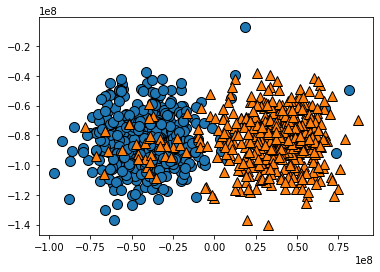

In [16]:
index = 3
train_index, test_index = index_splits_0_single_p[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

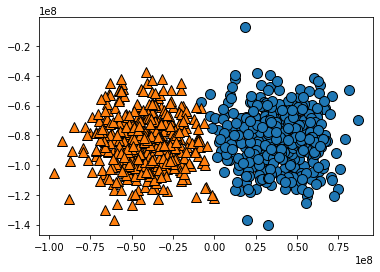

In [17]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_p[index][:])

In [13]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.891024317326464, 0.887078740996063, 0.8909979342996434, 0.8831836337828577, 0.8851193175035862, 0.8910110709701987, 0.8851273785354562, 0.7445187109365411, 0.8989104124073543, 0.8970274381588491]
Folkes test array: [0.8674948518505927, 0.8856957797264322, 0.9043502878323555, 0.9604040404040403, 0.9409701957230581, 0.885368487120178, 0.9031602097018196, 0.8328912640219475, 0.8013868635416299, 0.8520404773533974]
Assignment fidelity train array: [0.9711111111111111, 0.97, 0.9711111111111111, 0.9688888888888889, 0.9694444444444444, 0.9711111111111111, 0.9694444444444444, 0.925, 0.9733333333333334, 0.9727777777777777]
Assignment fidelity test array: [0.965, 0.97, 0.975, 0.99, 0.985, 0.97, 0.975, 0.955, 0.945, 0.96]


In [14]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.875 (±0.0439) with 10 splits
Train score 0.883 (±0.0454) with 10 splits


In [15]:
report_cv_score(assignment_train, assignment_test)

Test score 0.966 (±0.0138) with 10 splits
Train score 0.969 (±0.0128) with 10 splits


In [18]:
index_splits_0_1_0_single_p_2 = index_splits_0_single_p
qkmeans_0_1_0_single_p_2 = qkmeans_0_single_p
y_pred_0_1_0_single_train_p_2 = y_pred_0_single_train_p
y_pred_0_1_0_single_test_p_2 = y_pred_0_single_test_p
%store index_splits_0_1_0_single_p_2
%store qkmeans_0_1_0_single_p_2
%store y_pred_0_1_0_single_train_p_2
%store y_pred_0_1_0_single_test_p_2

Stored 'index_splits_0_1_0_single_p_2' (list)
Stored 'qkmeans_0_1_0_single_p_2' (list)
Stored 'y_pred_0_1_0_single_train_p_2' (list)
Stored 'y_pred_0_1_0_single_test_p_2' (list)


In [19]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_r = []
y_pred_0_single_train_r = []
y_pred_0_single_test_r = []

index_splits_0_single_r = []
for train_index, test_index in split_0_single:
    index_splits_0_single_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-16 03:35:12,219: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
for i in range(len(index_splits_0_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_r[i]
    qkmeans_0_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_r[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0    0.517391 -0.610904
1   -1.251982  0.392457
2   -1.257093 -1.567140
3   -0.975388 -1.897998
4   -0.434169  0.073676
..        ...       ...
895  1.099397  0.437879
896 -0.118335 -0.285704
897  0.368949  0.183006
898 -1.215430 -1.160051
899 -0.590511 -0.233065

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.398698  0.190340
1 -1.099363 -1.092177
New centroids are           0         1
0  0.764119  0.415154
1 -0.757357 -0.411480
Centers are [0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 

Old centroids are           0         1
0  0.961630  0.095415
1 -0.871986 -0.086520
New centroids are           0         1
0  0.961423  0.077973
1 -0.875691 -0.071020
Centers are [0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1

Old centroids are           0         1
0  0.966596  0.027802
1 -0.872593 -0.025099
New centroids are           0         1
0  0.978661  0.058578
1 -0.864006 -0.051715
Centers are [1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0

Old centroids are           0         1
0  1.168268  1.046684
1 -0.729721  1.363382
New centroids are           0         1
0  0.956722  0.014693
1 -0.867536 -0.013324
Centers are [0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1

Old centroids are           0         1
0  0.969899  0.087259
1 -0.867804 -0.078074
New centroids are           0         1
0  0.964250  0.094690
1 -0.870475 -0.085481
Centers are [0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.491057  0.383822
1  1.444855 -0.067236
New centroids are           0         1
0 -0.030203  0.760029
1  0.031297 -0.787542
Centers are [1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0

Old centroids are           0         1
0  0.180397  0.766515
1 -0.190282 -0.808516
New centroids are           0         1
0  0.238311  0.769651
1 -0.242586 -0.783457
Centers are [0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0

Old centroids are           0         1
0  0.502699  0.662417
1 -0.509447 -0.671308
New centroids are           0         1
0  0.560957  0.626308
1 -0.563456 -0.629098
Centers are [0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0

Old centroids are           0         1
0  0.849098  0.308307
1 -0.823086 -0.298862
New centroids are           0         1
0  0.931155  0.181540
1 -0.863362 -0.168323
Centers are [0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0

Old centroids are           0         1
0  0.955354  0.084005
1 -0.885799 -0.077889
New centroids are           0         1
0  0.952124  0.094426
1 -0.886742 -0.087942
Centers are [0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0   -0.770987 -1.982069
1    0.731596 -0.207082
2    0.587925 -0.780868
3    0.899523  1.169197
4    0.769522  1.193379
..        ...       ...
895 -0.820970  0.064264
896 -0.749753 -0.869316
897  0.288019 -0.772339
898  0.219703 -0.185322
899  0.967998  0.734612

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -1.212083 -0.506612
1  0.752528 -1.488459
New centroids are           0         1
0 -0.839718  0.066051
1  0.938508 -0.073822
Centers are [0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 0 

Old centroids are           0         1
0 -0.864376 -0.077656
1  0.974722  0.087569
New centroids are           0         1
0 -0.862079 -0.081992
1  0.976479  0.092873
Centers are [0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0

Old centroids are           0         1
0 -0.394070 -0.737646
1  0.383699  0.718234
New centroids are           0         1
0 -0.469079 -0.709924
1  0.448684  0.679058
Centers are [0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1

Old centroids are           0         1
0 -0.676893 -0.509416
1  0.692104  0.520864
New centroids are           0         1
0 -0.732601 -0.438179
1  0.752401  0.450021
Centers are [0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1

Old centroids are           0         1
0 -0.876118 -0.081326
1  0.966186  0.089687
New centroids are           0         1
0 -0.878745 -0.072580
1  0.964776  0.079686
Centers are [1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.092620  0.876589
1 -1.003022  1.357625
New centroids are           0         1
0  0.944718  0.027060
1 -0.887710 -0.025428
Centers are [0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0   -0.370291  0.713068
1   -1.168054 -0.098911
2   -1.422391  0.790480
3   -1.177673  0.920904
4    1.127379 -0.851716
..        ...       ...
895  1.269794 -1.347565
896 -1.226602 -0.878288
897  1.940663  1.874878
898  0.808711  0.231515
899 -0.531576  0.398652

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.965450  0.301979
1  1.471397 -0.059773
New centroids are           0         1
0 -0.872513 -0.004018
1  0.957934  0.004411
Centers are [0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0    0.559176  0.765586
1   -0.963491 -0.762555
2    1.351281  1.377215
3   -1.203407  1.815673
4    1.080062 -0.066282
..        ...       ...
895 -0.456373  0.211391
896 -0.832747 -0.611957
897 -1.399590  0.765585
898  1.597870 -0.019607
899 -0.465028  0.051582

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.945313 -1.253051
1  0.525404 -2.988422
New centroids are           0         1
0 -0.871795 -0.002377
1  0.948659  0.002587
Centers are [1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 

Split 9
Data is:             0         1
0   -1.294794  1.205106
1    0.665815 -0.058141
2    0.035850 -2.118398
3    0.641453  0.844596
4    1.213028 -0.496020
..        ...       ...
895  0.154347  0.027022
896  0.560763  0.698799
897  1.042452  0.240475
898  0.336901 -0.113153
899 -1.167691  0.675247

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.013875  1.721271
1  1.394025 -1.486542
New centroids are           0         1
0 -0.240368  0.735158
1  0.246865 -0.755027
Centers are [0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 0 1 0 

Old centroids are           0         1
0 -0.105100  0.788183
1  0.104634 -0.784688
New centroids are           0         1
0 -0.065813  0.795873
1  0.065230 -0.788830
Centers are [0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0

Old centroids are           0         1
0  0.075206  0.796048
1 -0.075541 -0.799594
New centroids are           0         1
0  0.130827  0.794297
1 -0.130827 -0.794297
Centers are [0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0

Old centroids are           0         1
0  0.357162  0.725276
1 -0.370091 -0.751531
New centroids are           0         1
0  0.399480  0.713859
1 -0.406646 -0.726664
Centers are [0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0

Old centroids are           0         1
0  0.568341  0.629089
1 -0.553385 -0.612534
New centroids are           0         1
0  0.605603  0.587319
1 -0.600244 -0.582121
Centers are [0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0

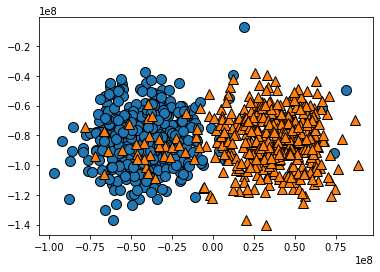

In [24]:
index = 2
train_index, test_index = index_splits_0_single_r[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

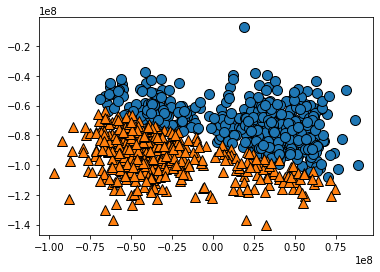

In [25]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_r[index][:])

In [26]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.5016466567283799, 0.8950211517772724, 0.6111706379624132, 0.896906425350487, 0.8871399151625899, 0.8949496285169856, 0.4995947987281765, 0.5000281173157498, 0.49991122777103675, 0.4994995005271959]
Folkes test array: [0.4905199694227039, 0.9045395369416043, 0.6418700329865438, 0.8189863234111022, 0.9225794404161825, 0.8502892879181098, 0.5330388788742602, 0.5011197384458373, 0.4949727669434753, 0.5003026039257957]
Assignment fidelity train array: [0.7683333333333333, 0.9722222222222222, 0.8683333333333334, 0.9727777777777777, 0.97, 0.9722222222222222, 0.7466666666666666, 0.7522222222222222, 0.7555555555555555, 0.7472222222222222]
Assignment fidelity test array: [0.755, 0.975, 0.885, 0.95, 0.98, 0.96, 0.8200000000000001, 0.785, 0.75, 0.735]


In [27]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.669 (±0.1864) with 10 splits
Train score 0.666 (±0.1769) with 10 splits


In [28]:
report_cv_score(assignment_train, assignment_test)

Test score 0.853 (±0.1030) with 10 splits
Train score 0.859 (±0.0961) with 10 splits


In [29]:
index_splits_0_1_0_single_r_2 = index_splits_0_single_r
qkmeans_0_1_0_single_r_2 = qkmeans_0_single_r
y_pred_0_1_0_single_train_r_2 = y_pred_0_single_train_r
y_pred_0_1_0_single_test_r_2 = y_pred_0_single_test_r
%store index_splits_0_1_0_single_r_2
%store qkmeans_0_1_0_single_r_2
%store y_pred_0_1_0_single_train_r_2
%store y_pred_0_1_0_single_test_r_2

Stored 'index_splits_0_1_0_single_r_2' (list)
Stored 'qkmeans_0_1_0_single_r_2' (list)
Stored 'y_pred_0_1_0_single_train_r_2' (list)
Stored 'y_pred_0_1_0_single_test_r_2' (list)


In [30]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_p = []
y_pred_1_single_train_p = []
y_pred_1_single_test_p = []

index_splits_1_single_p = []
for train_index, test_index in split_1_single:
    index_splits_1_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-16 11:27:31,360: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
for i in range(len(index_splits_1_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_single_p[i]
    qkmeans_1_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_p[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_p.append(qkmeans_1_single_p[-1].labels_)
    y_pred_1_single_test_p.append(qkmeans_1_single_p[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0   -0.582743 -1.734215
1    1.158405  0.838251
2    0.561288 -0.306026
3   -0.360608 -0.124437
4   -1.327164  2.008422
..        ...       ...
895 -1.047308  0.003856
896 -0.171569  0.269255
897  0.553690  2.543033
898 -1.608742 -0.506312
899 -0.569085  0.913547

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.27072874e+000 -1.06073810e+000]
 [ 9.88131292e-323  1.18575755e-322]]
Cluster center 1
Centers are: [[-1.27072874 -1.0607381 ]
 [ 0.86661557  0.41419145]]
Iteration 0
Old centroids are [[-1.27072874 -1.0607381 ]
 [ 0.86661557  0.41419145]]
New centroids are           0         1
0 -0.773467 -0.485288
1  0.805037  0.505095
Centers are [0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0

Old centroids are           0         1
0 -0.818371 -0.404474
1  0.840489  0.415405
New centroids are           0         1
0 -0.797732 -0.447890
1  0.822943  0.462044
Centers are [0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1

Old centroids are           0         1
0 -0.768582 -0.463902
1  0.825252  0.498107
New centroids are           0         1
0 -0.777218 -0.472061
1  0.812546  0.493518
Centers are [0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.8728409  -0.63525049]
 [-0.10904643 -0.01498282]]
Iteration 0
Old centroids are [[ 0.8728409  -0.63525049]
 [-0.10904643 -0.01498282]]
New centroids are           0         1
0  0.853122  0.043505
1 -0.812409 -0.041429
Centers are [1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 

Old centroids are           0         1
0  0.827747  0.474809
1 -0.788245 -0.452150
New centroids are           0         1
0  0.819923  0.489298
1 -0.780794 -0.465948
Centers are [1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0

Old centroids are           0         1
0 -0.753380 -0.520139
1  0.780651  0.538967
New centroids are           0         1
0 -0.751370 -0.505362
1  0.796074  0.535429
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.761449 -0.497124
1  0.799608  0.522036
New centroids are           0         1
0 -0.764222 -0.486224
1  0.809690  0.515152
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.771551 -0.496282
1  0.795934  0.511966
New centroids are           0         1
0 -0.769646 -0.488854
1  0.804630  0.511074
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.766830 -0.499733
1  0.794588  0.517823
New centroids are           0         1
0 -0.767628 -0.491678
1  0.802520  0.514027
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.770296 -0.491505
1  0.801737  0.511567
New centroids are           0         1
0 -0.769993 -0.487732
1  0.804993  0.509901
Centers are [0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.783610 -0.473978
1  0.811975  0.491135
New centroids are           0         1
0 -0.772236 -0.473332
1  0.818181  0.501494
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.770693 -0.479910
1  0.812923  0.506206
New centroids are           0         1
0 -0.772343 -0.488134
1  0.803867  0.508058
Centers are [0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Old centroids are           0         1
0 -0.778284 -0.488438
1  0.799318  0.501639
New centroids are           0         1
0 -0.771776 -0.492610
1  0.799714  0.510442
Centers are [0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1

Cluster center 1
Centers are: [[ 0.68516931  1.63385791]
 [-0.21170439 -0.07755914]]
Iteration 0
Old centroids are [[ 0.68516931  1.63385791]
 [-0.21170439 -0.07755914]]
New centroids are           0         1
0  0.752523  0.603065
1 -0.707112 -0.566673
Centers are [1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 

Old centroids are           0         1
0  0.783330  0.548446
1 -0.752611 -0.526938
New centroids are           0         1
0  0.782530  0.537908
1 -0.761938 -0.523753
Centers are [1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0

Cluster center 1
Centers are: [[ 1.99169128 -1.05032099]
 [-1.76283807 -0.50834005]]
Iteration 0
Old centroids are [[ 1.99169128 -1.05032099]
 [-1.76283807 -0.50834005]]
New centroids are           0         1
0  0.871712  0.208333
1 -0.841259 -0.201055
Centers are [1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 

Old centroids are           0         1
0  0.813694  0.496343
1 -0.788767 -0.481138
New centroids are           0         1
0  0.817082  0.511479
1 -0.774636 -0.484909
Centers are [1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1

Old centroids are           0         1
0 -0.800011 -0.459323
1  0.814361  0.467562
New centroids are           0         1
0 -0.791215 -0.467501
1  0.812599  0.480136
Centers are [1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1

Split 7
Data is:             0         1
0   -0.317161 -0.669728
1   -0.648800 -1.497159
2    1.383021  4.253949
3   -1.220775 -0.528067
4   -0.951809 -0.349404
..        ...       ...
895 -1.112809 -0.572593
896  0.140802  0.738643
897 -1.478880  0.277047
898 -0.130800 -0.366992
899 -0.351130 -0.862431

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.96458341 0.44005039]
 [0.80545949 0.49445588]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.96458341  0.44005039]
 [-1.4788802   0.27704652]]
Iteration 0
Old centroids are [[ 0.96458341  0.44005039]
 [-1.4788802   0.27704652]]
New centroids are           0         1
0  0.868117  0.337118
1 -0.852820 -0.331177
Centers are [1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 

Old centroids are           0         1
0 -0.851997 -0.164295
1  0.855792  0.165027
New centroids are           0         1
0 -0.841501 -0.341515
1  0.860412  0.349189
Centers are [0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1

Old centroids are           0         1
0 -0.788346 -0.478712
1  0.806062  0.489470
New centroids are           0         1
0 -0.778637 -0.479115
1  0.810418  0.498671
Centers are [0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1

Old centroids are           0         1
0 -0.879581 -0.272094
1  0.841339  0.260264
New centroids are           0         1
0 -0.859795 -0.399309
1  0.826078  0.383650
Centers are [0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0

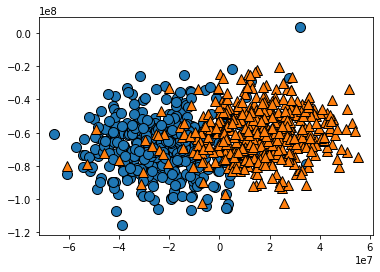

In [32]:
index = 1
train_index, test_index = index_splits_1_single_p[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

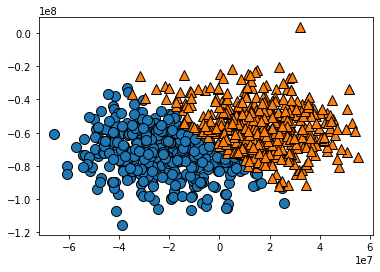

In [33]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_p[index][:])

In [34]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7429582191847094, 0.7539368015929414, 0.7571377644137817, 0.7523490962350136, 0.7429264241612653, 0.7555632892467118, 0.7507404420622499, 0.7951570524921125, 0.7571209186535917, 0.8091423488881718]
Folkes test array: [0.7400613005005882, 0.8175182481751825, 0.7267181781211873, 0.6497470715861674, 0.7258261933904528, 0.7038241878956392, 0.7547871525837753, 0.6923972304166175, 0.7584277757757345, 0.7463517925331652]
Assignment fidelity train array: [0.9244444444444444, 0.9283333333333333, 0.9294444444444444, 0.9277777777777778, 0.9244444444444444, 0.9288888888888889, 0.9272222222222222, 0.9422222222222222, 0.9294444444444444, 0.9466666666666667]
Assignment fidelity test array: [0.925, 0.95, 0.92, 0.885, 0.92, 0.91, 0.9299999999999999, 0.905, 0.9299999999999999, 0.925]


In [35]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.762 (±0.0210) with 10 splits
Train score 0.732 (±0.0424) with 10 splits


In [36]:
report_cv_score(assignment_train, assignment_test)

Test score 0.931 (±0.0071) with 10 splits
Train score 0.920 (±0.0164) with 10 splits


In [37]:
index_splits_0_1_1_single_p_2 = index_splits_1_single_p
qkmeans_0_1_1_single_p_2 = qkmeans_1_single_p
y_pred_0_1_1_single_train_p_2 = y_pred_1_single_train_p
y_pred_0_1_1_single_test_p_2 = y_pred_1_single_test_p
%store index_splits_0_1_1_single_p_2
%store qkmeans_0_1_1_single_p_2
%store y_pred_0_1_1_single_train_p_2
%store y_pred_0_1_1_single_test_p_2

Stored 'index_splits_0_1_1_single_p_2' (list)
Stored 'qkmeans_0_1_1_single_p_2' (list)
Stored 'y_pred_0_1_1_single_train_p_2' (list)
Stored 'y_pred_0_1_1_single_test_p_2' (list)


In [38]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_1_1_single = cv.split(X_1_single_train)
qkmeans_1_single_r = []
y_pred_1_single_train_r = []
y_pred_1_single_test_r = []

index_splits_0_1_1_single = []
for train_index, test_index in split_0_1_1_single:
    index_splits_0_1_1_single.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-16 13:27:50,031: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
for i in range(len(index_splits_0_1_1_single)):
    print('Split',i)
    train_index, test_index = index_splits_0_1_1_single[i]
    qkmeans_1_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_r[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_r.append(qkmeans_1_single_r[-1].labels_)
    y_pred_1_single_test_r.append(qkmeans_1_single_r[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0    0.509166  1.005513
1   -1.094948 -0.447317
2   -2.026305 -1.022719
3   -0.225819 -0.063052
4   -1.000613 -0.677876
..        ...       ...
895 -0.485995  0.014965
896  0.775410  0.805246
897 -0.046511  0.442005
898 -0.510983 -0.780253
899  0.098123 -0.531501

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.688395 -0.795496
1 -0.856388  0.419416
New centroids are           0         1
0 -0.070232 -0.778940
1  0.068995  0.765214
Centers are [1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 1 1 0 1 

Old centroids are           0         1
0 -0.611422 -0.650216
1  0.653589  0.695059
New centroids are           0         1
0 -0.686602 -0.596393
1  0.727452  0.631877
Centers are [1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0

Old centroids are           0         1
0 -0.765262 -0.515564
1  0.796497  0.536607
New centroids are           0         1
0 -0.775472 -0.507637
1  0.799979  0.523680
Centers are [1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0

Old centroids are           0         1
0  0.077815 -1.176186
1  1.187338  0.435111
New centroids are           0         1
0 -0.605721 -0.650539
1  0.638911  0.686185
Centers are [1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.411425 -0.323809
1  0.426793  1.241017
New centroids are           0         1
0 -0.626216 -0.645354
1  0.669403  0.689862
Centers are [1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1

Old centroids are           0         1
0 -0.743021 -0.553211
1  0.769918  0.573236
New centroids are           0         1
0 -0.750268 -0.550460
1  0.770545  0.565338
Centers are [1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1
 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1

Old centroids are           0         1
0  0.859246  0.334555
1 -0.851643 -0.331595
New centroids are           0         1
0  0.832757  0.436521
1 -0.829064 -0.434585
Centers are [1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0

Old centroids are           0         1
0 -0.817131 -0.402402
1  0.842955  0.415119
New centroids are           0         1
0 -0.801755 -0.447325
1  0.819772  0.457378
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0 -0.786448 -0.488851
1  0.789951  0.491028
New centroids are           0         1
0 -0.781044 -0.475506
1  0.805727  0.490533
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0 -0.770783 -0.480466
1  0.805818  0.502306
New centroids are           0         1
0 -0.784799 -0.477253
1  0.802435  0.487978
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0 -0.773449 -0.480524
1  0.805018  0.500137
New centroids are           0         1
0 -0.777823 -0.476489
1  0.805980  0.493737
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0 -0.772514 -0.477875
1  0.807629  0.499597
New centroids are           0         1
0 -0.763705 -0.484204
1  0.805552  0.510735
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0 -0.778536 -0.479625
1  0.803140  0.494782
New centroids are           0         1
0 -0.775733 -0.476495
1  0.807395  0.495944
Centers are [1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0

Old centroids are           0         1
0  0.701017  0.636668
1 -0.664601 -0.603595
New centroids are           0         1
0  0.738061  0.590763
1 -0.709118 -0.567596
Centers are [0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0

Old centroids are           0         1
0  0.813799  0.475439
1 -0.799459 -0.467062
New centroids are           0         1
0  0.807183  0.479990
1 -0.800040 -0.475743
Centers are [0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1

Split 7
Data is:             0         1
0   -0.865721 -0.061614
1    0.829005  0.999577
2   -0.824536  0.048160
3   -0.338306 -0.829329
4   -0.585844  1.229661
..        ...       ...
895  0.639221  0.038332
896  0.179009  0.264322
897  0.445700  0.900621
898  1.133917  1.098047
899 -1.070423  0.185083

[900 rows x 2 columns]
Iteration 0
Old centroids are           0        1
0  0.383942 -1.06578
1 -0.878987  0.83621
New centroids are           0         1
0  0.329775 -0.615279
1 -0.328313  0.612551
Centers are [1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1

Old centroids are           0         1
0 -0.100653 -0.777709
1  0.100653  0.777709
New centroids are           0         1
0 -0.327496 -0.783550
1  0.326044  0.780075
Centers are [0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1

Old centroids are           0         1
0 -0.722401 -0.551467
1  0.768794  0.586883
New centroids are           0         1
0 -0.735696 -0.553146
1  0.762327  0.573169
Centers are [0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0

Split 8
Data is:             0         1
0   -0.562816  0.901533
1   -0.658024 -0.090585
2   -1.313208 -1.311593
3    0.625321  1.164366
4   -0.227215  0.013494
..        ...       ...
895  0.149470 -0.803918
896  1.216966  1.075313
897 -0.827702 -0.028419
898  0.187992  0.261701
899  0.999542  1.479155

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.786028  0.266101
1  0.279134  1.230118
New centroids are           0         1
0 -0.791765 -0.463812
1  0.824081  0.482743
Centers are [0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 1 

Old centroids are           0         1
0 -0.785303 -0.483533
1  0.810120  0.498814
New centroids are           0         1
0 -0.780243 -0.487335
1  0.808488  0.504976
Centers are [1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1

Old centroids are           0         1
0 -0.814501 -0.414524
1  0.840241  0.427624
New centroids are           0         1
0 -0.796860 -0.457825
1  0.818397  0.470198
Centers are [1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1

Old centroids are           0         1
0 -0.768968 -0.500410
1  0.793269  0.516224
New centroids are           0         1
0 -0.770556 -0.498801
1  0.794908  0.514564
Centers are [1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1

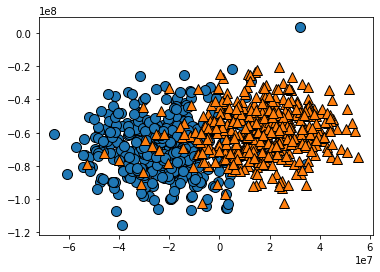

In [40]:
index = 2
train_index, test_index = index_splits_0_1_1_single[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

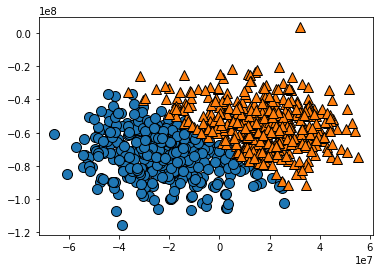

In [41]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_r[index][:])

In [43]:
fowlkes_train = []
fowlkes_test = []
for index in range(10):
    train_index, test_index = index_splits_0_1_1_single[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7492121109880879, 0.7100917481215246, 0.7336744600127392, 0.7783078072799838, 0.7491823137384774, 0.7057342570058022, 0.750745371553369, 0.7231737418312755, 0.7460249959829016, 0.7429124289771293]
Folkes test array: [0.6737359500571035, 0.7142168541906255, 0.7123344859363787, 0.6398240063214163, 0.7699852790632175, 0.8185018297352139, 0.7258261933904528, 0.7137415154277098, 0.7277341042315212, 0.7259382512721818]
Assignment fidelity train array: [0.9244444444444444, 0.9283333333333333, 0.9294444444444444, 0.9277777777777778, 0.9244444444444444, 0.9288888888888889, 0.9272222222222222, 0.9422222222222222, 0.9294444444444444, 0.9466666666666667, 0.9266666666666666, 0.9266666666666666, 0.9122222222222223, 0.9211111111111111, 0.9366666666666666, 0.9266666666666666, 0.9105555555555556, 0.9272222222222222, 0.9172222222222222, 0.9255555555555556, 0.9244444444444444]
Assignment fidelity test array: [0.925, 0.95, 0.92, 0.885, 0.92, 0.91, 0.9299999999999999, 0.905, 0.929999

In [44]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.739 (±0.0204) with 10 splits
Train score 0.722 (±0.0458) with 10 splits


In [45]:
report_cv_score(assignment_train, assignment_test)

Test score 0.927 (±0.0081) with 21 splits
Train score 0.919 (±0.0166) with 20 splits


In [46]:
index_splits_0_1_1_single_r_2 = index_splits_0_1_1_single
qkmeans_0_1_1_single_r_2 = qkmeans_1_single_r
y_pred_0_1_1_single_train_r_2 = y_pred_1_single_train_r
y_pred_0_1_1_single_test_r_2 = y_pred_1_single_test_r
%store index_splits_0_1_1_single_r_2
%store qkmeans_0_1_1_single_r_2
%store y_pred_0_1_1_single_train_r_2
%store y_pred_0_1_1_single_test_r_2

Stored 'index_splits_0_1_1_single_r_2' (list)
Stored 'qkmeans_0_1_1_single_r_2' (list)
Stored 'y_pred_0_1_1_single_train_r_2' (list)
Stored 'y_pred_0_1_1_single_test_r_2' (list)


In [47]:
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split, cross_validate
from sklearn.metrics import fowlkes_mallows_score, davies_bouldin_score

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_p = []
y_pred_0_both_train_p = []
y_pred_0_both_test_p = []

index_splits_0_1_0_both_p = []
for train_index, test_index in split_0_both:
    index_splits_0_1_0_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-16 16:26:41,795: Credentials are already in use. The existing account in the session will be replaced.


In [48]:
for i in range(len(index_splits_0_1_0_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_1_0_both_p[i]
    qkmeans_0_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_p[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_p.append(qkmeans_0_both_p[-1].labels_)
    y_pred_0_both_test_p.append(qkmeans_0_both_p[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0    -0.723307  0.325448
1     0.971477  0.568538
2    -0.919869 -1.024756
3    -1.516556 -0.017298
4     1.053205  0.042433
...        ...       ...
1795 -0.393648 -1.236395
1796 -0.855013 -0.786443
1797  0.849823  1.436242
1798  1.578239 -1.973749
1799  1.480600 -0.433930

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-5.26964912e-001  4.11810736e-001]
 [ 4.44659081e-323  2.12448228e-322]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.52696491  0.41181074]
 [ 1.25880087  0.15110426]]
Iteration 0
Old centroids are [[-0.52696491  0.41181074]
 [ 1.25880087  0.15110426]]
New centroids are           0         1
0 -0.873026 -0.017774
1  0.933235  0.018999
Centers are [0 1 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.873026 -0.017774
1  0.933235  0.018999
New centroids are           0         1
0 -0.886035 -0.111612
1  0.953484  0.120108
Centers are [0 1 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.886035 -0.111612
1  0.953484  0.120108
New centroids are           0         1
0 -0.885084 -0.127908
1  0.952461  0.137645
Centers are [0 1 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.885084 -0.127908
1  0.952461  0.137645
New centroids are           0         1
0 -0.882413 -0.138840
1  0.951702  0.149742
Centers are [0 1 0 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0 -0.882413 -0.138840
1  0.951702 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.81141258 -0.10872888]
 [ 0.97111203  0.57507274]]
Iteration 0
Old centroids are [[-1.81141258 -0.10872888]
 [ 0.97111203  0.57507274]]
New centroids are           0         1
0 -0.884973 -0.197242
1  0.923145  0.205750
Centers are [0 0 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0 -0.884973 -0.197242
1  0.923145  0.205750
New centroids are           0         1
0 -0.887623 -0.174872
1  0.934180  0.184044
Centers are [0 0 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0 -0.887623 -0.174872
1  0.934180  0.184044
New centroids are           0         1
0 -0.888766 -0.165841
1  0.937466  0.174928
Centers are [0 0 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0 -0.888766 -0.165841
1  0.937466  0.174928
New centroids are           0         1
0 -0.890452 -0.155853
1  0.939243  0.164393
Centers are [0 0 0 ... 0 1 0]
Split 3
Data is:              0         1
0    -1.460708 -1.313795
1     0.915284 -0.1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.94444866  0.80052367]
 [-1.02511574 -1.5556352 ]]
Iteration 0
Old centroids are [[ 0.94444866  0.80052367]
 [-1.02511574 -1.5556352 ]]
New centroids are           0         1
0  0.651159  0.592119
1 -0.627016 -0.570165
Centers are [1 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.651159  0.592119
1 -0.627016 -0.570165
New centroids are           0         1
0  0.741474  0.520828
1 -0.695181 -0.488312
Centers are [1 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.741474  0.520828
1 -0.695181 -0.488312
New centroids are           0         1
0  0.810992  0.411444
1 -0.784402 -0.397954
Centers are [1 1 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.810992  0.411444
1 -0.784402 -0.397954
New centroids are           0         1
0  0.879518  0.307793
1 -0.843150 -0.295066
Centers are [1 1 0 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.879518  0.307793
1 -0.843150 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:              0         1
0    -1.472851  1.389364
1    -0.360904  0.711346
2    -0.745304  0.481517
3    -0.903550  0.840192
4    -0.891947  0.468946
...        ...       ...
1795 -1.253121 -0.332796
1796  0.819987 -0.035105
1797 -0.995659 -0.271704
1798  1.262627  0.946622
1799  0.733083 -0.527953

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.19733489  0.48832909]
 [-0.89268831 -0.1481538 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.19733489  0.48832909]
 [ 0.34986034  1.22479195]]
Iteration 0
Old centroids are [[-1.19733489  0.48832909]
 [ 0.34986034  1.22479195]]
New centroids are           0         1
0 -0.841111 -0.264691
1  0.897121  0.282317
Centers are [0 0 0 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.841111 -0.264691
1  0.897121  0.282317
New centroids are           0         1
0 -0.876010 -0.191632
1  0.926068  0.202583
Centers are [0 0 0 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.876010 -0.191632
1  0.926068  0.202583
New centroids are           0         1
0 -0.881551 -0.155438
1  0.942348  0.166158
Centers are [0 0 0 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0 -0.881551 -0.155438
1  0.942348  0.166158
New centroids are           0         1
0 -0.880756 -0.144658
1  0.947803  0.155670
Centers are [0 0 0 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0 -0.880756 -0.144658
1  0.947803 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.06915398  1.11451278]
 [ 0.20971809 -0.60104619]]
Iteration 0
Old centroids are [[ 1.06915398  1.11451278]
 [ 0.20971809 -0.60104619]]
New centroids are           0         1
0  0.261667  0.783776
1 -0.257628 -0.771678
Centers are [1 0 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.261667  0.783776
1 -0.257628 -0.771678
New centroids are           0         1
0  0.340291  0.759063
1 -0.338030 -0.754019
Centers are [1 0 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.340291  0.759063
1 -0.338030 -0.754019
New centroids are           0         1
0  0.405623  0.739891
1 -0.397591 -0.725240
Centers are [1 0 1 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.405623  0.739891
1 -0.397591 -0.725240
New centroids are           0         1
0  0.477145  0.696822
1 -0.475029 -0.693732
Centers are [0 0 1 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.477145  0.696822
1 -0.475029 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.19794034  0.10451098]
 [ 0.8986354   0.80027132]]
Iteration 0
Old centroids are [[-1.19794034  0.10451098]
 [ 0.8986354   0.80027132]]
New centroids are           0         1
0 -0.874217 -0.206698
1  0.928292  0.219483
Centers are [0 0 0 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.874217 -0.206698
1  0.928292  0.219483
New centroids are           0         1
0 -0.884777 -0.174685
1  0.937418  0.185078
Centers are [0 0 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.884777 -0.174685
1  0.937418  0.185078
New centroids are           0         1
0 -0.883311 -0.163126
1  0.944229  0.174376
Centers are [0 0 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.883311 -0.163126
1  0.944229  0.174376
New centroids are           0         1
0 -0.884275 -0.158105
1  0.945260  0.169008
Centers are [0 0 0 ... 1 1 1]
Split 9
Data is:              0         1
0     0.931415  1.434764
1     1.363862  2.4

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.81027597  0.2760644 ]
 [ 0.85514282 -0.3512194 ]]
Iteration 0
Old centroids are [[-0.81027597  0.2760644 ]
 [ 0.85514282 -0.3512194 ]]
New centroids are           0         1
0 -0.840955  0.038675
1  0.925344 -0.042556
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.840955  0.038675
1  0.925344 -0.042556
New centroids are           0         1
0 -0.881028 -0.106012
1  0.956574  0.115102
Centers are [1 1 1 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.881028 -0.106012
1  0.956574  0.115102
New centroids are           0         1
0 -0.879029 -0.134777
1  0.956530  0.146660
Centers are [1 1 1 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.879029 -0.134777
1  0.956530  0.146660
New centroids are           0         1
0 -0.878820 -0.143686
1  0.954177  0.156007
Centers are [1 1 1 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.878820 -0.143686
1  0.954177 

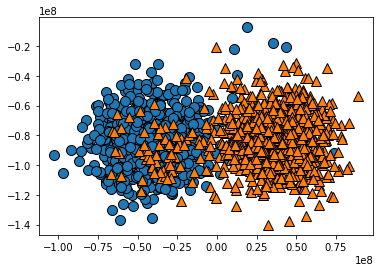

In [49]:
index = 8
train_index, test_index = index_splits_0_1_0_both_p[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

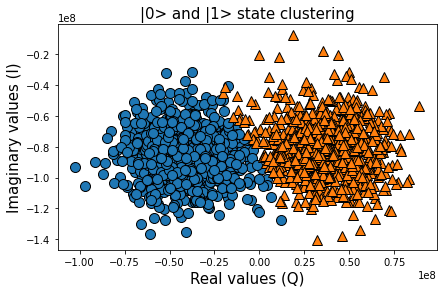

In [50]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_p[index][:])
plt.tight_layout()
plt.xlabel("Real values (Q)", fontsize=15)
plt.ylabel("Imaginary values (I)", fontsize=15)
plt.title("|0> and |1> state clustering", fontsize=15)
plt.savefig('clustering_0_qubit_both.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig('clustering_0_qubit_both.svg', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.savefig('clustering_0_qubit_both.png',dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [51]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_1_0_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.8891443728148251, 0.8950230169343902, 0.8901210756612205, 0.8891273636166052, 0.889147152767928, 0.8950325247523637, 0.8871622548755732, 0.8862010730887718, 0.8881467389637623, 0.8871719118627468]
Folkes test array: [0.8950903305938559, 0.8863501984706997, 0.8862562125397115, 0.9133093023386102, 0.9043880837359098, 0.8866662617771293, 0.904284759722011, 0.9414514363688048, 0.904284759722011, 0.8701679810263836]
Assignment fidelity train array: [0.9705555555555555, 0.9722222222222222, 0.9708333333333333, 0.9705555555555555, 0.9705555555555555, 0.9722222222222222, 0.97, 0.9697222222222223, 0.9702777777777778, 0.97]
Assignment fidelity test array: [0.9725, 0.97, 0.97, 0.9775, 0.975, 0.97, 0.975, 0.985, 0.975, 0.965]


In [52]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.890 (±0.0029) with 10 splits
Train score 0.899 (±0.0185) with 10 splits


In [53]:
report_cv_score(assignment_train, assignment_test)

Test score 0.971 (±0.0008) with 10 splits
Train score 0.973 (±0.0051) with 10 splits


In [54]:
qkmeans_0_1_0_both_p_2 = qkmeans_0_both_p
y_pred_0_1_0_both_train_p_2 = y_pred_0_both_train_p
y_pred_0_1_0_both_test_p_2 = y_pred_0_both_test_p
index_splits_0_1_0_both_p_2 = index_splits_0_1_0_both_p
%store index_splits_0_1_0_both_p_2
%store qkmeans_0_1_0_both_p_2
%store y_pred_0_1_0_both_train_p_2
%store y_pred_0_1_0_both_test_p_2

Stored 'index_splits_0_1_0_both_p_2' (list)
Stored 'qkmeans_0_1_0_both_p_2' (list)
Stored 'y_pred_0_1_0_both_train_p_2' (list)
Stored 'y_pred_0_1_0_both_test_p_2' (list)


In [55]:
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split, cross_validate
from sklearn.metrics import fowlkes_mallows_score, davies_bouldin_score

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_r = []
y_pred_0_both_train_r = []
y_pred_0_both_test_r = []

index_splits_0_1_0_both_r = []
for train_index, test_index in split_0_both:
    index_splits_0_1_0_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-16 20:52:37,116: Credentials are already in use. The existing account in the session will be replaced.


In [56]:
for i in range(len(index_splits_0_1_0_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_1_0_both_r[i]
    qkmeans_0_both_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_r[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_r.append(qkmeans_0_both_r[-1].labels_)
    y_pred_0_both_test_r.append(qkmeans_0_both_r[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0     1.033361  0.617594
1    -1.113890  1.872621
2    -0.633929 -1.499534
3    -0.919161 -1.110752
4    -1.236175  1.945462
...        ...       ...
1795 -1.316375  0.187538
1796  0.816301 -3.317631
1797 -1.308315  0.077888
1798  0.995864  0.568181
1799  0.648114  0.132689

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.968147  1.979760
1  0.200172 -0.193034
New centroids are           0         1
0 -0.442887  0.621868
1  0.434117 -0.609554
Centers are [1 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.442887  0.621868
1  0.434117 -0.609554
New centroids are           0         1
0 -0.429174  0.631067
1  0.421612 -0.619947
Centers are [1 0 1 ... 0 1 1]
Split 1
Data is:              0         1
0     0.085716  0.820310
1    -1.282477  0.057018
2     0.595005  1.461961
3     0.979092  0.287023
4     0.679172  1.172499
...        ...       ...
1795  0.709492  0.747833
1796  1.194658  0.959049
1797 -0.353679 -0.771999
1798  0.782112 -1.800682
1799 -0.228879  0.492747

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.164850 -1.401614
1  0.929672 -0.201102
New centroids are           0         1
0 -0.514848 -0.664241
1  0.522920  0.674654
Centers are [1 0 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.514848 -0.664241
1  0.522920  0.674654
New centroids are           0         1
0 -0.583872 -0.622297
1  0.591709  0.630650
Centers are [1 0 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.583872 -0.622297
1  0.591709  0.630650
New centroids are           0         1
0 -0.657676 -0.541831
1  0.687571  0.566460
Centers are [1 0 1 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.657676 -0.541831
1  0.687571  0.566460
New centroids are           0         1
0 -0.729492 -0.454142
1  0.776341  0.483307
Centers are [1 0 1 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.729492 -0.454142
1  0.776341  0.483307
New centroids are           0         1
0 -0.806584 -0.363978
1  0.841374  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.902874 -1.132279
1 -1.029755  0.207581
New centroids are           0         1
0  0.192971 -0.748232
1 -0.191263  0.741611
Centers are [1 1 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.192971 -0.748232
1 -0.191263  0.741611
New centroids are           0         1
0  0.118470 -0.770347
1 -0.117944  0.766931
Centers are [1 1 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.118470 -0.770347
1 -0.117944  0.766931
New centroids are           0         1
0  0.035783 -0.787488
1 -0.035703  0.785739
Centers are [1 1 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.035783 -0.787488
1 -0.035703  0.785739
New centroids are           0         1
0 -0.067675 -0.809862
1  0.065456  0.783309
Centers are [1 1 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.067675 -0.809862
1  0.065456  0.783309
New centroids are           0         1
0 -0.167565 -0.806606
1  0.162793  0

Split 3
Data is:              0         1
0     0.961711  0.107741
1     1.332201  0.862163
2    -0.512112 -1.030095
3     0.830788 -0.125140
4    -0.961574  1.987570
...        ...       ...
1795  1.061047  0.106810
1796 -0.235483 -1.073463
1797  0.043062 -0.495600
1798 -1.794302 -0.452245
1799 -0.629162 -0.510260

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -1.536801  1.071354
1  0.836797  0.330625
New centroids are           0         1
0 -0.889217 -0.094454
1  0.944220  0.100297
Centers are [1 1 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.889217 -0.094454
1  0.944220  0.100297
New centroids are           0         1
0 -0.890448 -0.136234
1  0.945527  0.144661
Centers are [1 1 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.890448 -0.136234
1  0.945527  0.144661
New centroids are           0         1
0 -0.890955 -0.153933
1  0.939775  0.162368
Centers are [1 1 0 ... 0 0 0]
Iteration 3
Old centroids ar

Old centroids are           0         1
0  0.238044 -0.715227
1 -0.243935  0.732927
New centroids are           0         1
0  0.172552 -0.747250
1 -0.173706  0.752249
Centers are [0 1 1 ... 1 0 1]
Iteration 3
Old centroids are           0         1
0  0.172552 -0.747250
1 -0.173706  0.752249
New centroids are           0         1
0  0.087056 -0.770197
1 -0.087833  0.777074
Centers are [0 1 1 ... 1 0 1]
Iteration 4
Old centroids are           0         1
0  0.087056 -0.770197
1 -0.087833  0.777074
New centroids are           0         1
0 -0.002929 -0.795713
1  0.002883  0.783431
Centers are [1 1 1 ... 1 0 1]
Iteration 5
Old centroids are           0         1
0 -0.002929 -0.795713
1  0.002883  0.783431
New centroids are           0         1
0 -0.107961 -0.819304
1  0.101899  0.773296
Centers are [1 1 1 ... 1 0 1]
Iteration 6
Old centroids are           0         1
0 -0.107961 -0.819304
1  0.101899  0.773296
New centroids are           0         1
0 -0.213615 -0.802194
1  0.206611  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:              0         1
0     0.522907  0.600635
1     0.662518 -0.895459
2     0.578661 -0.017070
3    -1.027795 -0.691298
4     1.198094  0.126793
...        ...       ...
1795 -0.687020 -1.908274
1796 -0.389971  1.948713
1797 -1.470474 -1.887510
1798  0.710157 -0.526439
1799  1.284565 -0.274082

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.621205 -0.003655
1 -1.307258 -1.096297
New centroids are           0         1
0 -0.201466  0.736324
1  0.201914 -0.737962
Centers are [0 1 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.201466  0.736324
1  0.201914 -0.737962
New centroids are           0         1
0 -0.136481  0.763182
1  0.136178 -0.761487
Centers are [0 1 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.136481  0.763182
1  0.136178 -0.761487
New centroids are           0         1
0 -0.042955  0.785209
1  0.042765 -0.781727
Centers are [0 1 1 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.042955  0.785209
1  0.042765 -0.781727
New centroids are           0         1
0  0.053102  0.775114
1 -0.055887 -0.815770
Centers are [0 1 1 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0  0.053102  0.775114
1 -0.055887 -0.815770
New centroids are           0         1
0  0.168463  0.784247
1 -0.173016 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.052484  1.587489
1 -1.419556  0.268591
New centroids are           0         1
0  0.537408  0.663745
1 -0.531470 -0.656411
Centers are [1 1 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.537408  0.663745
1 -0.531470 -0.656411
New centroids are           0         1
0  0.617507  0.609182
1 -0.607975 -0.599779
Centers are [1 1 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.617507  0.609182
1 -0.607975 -0.599779
New centroids are           0         1
0  0.707346  0.545526
1 -0.675089 -0.520648
Centers are [1 1 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.707346  0.545526
1 -0.675089 -0.520648
New centroids are           0         1
0  0.786083  0.453775
1 -0.751905 -0.434045
Centers are [1 1 0 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0  0.786083  0.453775
1 -0.751905 -0.434045
New centroids are           0         1
0  0.859836  0.345694
1 -0.822452 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:              0         1
0    -0.785294  1.900550
1    -0.752929  0.955617
2     0.759675 -0.050710
3    -0.845413  0.511946
4    -0.532217 -1.577305
...        ...       ...
1795  0.178071  0.587103
1796 -0.225571  0.847437
1797 -0.466878 -0.186439
1798 -1.070800 -1.411564
1799  1.205424 -0.885534

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.411975  1.090067
1  1.040535  1.014966
New centroids are           0         1
0 -0.875735 -0.050740
1  0.934050  0.054119
Centers are [0 0 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.875735 -0.050740
1  0.934050  0.054119
New centroids are           0         1
0 -0.883520 -0.131363
1  0.952896  0.141678
Centers are [0 0 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.883520 -0.131363
1  0.952896  0.141678
New centroids are           0         1
0 -0.875766 -0.156545
1  0.955104  0.170727
Centers are [0 0 1 ... 0 0 1]
Iteration 3
Old centroids ar

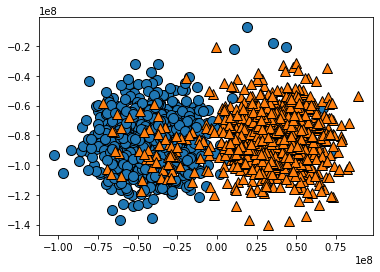

In [57]:
index = 1
train_index, test_index = index_splits_0_1_0_both_r[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

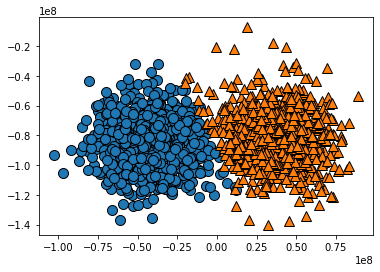

In [58]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_r[index][:])

In [59]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_1_0_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.5711367861827205, 0.8940232079158431, 0.8979822147799638, 0.8910992253249359, 0.8901120957096906, 0.5660445110372146, 0.8861886368251826, 0.8910874151145257, 0.878385221595566, 0.8901068323776699]
Folkes test array: [0.5408679094252231, 0.8602790705683129, 0.8352995904413217, 0.8774022773101678, 0.9412418738228752, 0.5731717724447281, 0.8951540649646786, 0.8864546160233008, 0.8605363303473764, 0.8533754324221728]
Assignment fidelity train array: [0.8444444444444444, 0.9719444444444445, 0.9730555555555556, 0.9711111111111111, 0.9708333333333333, 0.8411111111111111, 0.9697222222222223, 0.9711111111111111, 0.9675, 0.9708333333333333]
Assignment fidelity test array: [0.825, 0.9625, 0.955, 0.9675, 0.985, 0.8475, 0.9725, 0.97, 0.9625, 0.96]


In [60]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.826 (±0.1286) with 10 splits
Train score 0.812 (±0.1307) with 10 splits


In [61]:
report_cv_score(assignment_train, assignment_test)

Test score 0.945 (±0.0512) with 10 splits
Train score 0.941 (±0.0531) with 10 splits


In [62]:
qkmeans_0_1_0_both_r_2 = qkmeans_0_both_r
y_pred_0_1_0_both_train_r_2 = y_pred_0_both_train_r
y_pred_0_1_0_both_test_r_2 = y_pred_0_both_test_r
index_splits_0_1_0_both_r_2 = index_splits_0_1_0_both_r
%store index_splits_0_1_0_both_r_2
%store qkmeans_0_1_0_both_r_2
%store y_pred_0_1_0_both_train_r_2
%store y_pred_0_1_0_both_test_r_2

Stored 'index_splits_0_1_0_both_r_2' (list)
Stored 'qkmeans_0_1_0_both_r_2' (list)
Stored 'y_pred_0_1_0_both_train_r_2' (list)
Stored 'y_pred_0_1_0_both_test_r_2' (list)


In [63]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_p = []
y_pred_1_both_train_p = []
y_pred_1_both_test_p = []

index_splits_0_1_1_both_p = []
for train_index, test_index in split_1_both:
    index_splits_0_1_1_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-17 02:13:35,034: Credentials are already in use. The existing account in the session will be replaced.


In [64]:
for i in range(len(index_splits_0_1_1_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_1_1_both_p[i]
    qkmeans_1_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_p[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_p.append(qkmeans_1_both_p[-1].labels_)
    y_pred_1_both_test_p.append(qkmeans_1_both_p[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0    -0.734871 -0.909031
1    -0.303573  1.621443
2    -0.834862 -1.210366
3    -1.374406 -2.007908
4     0.399752  1.017780
...        ...       ...
1795  0.244200  0.192919
1796  0.094157 -1.123759
1797 -0.566937 -0.041434
1798 -1.147070  1.082976
1799 -0.535522 -0.476277

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-2.92387563e-001  8.46017546e-001]
 [ 5.92878775e-323  5.08887615e-322]]
Cluster center 1
Centers are: [[-0.29238756  0.84601755]
 [-0.73256438 -1.22072339]]
Iteration 0
Old centroids are [[-0.29238756  0.84601755]
 [-0.73256438 -1.22072339]]
New centroids are           0         1
0  0.304880  0.788458
1 -0.300174 -0.776288
Centers are [1 0 1 ... 1 0 1]
Iteration 1
Old centroids are           0         1
0  0.304880  0.788458
1 -0.300174 -0.776288
New centroids are           0         1
0  0.490096  0.751143
1 -0.472975 -0.724902
Centers are [1 0 1 ... 1 0 1]
Iteration 2
Old centroids are           0         1
0  0.4

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.95836638 -0.26236347]
 [ 0.15406711 -0.0112525 ]]
Iteration 0
Old centroids are [[-0.95836638 -0.26236347]
 [ 0.15406711 -0.0112525 ]]
New centroids are           0         1
0 -0.837581 -0.266570
1  0.873709  0.278068
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.837581 -0.266570
1  0.873709  0.278068
New centroids are           0         1
0 -0.816356 -0.346064
1  0.864926  0.366654
Centers are [1 1 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.816356 -0.346064
1  0.864926  0.366654
New centroids are           0         1
0 -0.794274 -0.392468
1  0.850943  0.420469
Centers are [1 0 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.794274 -0.392468
1  0.850943  0.420469
New centroids are           0         1
0 -0.787257 -0.419799
1  0.834096  0.444775
Centers are [1 0 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.787257 -0.419799
1  0.834096 

Cluster center 1
Centers are: [[ 1.56407207  1.57640171]
 [-0.87461788 -0.46765013]]
Iteration 0
Old centroids are [[ 1.56407207  1.57640171]
 [-0.87461788 -0.46765013]]
New centroids are           0         1
0  0.774912  0.534533
1 -0.749505 -0.517007
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.774912  0.534533
1 -0.749505 -0.517007
New centroids are           0         1
0  0.791817  0.524463
1 -0.754029 -0.499435
Centers are [1 1 1 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0  0.791817  0.524463
1 -0.754029 -0.499435
New centroids are           0        1
0  0.797838  0.51955
1 -0.756392 -0.49256
Centers are [1 1 1 ... 1 0 0]
Iteration 3
Old centroids are           0        1
0  0.797838  0.51955
1 -0.756392 -0.49256
New centroids are           0         1
0  0.797728  0.511507
1 -0.763044 -0.489268
Centers are [1 1 1 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0  0.797728  0.511507
1 -0.763044 -0.489

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.35164412  0.13239205]
 [ 0.97602029 -0.21332087]]
Iteration 0
Old centroids are [[-0.35164412  0.13239205]
 [ 0.97602029 -0.21332087]]
New centroids are           0         1
0 -0.809032 -0.022806
1  0.832747  0.023474
Centers are [1 0 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0 -0.809032 -0.022806
1  0.832747  0.023474
New centroids are           0         1
0 -0.845193 -0.258758
1  0.871903  0.266936
Centers are [1 0 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0 -0.845193 -0.258758
1  0.871903  0.266936
New centroids are           0         1
0 -0.827158 -0.363574
1  0.855197  0.375898
Centers are [0 0 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0 -0.827158 -0.363574
1  0.855197  0.375898
New centroids are           0         1
0 -0.805595 -0.407293
1  0.842213  0.425806
Centers are [0 0 0 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0 -0.805595 -0.407293
1  0.842213 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.67451562  0.0468858 ]
 [ 1.16881282  0.28273086]]
Iteration 0
Old centroids are [[-0.67451562  0.0468858 ]
 [ 1.16881282  0.28273086]]
New centroids are           0         1
0 -0.844039 -0.281679
1  0.868779  0.289935
Centers are [1 0 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.844039 -0.281679
1  0.868779  0.289935
New centroids are           0         1
0 -0.817441 -0.379385
1  0.852699  0.395749
Centers are [1 0 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.817441 -0.379385
1  0.852699  0.395749
New centroids are           0         1
0 -0.799295 -0.416274
1  0.839350  0.437135
Centers are [0 0 1 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.799295 -0.416274
1  0.839350  0.437135
New centroids are           0         1
0 -0.795929 -0.443460
1  0.819259  0.456459
Centers are [0 0 1 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.795929 -0.443460
1  0.819259 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:              0         1
0     0.244552  1.682548
1     1.048461 -0.599598
2     1.052907 -0.462429
3     0.659586  1.391485
4    -0.739469  0.760729
...        ...       ...
1795  1.211469  0.885068
1796  0.763486  0.104404
1797 -1.946040 -0.878690
1798 -0.073968 -2.498986
1799 -0.593172  0.193205

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.82666164 -0.64194377]
 [ 0.79890921  0.50073551]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.82666164 -0.64194377]
 [-0.82592682 -0.85588869]]
Iteration 0
Old centroids are [[ 0.82666164 -0.64194377]
 [-0.82592682 -0.85588869]]
New centroids are           0         1
0  0.862794  0.270248
1 -0.853260 -0.267262
Centers are [0 0 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.862794  0.270248
1 -0.853260 -0.267262
New centroids are           0         1
0  0.852107  0.374584
1 -0.827841 -0.363917
Centers are [0 0 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.852107  0.374584
1 -0.827841 -0.363917
New centroids are           0         1
0  0.838224  0.427284
1 -0.803564 -0.409617
Centers are [0 0 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0  0.838224  0.427284
1 -0.803564 -0.409617
New centroids are           0         1
0  0.829528  0.437708
1 -0.800549 -0.422417
Centers are [0 0 0 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0  0.829528  0.437708
1 -0.800549 

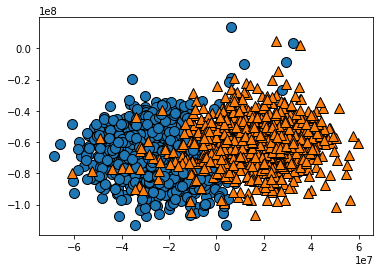

In [65]:
index = 1
train_index, test_index = index_splits_0_1_1_both_p[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

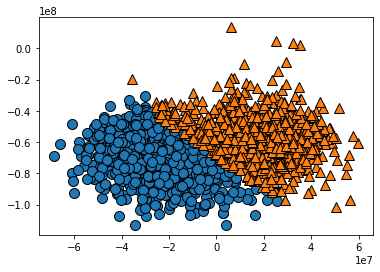

In [66]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_p[index][:])

In [71]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_1_1_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.6384357996275883, 0.783683188868337, 0.7936914961221153, 0.762997887658189, 0.7638581373679982, 0.776886128340339, 0.782712718216635, 0.7661967132125118, 0.7629943853105567, 0.7852321863444125]
Folkes test array: [0.7241022138249564, 0.7553067365321541, 0.7641504758205867, 0.7872258679704668, 0.7642935024903903, 0.7800306614827287, 0.8022621856231503, 0.7825276832195839, 0.7951522426302758, 0.794445856122711]
Assignment fidelity train array: [0.8816666666666667, 0.9383333333333334, 0.9416666666666667, 0.9313888888888889, 0.9316666666666666, 0.9361111111111111, 0.9380555555555555, 0.9325, 0.9313888888888889, 0.9388888888888889]
Assignment fidelity test array: [0.9175, 0.9275, 0.9325, 0.94, 0.9325, 0.9375, 0.945, 0.9375, 0.9425, 0.9425]


In [72]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.762 (±0.0424) with 10 splits
Train score 0.775 (±0.0223) with 10 splits


In [73]:
report_cv_score(assignment_train, assignment_test)

Test score 0.930 (±0.0165) with 10 splits
Train score 0.936 (±0.0079) with 10 splits


In [74]:
qkmeans_0_1_1_both_p_2 = qkmeans_1_both_p
y_pred_0_1_1_both_train_p_2 = y_pred_1_both_train_p
y_pred_0_1_1_both_test_p_2 = y_pred_1_both_test_p
index_splits_0_1_1_both_p_2 = index_splits_0_1_1_both_p
%store index_splits_0_1_1_both_p_2
%store qkmeans_0_1_1_both_p_2
%store y_pred_0_1_1_both_train_p_2
%store y_pred_0_1_1_both_test_p_2

Stored 'index_splits_0_1_1_both_p_2' (list)
Stored 'qkmeans_0_1_1_both_p_2' (list)
Stored 'y_pred_0_1_1_both_train_p_2' (list)
Stored 'y_pred_0_1_1_both_test_p_2' (list)


In [75]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_r = []
y_pred_1_both_train_r = []
y_pred_1_both_test_r = []

index_splits_0_1_1_both_r = []
for train_index, test_index in split_1_both:
    index_splits_0_1_1_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-17 15:24:21,781: Credentials are already in use. The existing account in the session will be replaced.


In [77]:
for i in range(len(index_splits_0_1_1_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_1_1_both_r[i]
    qkmeans_1_both_r.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_r[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_r.append(qkmeans_1_both_r[-1].labels_)
    y_pred_1_both_test_r.append(qkmeans_1_both_r[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0     1.638598  0.353976
1    -0.573330  0.718682
2     0.601179 -0.804156
3    -0.900472 -1.074206
4     1.026067  0.333399
...        ...       ...
1795 -0.923529 -0.185948
1796 -0.570020 -2.012133
1797  1.087612  0.150820
1798  0.750545  0.587562
1799 -0.867559  0.568880

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.52592486 -0.36125046]
 [ 0.46519354 -0.4439795 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.52592486 -0.36125046]
 [-0.10575398  0.0056616 ]]
Iteration 0
Old centroids are [[ 0.52592486 -0.36125046]
 [-0.10575398  0.0056616 ]]
New centroids are           0         1
0  0.822532 -0.039520
1 -0.783279  0.037634
Centers are [0 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.822532 -0.039520
1 -0.783279  0.037634
New centroids are           0         1
0  0.855787  0.209730
1 -0.853887 -0.209264
Centers are [0 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.855787  0.209730
1 -0.853887 -0.209264
New centroids are           0         1
0  0.850248  0.352091
1 -0.837124 -0.346656
Centers are [0 1 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.850248  0.352091
1 -0.837124 -0.346656
New centroids are           0         1
0  0.832321  0.416377
1 -0.814028 -0.407226
Centers are [0 1 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.832321  0.416377
1 -0.814028 

Old centroids are           0         1
0  0.855336  0.157786
1 -0.844007 -0.155696
New centroids are           0         1
0  0.851544  0.332050
1 -0.845885 -0.329844
Centers are [0 1 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.851544  0.332050
1 -0.845885 -0.329844
New centroids are           0         1
0  0.850569  0.406056
1 -0.811781 -0.387539
Centers are [0 1 1 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.850569  0.406056
1 -0.811781 -0.387539
New centroids are           0         1
0  0.828912  0.435335
1 -0.805307 -0.422938
Centers are [0 1 1 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.828912  0.435335
1 -0.805307 -0.422938
New centroids are           0         1
0  0.819171  0.461138
1 -0.790553 -0.445029
Centers are [0 1 1 ... 0 1 0]
Iteration 5
Old centroids are           0         1
0  0.819171  0.461138
1 -0.790553 -0.445029
New centroids are           0         1
0  0.801407  0.471295
1 -0.790793 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.10618662  1.61196433]
 [-0.87608042 -2.2295391 ]]
Iteration 0
Old centroids are [[ 0.10618662  1.61196433]
 [-0.87608042 -2.2295391 ]]
New centroids are           0         1
0  0.375792  0.773248
1 -0.368351 -0.757937
Centers are [1 1 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.375792  0.773248
1 -0.368351 -0.757937
New centroids are           0         1
0  0.547106  0.716209
1 -0.530346 -0.694268
Centers are [0 1 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.547106  0.716209
1 -0.530346 -0.694268
New centroids are           0         1
0  0.640485  0.644957
1 -0.636229 -0.640672
Centers are [0 1 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.640485  0.644957
1 -0.636229 -0.640672
New centroids are           0         1
0  0.706451  0.595414
1 -0.694002 -0.584922
Centers are [0 1 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0  0.706451  0.595414
1 -0.694002 

Old centroids are [[ 0.79533885  0.54094541]
 [-0.18775176 -0.15513665]]
New centroids are           0         1
0  0.767338  0.534215
1 -0.740531 -0.515553
Centers are [0 0 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.767338  0.534215
1 -0.740531 -0.515553
New centroids are           0         1
0  0.780754  0.515482
1 -0.753479 -0.497474
Centers are [0 0 0 ... 0 1 0]
Split 6
Data is:              0         1
0    -0.327541 -0.116855
1    -1.751849 -0.381352
2     2.041212  0.828414
3     1.676613  1.526201
4    -1.761094  0.808404
...        ...       ...
1795 -0.815193  0.496513
1796  0.537907  1.036966
1797  0.223926 -2.027758
1798 -0.989815 -1.332152
1799  0.259804  0.871930

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.31892876 -1.37724236]
 [-0.75347859 -0.49747374]]
Cluster center 1
Centers are: [[-1.31892876 -1.37724236]
 [ 0.2536023   0.10881078]]
Iteration 0
Old centroids are [[-1.31892876 -1.37724236]
 [ 0.2536023   0.10881078]]
New c

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.02344116 -0.09149797]
 [ 0.91865513  1.68438673]]
Iteration 0
Old centroids are [[-0.02344116 -0.09149797]
 [ 0.91865513  1.68438673]]
New centroids are           0         1
0 -0.472459 -0.711597
1  0.498347  0.750589
Centers are [1 1 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.472459 -0.711597
1  0.498347  0.750589
New centroids are           0         1
0 -0.587230 -0.655745
1  0.613922  0.685552
Centers are [1 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.587230 -0.655745
1  0.613922  0.685552
New centroids are           0         1
0 -0.654425 -0.603198
1  0.687221  0.633427
Centers are [1 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0 -0.654425 -0.603198
1  0.687221  0.633427
New centroids are           0         1
0 -0.707964 -0.557279
1  0.735224  0.578737
Centers are [1 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0 -0.707964 -0.557279
1  0.735224 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.26409219  0.4273267 ]
 [ 0.70166143  0.41259588]]
Iteration 0
Old centroids are [[-1.26409219  0.4273267 ]
 [ 0.70166143  0.41259588]]
New centroids are           0         1
0 -0.854823 -0.286932
1  0.866298  0.290784
Centers are [0 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.854823 -0.286932
1  0.866298  0.290784
New centroids are           0         1
0 -0.838008 -0.369240
1  0.849256  0.374196
Centers are [0 0 1 ... 1 1 1]


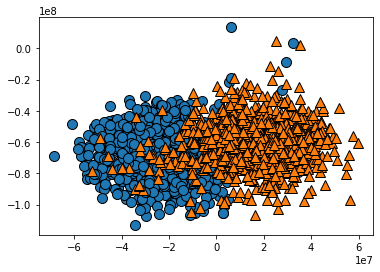

In [84]:
index = 2
train_index, test_index = index_splits_0_1_1_both_r[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

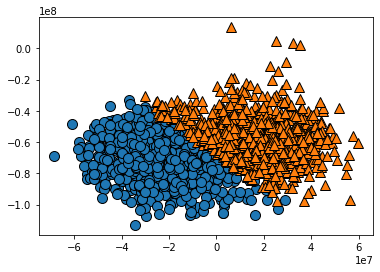

In [85]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_r[index][:])

In [86]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_1_1_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7486742501320486, 0.7868865223936368, 0.7678535885878259, 0.7818987066292761, 0.4995164936040583, 0.49950164996625535, 0.4995779915652315, 0.49992678470702745, 0.5002269885495279, 0.49955268126992364]
Folkes test array: [0.8063306289967219, 0.7220176994844465, 0.7949448719145931, 0.6958499035708526, 0.4962481744141949, 0.49786124572841345, 0.4960407474933925, 0.5045109132514356, 0.507871580290193, 0.49585943245338227]
Assignment fidelity train array: [0.9263888888888889, 0.9394444444444444, 0.9330555555555555, 0.9377777777777778, 0.7486111111111111, 0.7486111111111111, 0.7527777777777778, 0.7569444444444444, 0.7580555555555556, 0.7511111111111111]
Assignment fidelity test array: [0.945, 0.9175, 0.9425, 0.9075, 0.7475, 0.7625, 0.7575000000000001, 0.7825, 0.72, 0.76]


In [87]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.608 (±0.1334) with 10 splits
Train score 0.602 (±0.1285) with 10 splits


In [88]:
report_cv_score(assignment_train, assignment_test)

Test score 0.825 (±0.0890) with 10 splits
Train score 0.824 (±0.0867) with 10 splits


In [89]:
qkmeans_0_1_1_both_r_2 = qkmeans_1_both_r
y_pred_0_1_1_both_train_r_2 = y_pred_1_both_train_r
y_pred_0_1_1_both_test_r_2 = y_pred_1_both_test_r
index_splits_0_1_1_both_r_2 = index_splits_0_1_1_both_r
%store index_splits_0_1_1_both_r_2
%store qkmeans_0_1_1_both_r_2
%store y_pred_0_1_1_both_train_r_2
%store y_pred_0_1_1_both_test_r_2

Stored 'index_splits_0_1_1_both_r_2' (list)
Stored 'qkmeans_0_1_1_both_r_2' (list)
Stored 'y_pred_0_1_1_both_train_r_2' (list)
Stored 'y_pred_0_1_1_both_test_r_2' (list)


## Quantum cross validation correlation analysis

Here we sort assignment fidelities from all four trained QML models to observe the differences between scores obtained from qubits trained with single schedules (|00> and |01> with the 0 qubit as the least significant bit) and both schedules (|00>, |01>, |10> and |11>)

### Folkes Mallows train scores

|        | Q0            | Q1            |
|--------|---------------|---------------|
| Single | 0.883 ±0.0454 | 0.732 ±0.0424 |
| Both   | 0.899 ±0.0185 | 0.775 ±0.0223 |

### Folkes Mallows test scores

|        | Q0            | Q1            |
|--------|---------------|---------------|
| Single | 0.875 ±0.0439 | 0.762 ±0.0210 |
| Both   | 0.890 ±0.0029 | 0.762 ±0.0424 |

### Assignment fidelity train scores

|        | Q0            | Q1            |
|--------|---------------|---------------|
| Single | 0.969 ±0.0138 | 0.920 ±0.0164 |
| Both   | 0.973 ±0.0051 | 0.936 ±0.0079 |

### Assignment fidelity test scores

|        | Q0            | Q1            |
|--------|---------------|---------------|
| Single | 0.966 ±0.0138 | 0.931 ±0.0071 |
| Both   | 0.971 ±0.0008 | 0.930 ±0.0165 |

In [90]:
import pickle

data = {}
data['index_splits_0_1_0_single_p_2'] = index_splits_0_1_0_single_p_2
data['qkmeans_0_1_0_single_p_2'] = qkmeans_0_1_0_single_p_2
data['y_pred_0_1_0_single_train_p_2'] = y_pred_0_1_0_single_train_p_2
data['y_pred_0_1_0_single_test_p_2'] = y_pred_0_1_0_single_test_p_2

with open('data_0_1_0_single_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [91]:
import pickle

data = {}
data['index_splits_0_1_1_single_p_2'] = index_splits_0_1_1_single_p_2
data['qkmeans_0_1_1_single_p_2'] = qkmeans_0_1_1_single_p_2
data['y_pred_0_1_1_single_train_p_2'] = y_pred_0_1_1_single_train_p_2
data['y_pred_0_1_1_single_test_p_2'] = y_pred_0_1_1_single_test_p_2

with open('data_0_1_1_single_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [92]:
import pickle

data = {}
data['index_splits_0_1_0_both_p_2'] = index_splits_0_1_0_both_p_2
data['qkmeans_0_1_0_both_p_2'] = qkmeans_0_1_0_both_p_2
data['y_pred_0_1_0_both_train_p_2'] = y_pred_0_1_0_both_train_p_2
data['y_pred_0_1_0_both_test_p_2'] = y_pred_0_1_0_both_test_p_2

with open('data_0_1_0_both_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [93]:
import pickle

data = {}
data['index_splits_0_1_1_both_p_2'] = index_splits_0_1_1_both_p_2
data['qkmeans_0_1_1_both_p_2'] = qkmeans_0_1_1_both_p_2
data['y_pred_0_1_1_both_train_p_2'] = y_pred_0_1_1_both_train_p_2
data['y_pred_0_1_1_both_test_p_2'] = y_pred_0_1_1_both_test_p_2

with open('data_0_1_1_both_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [94]:
import pickle

data = {}
data['index_splits_0_1_0_single_r_2'] = index_splits_0_1_0_single_r_2
data['qkmeans_0_1_0_single_r_2'] = qkmeans_0_1_0_single_r_2
data['y_pred_0_1_0_single_train_r_2'] = y_pred_0_1_0_single_train_r_2
data['y_pred_0_1_0_single_test_r_2'] = y_pred_0_1_0_single_test_r_2

with open('data_0_1_0_single_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [95]:
import pickle

data = {}
data['index_splits_0_1_1_single_r_2'] = index_splits_0_1_1_single_r_2
data['qkmeans_0_1_1_single_r_2'] = qkmeans_0_1_1_single_r_2
data['y_pred_0_1_1_single_train_r_2'] = y_pred_0_1_1_single_train_r_2
data['y_pred_0_1_1_single_test_r_2'] = y_pred_0_1_1_single_test_r_2

with open('data_0_1_1_single_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [96]:
import pickle

data = {}
data['index_splits_0_1_0_both_r_2'] = index_splits_0_1_0_both_r_2
data['qkmeans_0_1_0_both_r_2'] = qkmeans_0_1_0_both_r_2
data['y_pred_0_1_0_both_train_r_2'] = y_pred_0_1_0_both_train_r_2
data['y_pred_0_1_0_both_test_r_2'] = y_pred_0_1_0_both_test_r_2

with open('data_0_1_0_both_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [97]:
import pickle

data = {}
data['index_splits_0_1_1_both_r_2'] = index_splits_0_1_1_both_r_2
data['qkmeans_0_1_1_both_r_2'] = qkmeans_0_1_1_both_r_2
data['y_pred_0_1_1_both_train_r_2'] = y_pred_0_1_1_both_train_r_2
data['y_pred_0_1_1_both_test_r_2'] = y_pred_0_1_1_both_test_r_2

with open('data_0_1_1_both_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# Qubits 1 and 2

In [5]:
data_00_0 = pd.read_csv('data/dataset_bogota_1_2_00_0.csv')
data_00_1 = pd.read_csv('data/dataset_bogota_1_2_00_1.csv')
data_01_0 = pd.read_csv('data/dataset_bogota_1_2_01_0.csv')
data_01_1 = pd.read_csv('data/dataset_bogota_1_2_01_1.csv')
data_10_0 = pd.read_csv('data/dataset_bogota_1_2_10_0.csv')
data_10_1 = pd.read_csv('data/dataset_bogota_1_2_10_1.csv')
data_11_0 = pd.read_csv('data/dataset_bogota_1_2_11_0.csv')
data_11_1 = pd.read_csv('data/dataset_bogota_1_2_11_1.csv')

In [6]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_p = []
y_pred_0_single_train_p = []
y_pred_0_single_test_p = []

index_splits_0_single_p = []
for train_index, test_index in split_0_single:
    index_splits_0_single_p.append((train_index,test_index))

ibmqfactory.load_account:WARNING:2021-08-19 16:42:52,244: Credentials are already in use. The existing account in the session will be replaced.


In [7]:
for i in range(len(index_splits_0_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_p[i]
    qkmeans_0_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_p[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0   -1.943460  1.122725
1   -0.648866 -0.168645
2   -0.919574  0.418620
3    0.312717  0.319637
4    1.392776 -0.443275
..        ...       ...
895  1.078270 -0.963849
896  0.546239  1.551896
897 -1.037246  0.336891
898 -0.162297  0.040218
899 -0.643543 -0.274252

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.43990131 -1.04719554]
 [ 0.1254902   1.        ]]
Cluster center 1
Centers are: [[-1.43990131 -1.04719554]
 [ 1.37295973  0.77930611]]
Iteration 0
Old centroids are [[-1.43990131 -1.04719554]
 [ 1.37295973  0.77930611]]
New centroids are           0         1
0 -0.768539 -0.470040
1  0.799908  0.489225
Centers are [0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 

Old centroids are           0         1
0 -0.773119 -0.466784
1  0.801105  0.483682
New centroids are           0         1
0 -0.777177 -0.463060
1  0.801737  0.477694
Centers are [0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0

Old centroids are           0         1
0 -0.772531 -0.471314
1  0.796945  0.486209
New centroids are           0         1
0 -0.770033 -0.468363
1  0.801463  0.487480
Centers are [0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0

Old centroids are           0         1
0 -0.778571 -0.461159
1  0.803176  0.475733
New centroids are           0         1
0 -0.774313 -0.464202
1  0.802342  0.481005
Centers are [0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0

Old centroids are           0         1
0  0.859249  0.393474
1 -0.814613 -0.373034
New centroids are           0         1
0  0.842249  0.445226
1 -0.791423 -0.418359
Centers are [1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0

Old centroids are           0         1
0  0.803866  0.491523
1 -0.772342 -0.472248
New centroids are           0         1
0  0.793695  0.480972
1 -0.786671 -0.476716
Centers are [1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0

Cluster center 1
Centers are: [[-1.48567308  0.3189435 ]
 [ 1.90792472  0.81065549]]
Iteration 0
Old centroids are [[-1.48567308  0.3189435 ]
 [ 1.90792472  0.81065549]]
New centroids are           0         1
0 -0.852702 -0.311666
1  0.845156  0.308908
Centers are [0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 

Old centroids are           0         1
0 -0.775431 -0.457482
1  0.814291  0.480408
New centroids are           0         1
0 -0.781944 -0.457995
1  0.810250  0.474574
Centers are [0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.71211652  0.42230877]
 [ 1.18734154 -0.17103588]]
Iteration 0
Old centroids are [[-1.71211652  0.42230877]
 [ 1.18734154 -0.17103588]]
New centroids are           0         1
0 -0.842182 -0.146648
1  0.849702  0.147957
Centers are [1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 

Old centroids are           0         1
0 -0.800150 -0.458153
1  0.818131  0.468448
New centroids are           0         1
0 -0.791268 -0.465852
1  0.816275  0.480574
Centers are [1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0

Old centroids are           0         1
0 -0.781164 -0.487108
1  0.802277  0.500273
New centroids are           0         1
0 -0.775872 -0.491138
1  0.800392  0.506660
Centers are [1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0

Old centroids are           0         1
0 -0.786361 -0.482381
1  0.804032  0.493221
New centroids are           0         1
0 -0.772899 -0.489002
1  0.804446  0.508962
Centers are [1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0   -1.825590 -0.592014
1    1.056859  1.155419
2    1.110973  0.651902
3    0.920818  1.474753
4    0.728133 -1.086309
..        ...       ...
895 -0.502157  1.379705
896  0.146969 -0.816498
897 -0.985857  1.242003
898 -0.639812 -0.889861
899 -1.510584 -0.319838

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.12492907 -0.51129423]
 [ 0.80315077  0.51050355]]
Cluster center 1
Centers are: [[-1.12492907 -0.51129423]
 [ 1.0292845   0.16582431]]
Iteration 0
Old centroids are [[-1.12492907 -0.51129423]
 [ 1.0292845   0.16582431]]
New centroids are           0         1
0 -0.814742 -0.372994
1  0.867065  0.396948
Centers are [0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 

Old centroids are           0         1
0 -0.795751 -0.454783
1  0.817258  0.467074
New centroids are           0         1
0 -0.790542 -0.468583
1  0.808307  0.479113
Centers are [0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1

Old centroids are           0         1
0 -0.778538 -0.477290
1  0.806721  0.494567
New centroids are           0         1
0 -0.791451 -0.470569
1  0.805647  0.479010
Centers are [0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1

Old centroids are           0         1
0 -0.772499 -0.479148
1  0.807613  0.500927
New centroids are           0         1
0 -0.775569 -0.469252
1  0.814436  0.492768
Centers are [0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1

Old centroids are           0         1
0 -0.777601 -0.474792
1  0.809340  0.494171
New centroids are           0         1
0 -0.782898 -0.473455
1  0.807640  0.488418
Centers are [0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1

Old centroids are           0         1
0 -0.595550 -0.640826
1  0.619858  0.666982
New centroids are           0         1
0 -0.693779 -0.562531
1  0.725315  0.588100
Centers are [0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0

Split 6
Data is:             0         1
0    1.199862  0.524801
1    1.915247 -0.930584
2    1.146454  1.580861
3   -0.571360 -0.954213
4   -1.534690 -0.260832
..        ...       ...
895  0.936548  1.283317
896  1.376240 -0.367011
897 -1.760220  1.365578
898  1.663640 -0.408738
899  0.443402  0.574849

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.84422635  1.66165724]
 [ 0.79970449  0.49025756]]
Cluster center 1
Centers are: [[-0.84422635  1.66165724]
 [-0.51677971 -0.78545335]]
Iteration 0
Old centroids are [[-0.84422635  1.66165724]
 [-0.51677971 -0.78545335]]
New centroids are           0         1
0  0.204112  0.778886
1 -0.205935 -0.785841
Centers are [0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 0 1 0 

Old centroids are           0         1
0  0.521127  0.720791
1 -0.509674 -0.704949
New centroids are           0         1
0  0.655291  0.648895
1 -0.629593 -0.623448
Centers are [0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0

Old centroids are           0         1
0  0.781621  0.523708
1 -0.754315 -0.505412
New centroids are           0         1
0  0.799778  0.511779
1 -0.758231 -0.485193
Centers are [0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0

Old centroids are           0         1
0  0.793748  0.487213
1 -0.776303 -0.476505
New centroids are           0         1
0  0.793798  0.487010
1 -0.776352 -0.476306
Centers are [1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1

Old centroids are           0         1
0  0.806074  0.495091
1 -0.777914 -0.477796
New centroids are           0         1
0  0.802490  0.490284
1 -0.784853 -0.479508
Centers are [1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0

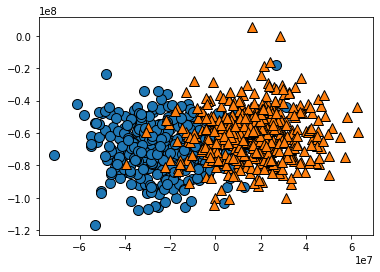

In [8]:
index = 6
train_index, test_index = index_splits_0_single_p[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

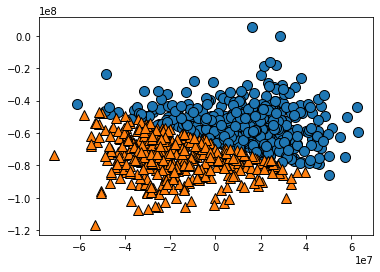

In [9]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_p[index][:])

In [10]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7603225259237175, 0.7635557785786977, 0.7733663315749801, 0.7635463962285317, 0.7700741940865977, 0.7619019370252819, 0.667557281539683, 0.7523638332428731, 0.7523098780064943, 0.7587174469074512]
Folkes test array: [0.8331649773363476, 0.7552867993890224, 0.7398490258068547, 0.7400613005005882, 0.726161369193154, 0.7411262997123601, 0.7000020821032813, 0.7568720857156994, 0.8007331645190594, 0.7411174998536594]
Assignment fidelity train array: [0.9305555555555556, 0.9316666666666666, 0.935, 0.9316666666666666, 0.9338888888888889, 0.9311111111111111, 0.895, 0.9277777777777778, 0.9277777777777778, 0.9299999999999999]
Assignment fidelity test array: [0.955, 0.9299999999999999, 0.925, 0.925, 0.92, 0.925, 0.91, 0.9299999999999999, 0.945, 0.925]


In [11]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.752 (±0.0290) with 10 splits
Train score 0.753 (±0.0359) with 10 splits


In [12]:
report_cv_score(assignment_train, assignment_test)

Test score 0.927 (±0.0110) with 10 splits
Train score 0.929 (±0.0120) with 10 splits


In [13]:
index_splits_1_2_0_single_p_2 = index_splits_0_single_p
qkmeans_1_2_0_single_p_2 = qkmeans_0_single_p
y_pred_1_2_0_single_train_p_2 = y_pred_0_single_train_p
y_pred_1_2_0_single_test_p_2 = y_pred_0_single_test_p
%store index_splits_1_2_0_single_p_2
%store qkmeans_1_2_0_single_p_2
%store y_pred_1_2_0_single_train_p_2
%store y_pred_1_2_0_single_test_p_2

Stored 'index_splits_1_2_0_single_p_2' (list)
Stored 'qkmeans_1_2_0_single_p_2' (list)
Stored 'y_pred_1_2_0_single_train_p_2' (list)
Stored 'y_pred_1_2_0_single_test_p_2' (list)


In [14]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_r = []
y_pred_0_single_train_r = []
y_pred_0_single_test_r = []

index_splits_0_single_r = []
for train_index, test_index in split_0_single:
    index_splits_0_single_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-20 00:49:30,524: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
for i in range(len(index_splits_0_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_r[i]
    qkmeans_0_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_r[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0   -0.617908 -0.877453
1   -0.097966 -0.513418
2   -0.426657 -0.958050
3    0.816140  0.972717
4   -1.541022 -0.734534
..        ...       ...
895  0.811553  1.890550
896 -0.647611 -0.240039
897  0.150700  0.426108
898 -0.982624 -0.108769
899  0.411076 -0.634665

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.538067 -0.254827
1  0.816091  1.142753
New centroids are           0         1
0  0.045865 -0.782146
1 -0.042526  0.725202
Centers are [0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0
 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 

Old centroids are           0         1
0 -0.473098 -0.717580
1  0.488049  0.740257
New centroids are           0         1
0 -0.597914 -0.650357
1  0.616810  0.670910
Centers are [0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1
 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1

Old centroids are          0         1
0 -0.81024 -0.403778
1  0.83957  0.418394
New centroids are           0         1
0 -0.802973 -0.434607
1  0.821018  0.444374
Centers are [0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1
 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 

Old centroids are           0         1
0 -0.779284 -0.502366
1  0.775828  0.500139
New centroids are           0         1
0 -0.767605 -0.500818
1  0.781374  0.509802
Centers are [0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0

Old centroids are           0         1
0 -0.771187 -0.488932
1  0.792030  0.502146
New centroids are           0         1
0 -0.778881 -0.492012
1  0.785835  0.496405
Centers are [0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0

Old centroids are          0         1
0 -1.11331  0.177238
1 -0.56072 -0.363506
New centroids are           0         1
0  0.020868  0.744037
1 -0.021720 -0.774406
Centers are [0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0
 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 

Old centroids are           0         1
0  0.696527  0.624555
1 -0.666243 -0.597400
New centroids are           0         1
0  0.759001  0.561166
1 -0.732485 -0.541562
Centers are [1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1

Old centroids are           0         1
0 -0.720118  0.193693
1  0.704291 -0.189436
New centroids are           0         1
0 -0.825815 -0.082043
1  0.829494  0.082409
Centers are [1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0

Old centroids are           0         1
0 -0.787370 -0.471728
1  0.805063  0.482329
New centroids are           0         1
0 -0.777227 -0.469161
1  0.812555  0.490487
Centers are [1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0

Old centroids are           0         1
0 -0.758616 -0.488930
1  0.803751  0.518019
New centroids are           0         1
0 -0.769374 -0.494103
1  0.793688  0.509718
Centers are [1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0

Old centroids are           0         1
0 -0.756506 -0.487983
1  0.805089  0.519322
New centroids are           0         1
0 -0.763219 -0.488634
1  0.801467  0.513121
Centers are [1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0

Old centroids are           0         1
0 -0.763052 -0.489095
1  0.801292  0.513605
New centroids are           0         1
0 -0.768217 -0.495683
1  0.792495  0.511348
Centers are [1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0

Split 4
Data is:             0         1
0   -0.042888  1.707212
1    0.588263  0.182336
2   -0.521168  0.998066
3    1.015410 -0.679645
4    0.906322  0.466798
..        ...       ...
895 -0.945287 -0.318737
896  0.942213  1.500271
897 -1.495864  0.295980
898 -0.877660 -0.914729
899 -1.892104  1.130834

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.899031  1.999440
1  0.488973 -0.755791
New centroids are           0         1
0 -0.232666  0.671519
1  0.241088 -0.695827
Centers are [0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 0 1 0 0 

Old centroids are           0         1
0  0.229503  0.787250
1 -0.228485 -0.783759
New centroids are           0         1
0  0.392717  0.762458
1 -0.387516 -0.752359
Centers are [0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0

Old centroids are           0         1
0  0.768423  0.522807
1 -0.751535 -0.511317
New centroids are           0         1
0  0.784973  0.507831
1 -0.760925 -0.492274
Centers are [0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0

Old centroids are           0         1
0  0.794873  0.479079
1 -0.780866 -0.470637
New centroids are           0         1
0  0.803539  0.489505
1 -0.768603 -0.468222
Centers are [0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0

Old centroids are           0         1
0  0.797767  0.499337
1 -0.763082 -0.477627
New centroids are           0         1
0  0.793790  0.488685
1 -0.772901 -0.475825
Centers are [0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0

Old centroids are           0         1
0  0.790587  0.489701
1 -0.773212 -0.478938
New centroids are           0         1
0  0.790194  0.494789
1 -0.769399 -0.481768
Centers are [0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0

Old centroids are           0         1
0  0.361933  0.774468
1 -0.353979 -0.757447
New centroids are           0         1
0  0.514202  0.726196
1 -0.500670 -0.707086
Centers are [1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0

Old centroids are           0         1
0  0.790526  0.525305
1 -0.756155 -0.502465
New centroids are           0         1
0  0.791995  0.514791
1 -0.764327 -0.496807
Centers are [1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0

Old centroids are           0         1
0 -0.338728  0.619304
1  0.337226 -0.616558
New centroids are           0         1
0 -0.227620  0.674299
1  0.233772 -0.692523
Centers are [0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0

Old centroids are           0         1
0  0.380014  0.760723
1 -0.374980 -0.750647
New centroids are           0         1
0  0.520483  0.718788
1 -0.500071 -0.690600
Centers are [0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0

Old centroids are           0         1
0  0.800529  0.505184
1 -0.755575 -0.476815
New centroids are           0         1
0  0.802892  0.494363
1 -0.764576 -0.470771
Centers are [0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1

Old centroids are           0         1
0  0.810131  0.469064
1 -0.781829 -0.452678
New centroids are           0         1
0  0.812506  0.474012
1 -0.777180 -0.453403
Centers are [0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1

Old centroids are           0         1
0  0.813686  0.480575
1 -0.771416 -0.455610
New centroids are           0         1
0  0.814275  0.483842
1 -0.768549 -0.456672
Centers are [0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1

Old centroids are           0         1
0  0.818347  0.463468
1 -0.782767 -0.443317
New centroids are          0         1
0  0.82005  0.469291
1 -0.77745 -0.444912
Centers are [0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.925011  0.400853
1 -1.478447  0.307140
New centroids are           0         1
0  0.858071  0.316695
1 -0.842951 -0.311115
Centers are [0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0

Old centroids are           0         1
0  0.809176  0.468225
1 -0.791392 -0.457935
New centroids are           0         1
0  0.801472  0.482263
1 -0.783858 -0.471664
Centers are [0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0   -0.978292  0.062004
1    0.861172  1.290445
2    0.810107 -0.689608
3   -0.311663 -2.409186
4   -0.022353  1.465140
..        ...       ...
895  1.181003 -0.346644
896  0.824992  0.400161
897  1.061328  0.867114
898  0.458040  0.579429
899 -1.098846 -0.951057

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  1.223174  0.786966
1  2.617190  0.372712
New centroids are           0         1
0 -0.122072  0.677747
1  0.136433 -0.757482
Centers are [0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 

Old centroids are           0         1
0  0.369600  0.770060
1 -0.361477 -0.753135
New centroids are           0         1
0  0.489516  0.713380
1 -0.491696 -0.716558
Centers are [1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1

Old centroids are           0         1
0  0.801870  0.509951
1 -0.750136 -0.477051
New centroids are           0         1
0  0.808497  0.496062
1 -0.759708 -0.466127
Centers are [1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1

Old centroids are           0         1
0 -0.341362 -0.758899
1  0.350588  0.779409
New centroids are           0         1
0 -0.494162 -0.717447
1  0.500795  0.727077
Centers are [0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0

Old centroids are           0         1
0 -0.762704 -0.503688
1  0.786807  0.519606
New centroids are           0         1
0 -0.766273 -0.484178
1  0.804674  0.508442
Centers are [0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0

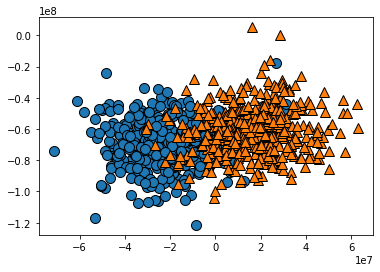

In [16]:
index = 1
train_index, test_index = index_splits_0_single_r[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

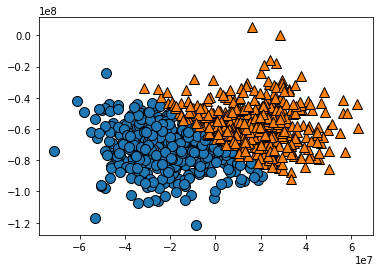

In [17]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_r[index][:])

In [18]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7291570501810754, 0.7571786017843953, 0.7635276786583785, 0.7539148706637513, 0.755545112824327, 0.7539587179837225, 0.7619809201740084, 0.7684314714132554, 0.7619667447189552, 0.7667808964977774]
Folkes test array: [0.7560979056213912, 0.7877051888321405, 0.7128031373019181, 0.7562911711854717, 0.8004078969050439, 0.8002448646482307, 0.8170756010613213, 0.7404848125369441, 0.8164766174420831, 0.7262738764473132]
Assignment fidelity train array: [0.9194444444444444, 0.9294444444444444, 0.9316666666666666, 0.9283333333333333, 0.9288888888888889, 0.9283333333333333, 0.9311111111111111, 0.9333333333333333, 0.9311111111111111, 0.9327777777777778]
Assignment fidelity test array: [0.9299999999999999, 0.94, 0.915, 0.9299999999999999, 0.945, 0.945, 0.95, 0.925, 0.95, 0.92]


In [19]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.757 (±0.0106) with 10 splits
Train score 0.771 (±0.0360) with 10 splits


In [20]:
report_cv_score(assignment_train, assignment_test)

Test score 0.929 (±0.0037) with 10 splits
Train score 0.935 (±0.0120) with 10 splits


In [21]:
index_splits_1_2_0_single_r_2 = index_splits_0_single_r
qkmeans_1_2_0_single_r_2 = qkmeans_0_single_r
y_pred_1_2_0_single_train_r_2 = y_pred_0_single_train_r
y_pred_1_2_0_single_test_r_2 = y_pred_0_single_test_r
%store index_splits_1_2_0_single_r_2
%store qkmeans_1_2_0_single_r_2
%store y_pred_1_2_0_single_train_r_2
%store y_pred_1_2_0_single_test_r_2

Stored 'index_splits_1_2_0_single_r_2' (list)
Stored 'qkmeans_1_2_0_single_r_2' (list)
Stored 'y_pred_1_2_0_single_train_r_2' (list)
Stored 'y_pred_1_2_0_single_test_r_2' (list)


In [22]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_p = []
y_pred_1_single_train_p = []
y_pred_1_single_test_p = []

index_splits_1_single_p = []
for train_index, test_index in split_1_single:
    index_splits_1_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-20 03:30:32,522: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
for i in range(len(index_splits_1_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_single_p[i]
    qkmeans_1_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_p[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_p.append(qkmeans_1_single_p[-1].labels_)
    y_pred_1_single_test_p.append(qkmeans_1_single_p[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0    0.967050 -0.545792
1    0.731598  0.950189
2    0.923616  0.825468
3    1.124363  0.557200
4    0.782770 -0.237886
..        ...       ...
895  1.253839 -1.127138
896 -0.909556 -0.277059
897  0.757258 -0.602279
898 -1.187967 -0.948643
899  0.905524 -0.741015

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.16007857e+000 -4.52750826e-001]
 [ 4.94065646e-323  2.02566915e-322]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.16007857 -0.45275083]
 [-1.00213761  0.56290864]]
Iteration 0
Old centroids are [[ 1.16007857 -0.45275083]
 [-1.00213761  0.56290864]]
New centroids are           0         1
0  0.919230 -0.085419
1 -0.907055  0.084288
Centers are [0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 

Old centroids are           0         1
0  0.913562  0.163513
1 -0.998545 -0.178724
New centroids are           0         1
0  0.915250  0.165845
1 -0.995945 -0.180467
Centers are [0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1

Old centroids are           0         1
0  0.928975  0.156092
1 -0.984246 -0.165379
New centroids are           0         1
0  0.927273  0.153791
1 -0.986822 -0.163668
Centers are [1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.35071802  0.38540742]
 [-1.07861016 -0.39068108]]
Iteration 0
Old centroids are [[ 1.35071802  0.38540742]
 [-1.07861016 -0.39068108]]
New centroids are           0         1
0  0.905993  0.158391
1 -0.999133 -0.174674
Centers are [0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 

Old centroids are           0         1
0  0.912694  0.136183
1 -1.002049 -0.149515
New centroids are           0         1
0  0.910989  0.134545
1 -1.004642 -0.148377
Centers are [0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.85233955  0.00541433]
 [-0.70983118  0.50787142]]
Iteration 0
Old centroids are [[ 0.85233955  0.00541433]
 [-0.70983118  0.50787142]]
New centroids are           0         1
0  0.962047 -0.021150
1 -0.932575  0.020502
Centers are [0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1
 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.8021725  -0.96483121]
 [ 1.0885465  -0.07101308]]
Iteration 0
Old centroids are [[-0.8021725  -0.96483121]
 [ 1.0885465  -0.07101308]]
New centroids are           0         1
0 -0.978406 -0.207815
1  0.919365  0.195274
Centers are [1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 

Old centroids are           0         1
0 -0.994637 -0.187506
1  0.918127  0.173082
New centroids are           0         1
0 -0.993279 -0.182249
1  0.920963  0.168980
Centers are [1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1

Old centroids are           0         1
0 -0.990711 -0.183324
1  0.922680  0.170735
New centroids are           0         1
0 -0.994637 -0.187506
1  0.918127  0.173082
Centers are [1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.95526376  0.67524971]
 [-1.07039962 -0.74871163]]
Iteration 0
Old centroids are [[ 0.95526376  0.67524971]
 [-1.07039962 -0.74871163]]
New centroids are           0         1
0  0.922577  0.305038
1 -0.863056 -0.285358
Centers are [0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0   -0.413256  2.121536
1   -0.797509  1.163479
2    1.099506  1.348357
3   -1.488191 -0.333808
4   -1.489882 -1.231169
..        ...       ...
895 -0.879466 -0.490848
896 -0.949732  0.081391
897  1.081525 -0.071955
898  0.532548 -0.336147
899 -1.303261 -0.312106

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.77400715 -0.66179442]
 [-0.9831856  -0.18131444]]
Cluster center 1
Centers are: [[-0.77400715 -0.66179442]
 [ 1.44724904  1.04127334]]
Iteration 0
Old centroids are [[-0.77400715 -0.66179442]
 [ 1.44724904  1.04127334]]
New centroids are           0         1
0 -0.823836 -0.294161
1  0.920758  0.328768
Centers are [1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 0 

Split 7
Data is:             0         1
0   -0.707254  0.045254
1   -0.704708 -0.409517
2    0.106573  3.211756
3   -1.149221 -0.148244
4    0.915427 -0.423954
..        ...       ...
895 -0.876047  0.133687
896 -1.475486  0.510863
897 -0.931533  0.088727
898  0.862784 -0.026312
899 -0.901442 -0.026260

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.0665006  0.03302344]
 [0.9169948  0.14704128]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.0665006   0.03302344]
 [-1.10772662  0.30872824]]
Iteration 0
Old centroids are [[ 1.0665006   0.03302344]
 [-1.10772662  0.30872824]]
New centroids are           0         1
0  0.954825  0.002368
1 -0.946375 -0.002347
Centers are [1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 

account._job_result_object_storage:WARNING:2021-08-20 04:31:16,748: An error occurred while sending download completion acknowledgement: "('Connection aborted.', ConnectionResetError(10054, 'Se ha forzado la interrupción de una conexión existente por el host remoto', None, 10054, None))"


Old centroids are           0         1
0  0.943876  0.089127
1 -0.969386 -0.091536
New centroids are           0         1
0  0.930325  0.141115
1 -0.981302 -0.148847
Centers are [1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0

Old centroids are           0         1
0  0.924713  0.157778
1 -0.988487 -0.168659
New centroids are           0         1
0  0.926398  0.160049
1 -0.985891 -0.170327
Centers are [0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:             0         1
0    0.764147  0.127566
1   -0.691332 -0.434172
2    0.674639  1.518903
3    0.914097 -1.085462
4    0.830622 -1.689113
..        ...       ...
895 -1.057181  0.602589
896 -1.220667  0.541334
897 -1.213909  0.643333
898 -1.237219 -0.597522
899  1.309048 -0.809805

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.2478851   1.95399472]
 [-0.98848681 -0.16865899]]
Cluster center 1
Centers are: [[-1.2478851   1.95399472]
 [-0.93174365 -0.77724172]]
Iteration 0
Old centroids are [[-1.2478851   1.95399472]
 [-0.93174365 -0.77724172]]
New centroids are           0         1
0  0.344983  0.792404
1 -0.240838 -0.553187
Centers are [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 1 0 0 

Old centroids are           0         1
0  0.920954  0.242137
1 -0.912804 -0.239994
New centroids are           0         1
0  0.912567  0.155762
1 -0.997457 -0.170251
Centers are [0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


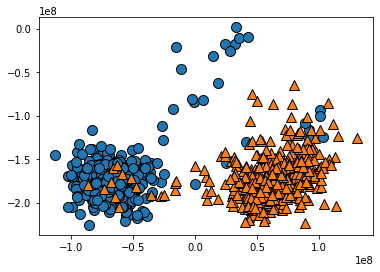

In [24]:
index = 0
train_index, test_index = index_splits_1_single_p[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

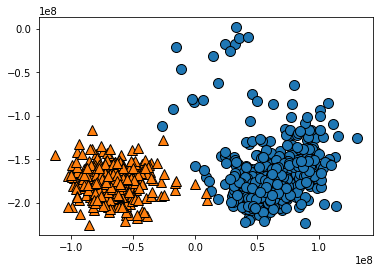

In [25]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_p[index][:])

In [27]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9109409621032732, 0.9088535618014044, 0.9069402895820047, 0.9068184344815621, 0.9108885796708163, 0.90083193864644, 0.9089113298671827, 0.9048245044468972, 0.9028409155491528, 0.9028928701842138]
Folkes test array: [0.8189003047160018, 0.8500407497962511, 0.904717218807273, 0.9228092947267801, 0.8498572011423908, 0.9033181962723908, 0.8679324056281248, 0.9409701957230581, 0.9408219495368315, 0.9219539617945657]
Assignment fidelity train array: [0.9766666666666667, 0.9761111111111112, 0.9755555555555555, 0.9755555555555555, 0.9766666666666667, 0.9738888888888889, 0.9761111111111112, 0.975, 0.9744444444444444, 0.9744444444444444]
Assignment fidelity test array: [0.95, 0.96, 0.975, 0.98, 0.96, 0.975, 0.965, 0.985, 0.985, 0.98]


In [28]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.906 (±0.0033) with 10 splits
Train score 0.892 (±0.0405) with 10 splits


In [29]:
report_cv_score(assignment_train, assignment_test)

Test score 0.975 (±0.0009) with 10 splits
Train score 0.972 (±0.0114) with 10 splits


In [30]:
index_splits_1_2_1_single_p_2 = index_splits_1_single_p
qkmeans_1_2_1_single_p_2 = qkmeans_1_single_p
y_pred_1_2_1_single_train_p_2 = y_pred_1_single_train_p
y_pred_1_2_1_single_test_p_2 = y_pred_1_single_test_p
%store index_splits_1_2_1_single_p_2
%store qkmeans_1_2_1_single_p_2
%store y_pred_1_2_1_single_train_p_2
%store y_pred_1_2_1_single_test_p_2

Stored 'index_splits_1_2_1_single_p_2' (list)
Stored 'qkmeans_1_2_1_single_p_2' (list)
Stored 'y_pred_1_2_1_single_train_p_2' (list)
Stored 'y_pred_1_2_1_single_test_p_2' (list)


In [31]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_1_1_single = cv.split(X_1_single_train)
qkmeans_1_single_r = []
y_pred_1_single_train_r = []
y_pred_1_single_test_r = []

index_splits_1_2_1_single_r = []
for train_index, test_index in split_0_1_1_single:
    index_splits_1_2_1_single_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-20 12:26:07,321: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
for i in range(len(index_splits_1_2_1_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_1_2_1_single_r[i]
    qkmeans_1_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_r[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_r.append(qkmeans_1_single_r[-1].labels_)
    y_pred_1_single_test_r.append(qkmeans_1_single_r[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0    1.140006  0.870339
1   -1.313741 -0.447442
2   -1.033504  0.493207
3   -0.960220 -0.798787
4    0.628210  0.128096
..        ...       ...
895  0.463900 -0.640756
896  1.340859 -0.180205
897 -1.011260 -1.227130
898  1.256616 -0.386908
899  1.002406  0.417150

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.934096 -0.094127
1 -0.968432  0.155778
New centroids are           0         1
0  0.945835  0.034041
1 -0.958531 -0.034498
Centers are [0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.663958 -0.418946
1 -0.937027 -0.432167
New centroids are           0         1
0  0.946648  0.083831
1 -0.963628 -0.085335
Centers are [0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0
 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1

Old centroids are           0         1
0  0.457092 -1.151312
1  1.026641 -0.034874
New centroids are           0         1
0 -0.607306 -0.418873
1  0.819783  0.565424
Centers are [0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0

Split 3
Data is:             0         1
0   -0.909789 -0.318207
1    0.216763  4.861138
2   -0.711742 -0.416715
3    0.751295 -0.012663
4   -1.115876  1.057739
..        ...       ...
895  0.512337 -0.707374
896 -1.432959  0.599193
897 -0.891209 -0.353248
898 -1.116033  0.277986
899 -0.531801 -0.702715

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.900562 -0.117678
1  1.001332 -0.330868
New centroids are           0         1
0 -0.959064 -0.042308
1  0.946362  0.041748
Centers are [0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0

Old centroids are           0         1
0 -0.986481 -0.170123
1  0.922837  0.159147
New centroids are           0         1
0 -0.987729 -0.163300
1  0.924004  0.152764
Centers are [0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0

Old centroids are           0         1
0  0.762954 -0.326773
1 -0.733034  0.313958
New centroids are           0         1
0  0.957961 -0.081196
1 -0.892178  0.075620
Centers are [1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0

Old centroids are           0         1
0  0.932872  0.160675
1 -0.979622 -0.168727
New centroids are           0         1
0  0.931693  0.167245
1 -0.978384 -0.175627
Centers are [1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -0.945291 -0.403214
1   -1.006033 -1.190108
2    0.886392 -0.059659
3    0.517549  0.535966
4   -1.062473 -0.064448
..        ...       ...
895 -1.230185  1.134422
896  0.764748 -0.669726
897  1.191161  3.688592
898 -0.832211 -0.403825
899  0.747133  0.299959

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.486481  5.354023
1  0.766373 -0.058879
New centroids are           0         1
0 -0.692162  0.365602
1  0.692162 -0.365602
Centers are [0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0

Old centroids are           0         1
0 -0.988040 -0.167292
1  0.928417  0.157197
New centroids are           0         1
0 -0.987108 -0.175681
1  0.927541  0.165080
Centers are [0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0   -1.073357 -0.179758
1    0.570687 -1.218276
2   -0.944760 -0.799188
3   -0.676244  0.249907
4   -1.184814 -0.693413
..        ...       ...
895 -0.692146  0.449946
896 -1.059374 -0.761028
897  1.222291 -0.625501
898  0.855109  0.471242
899 -0.417552 -0.757355

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.767337 -0.805422
1 -0.869613 -0.575999
New centroids are           0         1
0  0.948385  0.001183
1 -0.952610 -0.001189
Centers are [1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1

Old centroids are           0         1
0  0.922822  0.151034
1 -0.990864 -0.162170
New centroids are           0         1
0  0.924534  0.152771
1 -0.988295 -0.163307
Centers are [1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0    1.173936  0.522273
1   -1.022386 -0.938802
2   -1.369782  0.155150
3    1.386088  0.484994
4   -1.064222 -0.404307
..        ...       ...
895  1.144515  0.378623
896  1.010024 -0.693365
897 -1.189742 -0.071092
898 -1.010700  0.286852
899  0.659788 -0.015650

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.789474  0.098097
1 -0.241300 -0.236395
New centroids are           0         1
0 -0.284049  0.633796
1  0.251892 -0.562045
Centers are [0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0

Old centroids are           0         1
0 -0.953839  0.015072
1  0.945397 -0.014938
New centroids are           0         1
0 -0.981043 -0.093671
1  0.934226  0.089201
Centers are [1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0   -1.141221  0.328238
1    0.580355 -0.197788
2   -1.113159 -0.411274
3    0.796895 -0.254964
4    1.085926 -0.803563
..        ...       ...
895 -1.393373 -0.358312
896  1.680539  0.810815
897  1.292040  0.405330
898  1.944244  1.553716
899  0.770065 -0.009399

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.224258 -0.109333
1  0.525514  5.541238
New centroids are           0         1
0 -0.739649 -0.358831
1  0.895938  0.434653
Centers are [0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1

Old centroids are          0         1
0 -0.37603 -0.711545
1  0.84765 -0.594698
New centroids are           0         1
0 -0.980798 -0.162833
1  0.929847  0.154374
Centers are [0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 

Old centroids are           0         1
0 -0.979437 -0.158912
1  0.932696  0.151328
New centroids are           0         1
0 -0.978123 -0.153740
1  0.935596  0.147056
Centers are [0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


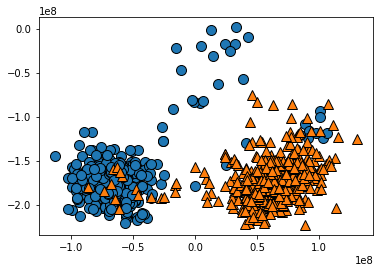

In [33]:
index = 2
train_index, test_index = index_splits_1_2_1_single_r[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

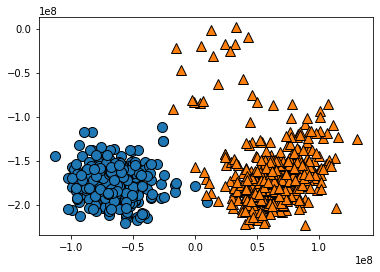

In [34]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_r[index][:])

In [36]:
fowlkes_train = []
fowlkes_test = []
for index in range(10):
    train_index, test_index = index_splits_1_2_1_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9129065416830118, 0.9128728194869922, 0.9008486615490149, 0.9008486615490149, 0.9048178992411164, 0.9028346306211984, 0.9088724696492424, 0.9108934866025952, 0.9048764307954971, 0.9128676353287919]
Folkes test array: [0.8671699833643499, 0.8683648146327092, 0.9600163198694411, 0.9798166970263985, 0.9039568517485352, 0.9407698745315437, 0.867387890830848, 0.8671699833643499, 0.9033181962723908, 0.8519710378117458]
Assignment fidelity train array: [0.9766666666666667, 0.9761111111111112, 0.9755555555555555, 0.9755555555555555, 0.9766666666666667, 0.9738888888888889, 0.9761111111111112, 0.975, 0.9744444444444444, 0.9744444444444444, 0.9772222222222222, 0.9772222222222222, 0.9772222222222222, 0.9738888888888889, 0.9738888888888889, 0.975, 0.9744444444444444, 0.9761111111111112, 0.9766666666666667, 0.975, 0.9772222222222222]
Assignment fidelity test array: [0.95, 0.96, 0.975, 0.98, 0.96, 0.975, 0.965, 0.985, 0.985, 0.98, 0.965, 0.965, 0.99, 0.995, 0.975, 0.985, 0.965,

In [37]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.907 (±0.0047) with 10 splits
Train score 0.901 (±0.0426) with 10 splits


In [38]:
report_cv_score(assignment_train, assignment_test)

Test score 0.976 (±0.0012) with 21 splits
Train score 0.973 (±0.0116) with 20 splits


In [39]:
index_splits_1_2_1_single_r_2 = index_splits_1_2_1_single_r
qkmeans_1_2_1_single_r_2 = qkmeans_1_single_r
y_pred_1_2_1_single_train_r_2 = y_pred_1_single_train_r
y_pred_1_2_1_single_test_r_2 = y_pred_1_single_test_r
%store index_splits_1_2_1_single_r_2
%store qkmeans_1_2_1_single_r_2
%store y_pred_1_2_1_single_train_r_2
%store y_pred_1_2_1_single_test_r_2

Stored 'index_splits_1_2_1_single_r_2' (list)
Stored 'qkmeans_1_2_1_single_r_2' (list)
Stored 'y_pred_1_2_1_single_train_r_2' (list)
Stored 'y_pred_1_2_1_single_test_r_2' (list)


In [40]:
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split, cross_validate
from sklearn.metrics import fowlkes_mallows_score, davies_bouldin_score

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_p = []
y_pred_0_both_train_p = []
y_pred_0_both_test_p = []

index_splits_1_2_0_both_p = []
for train_index, test_index in split_0_both:
    index_splits_1_2_0_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-20 16:21:53,106: Credentials are already in use. The existing account in the session will be replaced.


In [41]:
for i in range(len(index_splits_1_2_0_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_2_0_both_p[i]
    qkmeans_0_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_p[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_p.append(qkmeans_0_both_p[-1].labels_)
    y_pred_0_both_test_p.append(qkmeans_0_both_p[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0    -1.579303  0.370440
1    -0.097353 -1.079024
2     1.466289  1.072504
3     0.683339  0.127896
4     1.453690 -0.329611
...        ...       ...
1795  0.309507  0.875330
1796  1.236190  1.133354
1797  0.999798 -0.832078
1798  1.241137 -0.994707
1799 -0.114048 -0.812531

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[5.72270502e-001 8.01475101e-002]
 [1.97626258e-323 2.56914136e-322]]
Cluster center 1
Centers are: [[ 0.5722705   0.08014751]
 [-2.32436607 -0.48763338]]
Iteration 0
Old centroids are [[ 0.5722705   0.08014751]
 [-2.32436607 -0.48763338]]
New centroids are           0         1
0  0.854187  0.320678
1 -0.837273 -0.314328
Centers are [1 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.854187  0.320678
1 -0.837273 -0.314328
New centroids are           0         1
0  0.832440  0.412672
1 -0.808734 -0.400920
Centers are [1 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.83244

Old centroids are           0         1
0 -0.546895 -0.687848
1  0.554235  0.697080
New centroids are           0         1
0 -0.635104 -0.616324
1  0.661026  0.641480
Centers are [0 1 1 ... 0 0 0]
Iteration 9
Old centroids are           0         1
0 -0.635104 -0.616324
1  0.661026  0.641480
New centroids are           0         1
0 -0.703740 -0.557306
1  0.727596  0.576198
Centers are [0 1 1 ... 0 0 0]
Iteration 10
Old centroids are           0         1
0 -0.703740 -0.557306
1  0.727596  0.576198
New centroids are           0         1
0 -0.745653 -0.517248
1  0.762409  0.528871
Centers are [0 1 1 ... 0 0 0]
Iteration 11
Old centroids are           0         1
0 -0.745653 -0.517248
1  0.762409  0.528871
New centroids are           0         1
0 -0.770503 -0.484013
1  0.787817  0.494890
Centers are [0 1 1 ... 0 0 0]
Split 3
Data is:              0         1
0     1.072980 -1.306277
1    -0.090586  1.122613
2     0.809298  1.025780
3    -1.188919  0.495988
4     1.099594  0.581543
...

Old centroids are           0         1
0 -0.804549 -0.437096
1  0.815348  0.442963
New centroids are           0         1
0 -0.796033 -0.448937
1  0.810311  0.456990
Centers are [1 0 0 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0 -0.796033 -0.448937
1  0.810311  0.456990
New centroids are           0         1
0 -0.791941 -0.460817
1  0.802572  0.467002
Centers are [1 0 0 ... 1 0 1]
Iteration 5
Old centroids are           0         1
0 -0.791941 -0.460817
1  0.802572  0.467002
New centroids are           0         1
0 -0.787561 -0.468264
1  0.798132  0.474550
Centers are [1 0 0 ... 1 1 1]
Split 6
Data is:              0         1
0     1.104340 -0.051101
1    -0.476201 -0.074485
2    -0.164672 -1.128000
3     1.212490  0.971680
4    -0.937623  0.469289
...        ...       ...
1795  1.943506  0.865118
1796  0.573989  0.194619
1797 -1.412211  0.738093
1798  0.426089  1.115715
1799  1.623561  1.543947

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.15566

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.1556644   4.1185229 ]
 [ 1.26826765 -1.24929971]]
Iteration 0
Old centroids are [[ 0.1556644   4.1185229 ]
 [ 1.26826765 -1.24929971]]
New centroids are           0         1
0 -0.136938  0.721462
1  0.143800 -0.757618
Centers are [1 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.136938  0.721462
1  0.143800 -0.757618
New centroids are           0         1
0  0.002650  0.759850
1 -0.002788 -0.799706
Centers are [1 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.002650  0.759850
1 -0.002788 -0.799706
New centroids are           0         1
0  0.170763  0.778269
1 -0.178525 -0.813645
Centers are [0 1 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.170763  0.778269
1 -0.178525 -0.813645
New centroids are           0         1
0  0.340285  0.762061
1 -0.353387 -0.791404
Centers are [0 1 1 ... 0 0 0]
Split 7
Data is:              0         1
0     0.219156 -1.484642
1    -1.296704 -0.6

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 2.30971121e+00  6.38746689e-04]
 [-1.05389441e+00 -4.43237855e-01]]
Iteration 0
Old centroids are [[ 2.30971121e+00  6.38746689e-04]
 [-1.05389441e+00 -4.43237855e-01]]
New centroids are           0         1
0  0.850659  0.338083
1 -0.835669 -0.332126
Centers are [0 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.850659  0.338083
1 -0.835669 -0.332126
New centroids are           0         1
0  0.833565  0.420863
1 -0.806235 -0.407064
Centers are [0 0 1 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0  0.833565  0.420863
1 -0.806235 -0.407064
New centroids are           0         1
0  0.811599  0.455634
1 -0.793762 -0.445620
Centers are [0 0 1 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0  0.811599  0.455634
1 -0.793762 -0.445620
New centroids are           0         1
0  0.800894  0.466318
1 -0.790286 -0.460142
Centers are [0 0 1 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0 

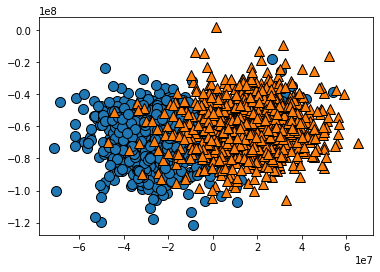

In [42]:
index = 6
train_index, test_index = index_splits_1_2_0_both_p[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

Text(0.5, 1.0, '|0> and |1> state clustering')

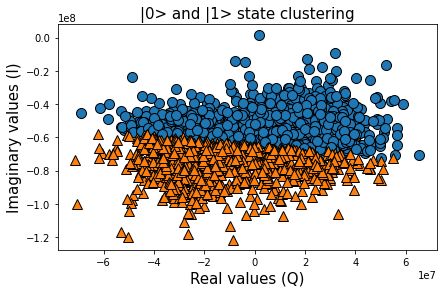

In [43]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_p[index][:])
plt.tight_layout()
plt.xlabel("Real values (Q)", fontsize=15)
plt.ylabel("Imaginary values (I)", fontsize=15)
plt.title("|0> and |1> state clustering", fontsize=15)
#plt.savefig('clustering_0_qubit_both.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.svg', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.png',dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [45]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_2_0_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7736673285707444, 0.770377067493509, 0.7550383906634378, 0.7794007731317886, 0.7786232913389323, 0.7695161165498705, 0.5626840252890613, 0.7794067419431657, 0.7801974831692943, 0.771223866140266]
Folkes test array: [0.8022421977578021, 0.84307759341108, 0.8184937623375627, 0.7232463258190838, 0.779319090193845, 0.8107738345502351, 0.6070113871451607, 0.7512769085856555, 0.7122393644250528, 0.728841449986451]
Assignment fidelity train array: [0.935, 0.9338888888888889, 0.928611111111111, 0.9369444444444445, 0.9366666666666666, 0.9336111111111112, 0.8386111111111111, 0.9369444444444445, 0.9372222222222222, 0.9341666666666667]
Assignment fidelity test array: [0.945, 0.9575, 0.95, 0.9175, 0.9375, 0.9475, 0.8674999999999999, 0.9275, 0.9125, 0.92]


In [46]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.752 (±0.0635) with 10 splits
Train score 0.758 (±0.0656) with 10 splits


In [47]:
report_cv_score(assignment_train, assignment_test)

Test score 0.925 (±0.0290) with 10 splits
Train score 0.928 (±0.0249) with 10 splits


In [49]:
qkmeans_1_2_0_both_p_2 = qkmeans_0_both_p
y_pred_1_2_0_both_train_p_2 = y_pred_0_both_train_p
y_pred_1_2_0_both_test_p_2 = y_pred_0_both_test_p
index_splits_1_2_0_both_p_2 = index_splits_1_2_0_both_p
%store index_splits_1_2_0_both_p_2
%store qkmeans_1_2_0_both_p_2
%store y_pred_1_2_0_both_train_p_2
%store y_pred_1_2_0_both_test_p_2

Stored 'index_splits_1_2_0_both_p_2' (list)
Stored 'qkmeans_1_2_0_both_p_2' (list)
Stored 'y_pred_1_2_0_both_train_p_2' (list)
Stored 'y_pred_1_2_0_both_test_p_2' (list)


In [50]:
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split, cross_validate
from sklearn.metrics import fowlkes_mallows_score, davies_bouldin_score

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_r = []
y_pred_0_both_train_r = []
y_pred_0_both_test_r = []

index_splits_1_2_0_both_r = []
for train_index, test_index in split_0_both:
    index_splits_1_2_0_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-22 02:17:09,030: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
for i in range(len(index_splits_1_2_0_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_1_2_0_both_r[i]
    qkmeans_0_both_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_r[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_r.append(qkmeans_0_both_r[-1].labels_)
    y_pred_0_both_test_r.append(qkmeans_0_both_r[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0     1.054864  0.931496
1    -0.727381  0.488755
2    -0.019226 -2.610327
3    -0.028708 -0.138930
4     1.085583 -1.314818
...        ...       ...
1795  0.073184  0.408566
1796 -1.252467  1.110594
1797  0.247769  1.162390
1798 -0.005784  0.425845
1799  0.050109  1.892066

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.415600 -1.148200
1 -0.942781 -1.313104
New centroids are          0         1
0  0.69413 -0.185561
1 -0.68646  0.183511
Centers are [0 1 0 ... 1 1 1]
Iteration 1
Old centroids are          0         1
0  0.69413 -0.185561
1 -0.68646  0.183511
New centroids are           0         1
0  0.839726  0.089035
1 -0.821270 -0.087078
Centers are [0 1 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.839726  0.089035
1 -0.821270 -0.087078
New centroids are           0         1
0  0.859585  0.301417
1 -0.838827 -0.294138
Centers are [0 1 1 ... 0 0 0]
Iteration 3
Old centroids are     

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.093269  1.272907
1  0.369016 -1.833878
New centroids are           0         1
0  0.356233  0.754262
1 -0.369128 -0.781566
Centers are [1 0 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.356233  0.754262
1 -0.369128 -0.781566
New centroids are           0         1
0  0.501651  0.712566
1 -0.506130 -0.718929
Centers are [1 0 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.501651  0.712566
1 -0.506130 -0.718929
New centroids are           0         1
0  0.632631  0.665368
1 -0.603782 -0.635025
Centers are [1 0 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0  0.632631  0.665368
1 -0.603782 -0.635025
New centroids are           0         1
0  0.720605  0.615571
1 -0.663695 -0.566956
Centers are [1 0 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0  0.720605  0.615571
1 -0.663695 -0.566956
New centroids are           0         1
0  0.754893  0.567529
1 -0.707763 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.653577  0.335639
1  1.466905 -0.681240
New centroids are           0         1
0  0.150052  0.766424
1 -0.159688 -0.815644
Centers are [0 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.150052  0.766424
1 -0.159688 -0.815644
New centroids are           0         1
0  0.315050  0.763774
1 -0.328639 -0.796718
Centers are [0 0 1 ... 1 0 1]
Iteration 2
Old centroids are           0         1
0  0.315050  0.763774
1 -0.328639 -0.796718
New centroids are           0         1
0  0.465050  0.735729
1 -0.467121 -0.739006
Centers are [0 0 1 ... 1 0 1]
Iteration 3
Old centroids are           0         1
0  0.465050  0.735729
1 -0.467121 -0.739006
New centroids are           0         1
0  0.594216  0.684406
1 -0.579866 -0.667879
Centers are [0 0 1 ... 1 0 1]
Iteration 4
Old centroids are           0         1
0  0.594216  0.684406
1 -0.579866 -0.667879
New centroids are           0         1
0  0.687649  0.624204
1 -0.660683 -0

Old centroids are           0         1
0  0.808375  0.468731
1 -0.785354 -0.455383
New centroids are           0         1
0  0.814372  0.471144
1 -0.780699 -0.451663
Centers are [1 1 0 ... 1 1 0]
Iteration 17
Old centroids are           0         1
0  0.814372  0.471144
1 -0.780699 -0.451663
New centroids are           0         1
0  0.809525  0.467042
1 -0.786472 -0.453742
Centers are [1 1 0 ... 1 1 0]
Iteration 18
Old centroids are           0         1
0  0.809525  0.467042
1 -0.786472 -0.453742
New centroids are           0         1
0  0.814309  0.464567
1 -0.785861 -0.448337
Centers are [1 1 0 ... 1 1 0]
Iteration 19
Old centroids are           0         1
0  0.814309  0.464567
1 -0.785861 -0.448337
New centroids are           0         1
0  0.812489  0.465552
1 -0.785850 -0.450288
Centers are [1 1 0 ... 1 1 0]
Iteration 20
Old centroids are           0         1
0  0.812489  0.465552
1 -0.785850 -0.450288
New centroids are           0         1
0  0.816809  0.469203
1 -0.78129

Split 5
Data is:              0         1
0    -0.401416 -0.718672
1     1.025384  0.798226
2    -1.717902  0.248258
3    -1.406511  0.025634
4    -0.148542 -1.438122
...        ...       ...
1795  1.648851  0.195970
1796  1.412798  0.931183
1797 -0.689838  0.020262
1798  0.903081 -0.842914
1799 -0.502662 -0.202100

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.467424 -1.664244
1 -0.712936  0.869978
New centroids are           0         1
0  0.002234 -0.779243
1 -0.002190  0.763812
Centers are [0 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.002234 -0.779243
1 -0.002190  0.763812
New centroids are           0         1
0 -0.180257 -0.799573
1  0.176295  0.782000
Centers are [0 1 1 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.180257 -0.799573
1  0.176295  0.782000
New centroids are           0         1
0 -0.363323 -0.775415
1  0.358511  0.765145
Centers are [0 1 0 ... 0 0 0]
Iteration 3
Old centroids ar

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.252061 -0.985880
1 -0.466053 -1.837939
New centroids are           0        1
0 -0.658921  0.28275
1  0.666283 -0.28591
Centers are [1 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0        1
0 -0.658921  0.28275
1  0.666283 -0.28591
New centroids are           0         1
0 -0.766556  0.088966
1  0.778574 -0.090361
Centers are [1 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.766556  0.088966
1  0.778574 -0.090361
New centroids are           0         1
0 -0.835565 -0.165803
1  0.861971  0.171042
Centers are [1 0 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.835565 -0.165803
1  0.861971  0.171042
New centroids are           0         1
0 -0.833605 -0.330506
1  0.852338  0.337934
Centers are [1 0 0 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.833605 -0.330506
1  0.852338  0.337934
New centroids are           0         1
0 -0.801936 -0.401918
1  0.838388  0.42018

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.220605 -0.364442
1  0.885697 -0.877160
New centroids are           0         1
0 -0.820682 -0.089328
1  0.837262  0.091133
Centers are [1 0 0 ... 1 1 0]
Iteration 1
Old centroids are           0         1
0 -0.820682 -0.089328
1  0.837262  0.091133
New centroids are           0         1
0 -0.842703 -0.304449
1  0.848340  0.306486
Centers are [1 0 0 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0 -0.842703 -0.304449
1  0.848340  0.306486
New centroids are           0         1
0 -0.811237 -0.392956
1  0.838736  0.406276
Centers are [1 0 0 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0 -0.811237 -0.392956
1  0.838736  0.406276
New centroids are           0         1
0 -0.797531 -0.436839
1  0.817268  0.447649
Centers are [1 0 0 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0 -0.797531 -0.436839
1  0.817268  0.447649
New centroids are           0         1
0 -0.785740 -0.445964
1  0.815995  0

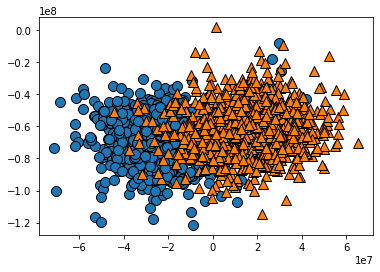

In [52]:
index = 1
train_index, test_index = index_splits_1_2_0_both_r[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

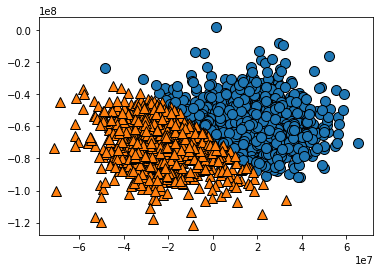

In [53]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_r[index][:])

In [54]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_2_0_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7695098302071678, 0.774489343013589, 0.7744916718755466, 0.7679614392595617, 0.7752465814146425, 0.7646741294955602, 0.7794078344590801, 0.7786079885835863, 0.7811107289965743, 0.7761043135100085]
Folkes test array: [0.7956975324939254, 0.7583299879566439, 0.8027227499393048, 0.794487436233514, 0.7731850155332654, 0.771630552571944, 0.8191413606082455, 0.7718838241226301, 0.7497098103765762, 0.7720929374651555]
Assignment fidelity train array: [0.9336111111111112, 0.9352777777777778, 0.9352777777777778, 0.9330555555555555, 0.9355555555555556, 0.9319444444444445, 0.9369444444444445, 0.9366666666666666, 0.9375, 0.9358333333333333]
Assignment fidelity test array: [0.9425, 0.9299999999999999, 0.945, 0.9425, 0.935, 0.935, 0.95, 0.935, 0.9275, 0.935]


In [55]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.774 (±0.0050) with 10 splits
Train score 0.781 (±0.0203) with 10 splits


In [56]:
report_cv_score(assignment_train, assignment_test)

Test score 0.935 (±0.0017) with 10 splits
Train score 0.938 (±0.0067) with 10 splits


In [57]:
qkmeans_1_2_0_both_r_2 = qkmeans_0_both_r
y_pred_1_2_0_both_train_r_2 = y_pred_0_both_train_r
y_pred_1_2_0_both_test_r_2 = y_pred_0_both_test_r
index_splits_1_2_0_both_r_2 = index_splits_1_2_0_both_r
%store index_splits_1_2_0_both_r_2
%store qkmeans_1_2_0_both_r_2
%store y_pred_1_2_0_both_train_r_2
%store y_pred_1_2_0_both_test_r_2

Stored 'index_splits_1_2_0_both_r_2' (list)
Stored 'qkmeans_1_2_0_both_r_2' (list)
Stored 'y_pred_1_2_0_both_train_r_2' (list)
Stored 'y_pred_1_2_0_both_test_r_2' (list)


In [58]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_p = []
y_pred_1_both_train_p = []
y_pred_1_both_test_p = []

index_splits_1_2_1_both_p = []
for train_index, test_index in split_1_both:
    index_splits_1_2_1_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-22 08:27:55,226: Credentials are already in use. The existing account in the session will be replaced.


In [59]:
for i in range(len(index_splits_1_2_1_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_2_1_both_p[i]
    qkmeans_1_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_p[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_p.append(qkmeans_1_both_p[-1].labels_)
    y_pred_1_both_test_p.append(qkmeans_1_both_p[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0    -1.163718  0.116031
1    -0.669999 -0.337285
2    -1.227728 -0.532884
3     1.131137  0.115295
4     0.961509  0.091858
...        ...       ...
1795  1.135533  2.763318
1796  1.332287  0.658626
1797 -1.371655  1.107276
1798 -1.088122 -0.594454
1799  0.772952 -1.382451

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-4.17299017e-001  1.25996768e+000]
 [ 7.90505033e-323  4.49599738e-322]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.41729902  1.25996768]
 [ 0.85018883 -0.64601076]]
Iteration 0
Old centroids are [[-0.41729902  1.25996768]
 [ 0.85018883 -0.64601076]]
New centroids are           0         1
0 -0.635233  0.451248
1  0.602234 -0.427807
Centers are [0 0 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.635233  0.451248
1  0.602234 -0.427807
New centroids are           0         1
0 -0.815700  0.194431
1  0.903574 -0.215376
Centers are [0 0 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.815700  0.194431
1  0.903574 -0.215376
New centroids are           0         1
0 -0.915456  0.031312
1  0.982955 -0.033620
Centers are [0 0 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.915456  0.031312
1  0.982955 -0.033620
New centroids are           0         1
0 -0.937407 -0.061101
1  0.977840  0.063736
Centers are [0 0 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.937407 -0.061101
1  0.977840 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:              0         1
0    -1.226031  0.057919
1     0.759320 -0.404865
2    -0.770414  0.071790
3    -1.457321 -0.349563
4     1.263032  0.693448
...        ...       ...
1795  0.339895  0.971017
1796 -0.910637  0.336330
1797  1.175243  0.857047
1798 -1.074605 -1.074342
1799 -1.043700 -0.012972

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.04718196  0.48143674]
 [ 0.96319845  0.13324722]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.04718196  0.48143674]
 [ 0.69927977 -0.5617873 ]]
Iteration 0
Old centroids are [[-1.04718196  0.48143674]
 [ 0.69927977 -0.5617873 ]]
New centroids are           0         1
0 -0.830724  0.144789
1  0.947282 -0.165105
Centers are [0 1 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.830724  0.144789
1  0.947282 -0.165105
New centroids are           0         1
0 -0.916340 -0.000672
1  0.990495  0.000726
Centers are [0 1 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.916340 -0.000672
1  0.990495  0.000726
New centroids are           0         1
0 -0.934155 -0.098177
1  0.983153  0.103326
Centers are [0 1 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.934155 -0.098177
1  0.983153  0.103326
New centroids are           0         1
0 -0.940400 -0.132800
1  0.972278  0.137302
Centers are [0 1 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.940400 -0.132800
1  0.972278 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.7758736   0.36521334]
 [-0.76393137  0.74699303]]
Iteration 0
Old centroids are [[ 0.7758736   0.36521334]
 [-0.76393137  0.74699303]]
New centroids are           0         1
0  0.982113 -0.008797
1 -0.920797  0.008248
Centers are [1 0 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.982113 -0.008797
1 -0.920797  0.008248
New centroids are           0         1
0  0.973433  0.099316
1 -0.943612 -0.096273
Centers are [1 0 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.973433  0.099316
1 -0.943612 -0.096273
New centroids are           0         1
0  0.963296  0.133022
1 -0.950537 -0.131260
Centers are [1 0 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.963296  0.133022
1 -0.950537 -0.131260
New centroids are           0         1
0  0.959424  0.141781
1 -0.953049 -0.140839
Centers are [1 0 0 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.959424  0.141781
1 -0.953049 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:              0         1
0     1.118744 -0.520558
1    -1.030753 -0.565874
2    -1.093671  1.179762
3    -0.878688 -0.135087
4     1.662221  0.328680
...        ...       ...
1795  0.618265 -0.188760
1796  0.964067 -0.086118
1797  1.160220  1.131255
1798 -0.875308 -0.309392
1799  1.054613 -0.903581

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.50803069 -0.74381321]
 [ 0.95483771  0.14172147]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.50803069 -0.74381321]
 [ 1.1318598  -0.36500075]]
Iteration 0
Old centroids are [[-0.50803069 -0.74381321]
 [ 1.1318598  -0.36500075]]
New centroids are           0         1
0 -0.947721 -0.162201
1  0.954061  0.163285
Centers are [1 0 0 ... 1 0 1]
Iteration 1
Old centroids are           0         1
0 -0.947721 -0.162201
1  0.954061  0.163285
New centroids are           0         1
0 -0.945078 -0.145007
1  0.966315  0.148265
Centers are [1 0 0 ... 1 0 1]
Iteration 2
Old centroids are           0         1
0 -0.945078 -0.145007
1  0.966315  0.148265
New centroids are           0         1
0 -0.944190 -0.143689
1  0.967556  0.147244
Centers are [1 0 0 ... 1 0 1]
Iteration 3
Old centroids are           0         1
0 -0.944190 -0.143689
1  0.967556  0.147244
New centroids are           0         1
0 -0.943568 -0.141039
1  0.969070  0.144851
Centers are [1 0 0 ... 1 0 1]
Iteration 4
Old centroids are           0         1
0 -0.943568 -0.141039
1  0.969070 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.44598135 -0.2343121 ]
 [ 1.09109532 -0.12251329]]
Iteration 0
Old centroids are [[-1.44598135 -0.2343121 ]
 [ 1.09109532 -0.12251329]]
New centroids are           0         1
0 -0.954840 -0.108093
1  0.959094  0.108575
Centers are [0 1 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0 -0.954840 -0.108093
1  0.959094  0.108575
New centroids are           0         1
0 -0.962016 -0.148961
1  0.949274  0.146988
Centers are [0 1 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0 -0.962016 -0.148961
1  0.949274  0.146988
New centroids are           0         1
0 -0.962997 -0.150141
1  0.948133  0.147823
Centers are [0 1 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0 -0.962997 -0.150141
1  0.948133  0.147823
New centroids are           0         1
0 -0.962997 -0.150141
1  0.948133  0.147823
Centers are [0 1 0 ... 0 1 0]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:              0         1
0    -0.789341  0.287885
1     0.634567 -0.403097
2    -0.737064 -0.174668
3    -1.286838 -0.736128
4     0.838100 -0.427207
...        ...       ...
1795 -1.084312  0.150680
1796  1.319222  2.792697
1797  1.131866  0.571471
1798 -0.990671 -0.502594
1799  1.124224 -0.354049

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.85391818 -0.32609877]
 [ 0.9481327   0.14782331]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.85391818 -0.32609877]
 [-0.85605918  0.17340616]]
Iteration 0
Old centroids are [[ 0.85391818 -0.32609877]
 [-0.85605918  0.17340616]]
New centroids are           0         1
0  1.001225 -0.040843
1 -0.895833  0.036544
Centers are [1 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  1.001225 -0.040843
1 -0.895833  0.036544
New centroids are           0         1
0  0.994576  0.057010
1 -0.922166 -0.052859
Centers are [1 0 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.994576  0.057010
1 -0.922166 -0.052859
New centroids are           0         1
0  0.980273  0.129424
1 -0.935570 -0.123522
Centers are [1 0 1 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.980273  0.129424
1 -0.935570 -0.123522
New centroids are           0         1
0  0.973499  0.145210
1 -0.939490 -0.140137
Centers are [1 0 1 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.973499  0.145210
1 -0.939490 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.79086608 -0.64148917]
 [ 0.81426153 -1.43812338]]
Iteration 0
Old centroids are [[-0.79086608 -0.64148917]
 [ 0.81426153 -1.43812338]]
New centroids are           0         1
0 -0.914541  0.011003
1  0.990752 -0.011919
Centers are [0 0 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.914541  0.011003
1  0.990752 -0.011919
New centroids are           0         1
0 -0.933781 -0.078369
1  0.984947  0.082663
Centers are [0 0 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.933781 -0.078369
1  0.984947  0.082663
New centroids are           0         1
0 -0.942270 -0.118940
1  0.974211  0.122972
Centers are [0 0 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.942270 -0.118940
1  0.974211  0.122972
New centroids are           0         1
0 -0.944519 -0.129597
1  0.970047  0.133100
Centers are [0 0 0 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.944519 -0.129597
1  0.970047 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.93400887  0.10843472]
 [ 1.20114171 -0.01948814]]
Iteration 0
Old centroids are [[-0.93400887  0.10843472]
 [ 1.20114171 -0.01948814]]
New centroids are           0         1
0 -0.931157 -0.033453
1  0.979998  0.035207
Centers are [1 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.931157 -0.033453
1  0.979998  0.035207
New centroids are           0         1
0 -0.944845 -0.097335
1  0.970381  0.099966
Centers are [1 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.944845 -0.097335
1  0.970381  0.099966
New centroids are           0         1
0 -0.951613 -0.134770
1  0.960110  0.135973
Centers are [1 1 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.951613 -0.134770
1  0.960110  0.135973
New centroids are           0         1
0 -0.950839 -0.135363
1  0.961463  0.136875
Centers are [1 1 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.950839 -0.135363
1  0.961463 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.02430875  0.42207751]
 [ 0.84232398 -0.02441035]]
Iteration 0
Old centroids are [[-1.02430875  0.42207751]
 [ 0.84232398 -0.02441035]]
New centroids are           0         1
0 -0.903040  0.014183
1  1.000323 -0.015711
Centers are [0 1 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.903040  0.014183
1  1.000323 -0.015711
New centroids are           0         1
0 -0.925084 -0.085187
1  0.993293  0.091468
Centers are [0 1 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.925084 -0.085187
1  0.993293  0.091468
New centroids are           0         1
0 -0.932476 -0.134005
1  0.983571  0.141347
Centers are [0 1 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.932476 -0.134005
1  0.983571  0.141347
New centroids are           0         1
0 -0.934767 -0.144126
1  0.979431  0.151013
Centers are [0 1 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.934767 -0.144126
1  0.979431 

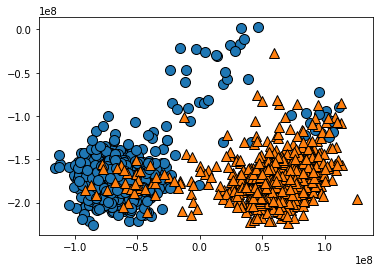

In [60]:
index = 1
train_index, test_index = index_splits_1_2_1_both_p[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

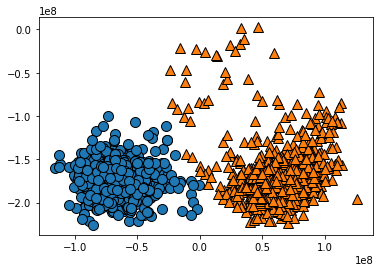

In [61]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_p[index][:])

In [62]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_2_1_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.8999079876692596, 0.9059142559713221, 0.8999050186884862, 0.898910149773727, 0.9079137540890111, 0.8969312203314841, 0.8979607779196986, 0.9009087071400081, 0.9018968548499776, 0.9019429103242781]
Folkes test array: [0.9132913557961009, 0.8686970552642195, 0.9134486069443012, 0.9232380877459315, 0.8513431803629352, 0.9333870180925702, 0.9232856472645063, 0.9041275608033101, 0.8956190957334406, 0.8872]
Assignment fidelity train array: [0.9736111111111111, 0.9752777777777778, 0.9736111111111111, 0.9733333333333334, 0.9758333333333333, 0.9727777777777777, 0.9730555555555556, 0.9738888888888889, 0.9741666666666666, 0.9741666666666666]
Assignment fidelity test array: [0.9775, 0.965, 0.9775, 0.98, 0.96, 0.9825, 0.98, 0.975, 0.9725, 0.97]


In [63]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.901 (±0.0033) with 10 splits
Train score 0.901 (±0.0247) with 10 splits


In [64]:
report_cv_score(assignment_train, assignment_test)

Test score 0.974 (±0.0009) with 10 splits
Train score 0.974 (±0.0068) with 10 splits


In [65]:
qkmeans_1_2_1_both_p_2 = qkmeans_1_both_p
y_pred_1_2_1_both_train_p_2 = y_pred_1_both_train_p
y_pred_1_2_1_both_test_p_2 = y_pred_1_both_test_p
index_splits_1_2_1_both_p_2 = index_splits_1_2_1_both_p
%store index_splits_1_2_1_both_p_2
%store qkmeans_1_2_1_both_p_2
%store y_pred_1_2_1_both_train_p_2
%store y_pred_1_2_1_both_test_p_2

Stored 'index_splits_1_2_1_both_p_2' (list)
Stored 'qkmeans_1_2_1_both_p_2' (list)
Stored 'y_pred_1_2_1_both_train_p_2' (list)
Stored 'y_pred_1_2_1_both_test_p_2' (list)


In [66]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_r = []
y_pred_1_both_train_r = []
y_pred_1_both_test_r = []

index_splits_1_2_1_both_r = []
for train_index, test_index in split_1_both:
    index_splits_1_2_1_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-22 11:06:02,041: Credentials are already in use. The existing account in the session will be replaced.


In [67]:
for i in range(len(index_splits_1_2_1_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_1_2_1_both_r[i]
    qkmeans_1_both_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_r[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_r.append(qkmeans_1_both_r[-1].labels_)
    y_pred_1_both_test_r.append(qkmeans_1_both_r[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0     1.328933  0.943397
1    -1.010969 -0.996878
2     1.363477 -0.175048
3     1.462077  0.599121
4    -1.019352 -0.238779
...        ...       ...
1795  0.905880 -1.110169
1796 -0.996081 -0.226237
1797 -1.149764  0.256861
1798  1.144949  0.784690
1799 -0.394829 -0.795000

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.993602 -0.973902
1  1.265247  0.405757
New centroids are           0         1
0 -0.878489 -0.228962
1  0.947470  0.246941
Centers are [1 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0 -0.878489 -0.228962
1  0.947470  0.246941
New centroids are           0         1
0 -0.954937 -0.149536
1  0.952817  0.149205
Centers are [1 0 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0 -0.954937 -0.149536
1  0.952817  0.149205
New centroids are           0         1
0 -0.952777 -0.139877
1  0.959150  0.140812
Centers are [1 0 1 ... 0 1 0]
Iteration 3
Old centroids ar

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:              0         1
0     1.580467  2.014531
1    -0.905881 -0.537879
2     0.802308 -0.127928
3    -0.954714 -0.857185
4     0.915202 -0.611689
...        ...       ...
1795  0.603517  5.969954
1796  1.055227 -0.563700
1797 -0.971138 -0.195395
1798 -0.391964  0.197219
1799 -0.598521  0.457590

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.781033  0.411976
1  0.156385  0.003036
New centroids are           0         1
0 -0.907390  0.018546
1  0.994009 -0.020317
Centers are [1 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.907390  0.018546
1  0.994009 -0.020317
New centroids are           0         1
0 -0.934658 -0.091781
1  0.983682  0.096595
Centers are [1 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.934658 -0.091781
1  0.983682  0.096595
New centroids are           0         1
0 -0.943722 -0.144243
1  0.971384  0.148471
Centers are [1 0 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.943722 -0.144243
1  0.971384  0.148471
New centroids are           0         1
0 -0.943604 -0.146382
1  0.971264  0.150673
Centers are [1 0 1 ... 0 0 0]
Split 2
Data is:              0         1
0    -0.637140 -0.442195
1     0.837480 -1.157082
2     1.012416 -1.032384
3     1.071904  0.199041
4    -0.997970 -0.981098
...  

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.079792  0.315301
1 -1.173612 -0.501483
New centroids are           0         1
0  0.011012  0.744400
1 -0.008849 -0.598205
Centers are [1 1 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.011012  0.744400
1 -0.008849 -0.598205
New centroids are           0         1
0  0.097579  0.762445
1 -0.076324 -0.596368
Centers are [1 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.097579  0.762445
1 -0.076324 -0.596368
New centroids are           0         1
0  0.258291  0.766113
1 -0.195736 -0.580570
Centers are [1 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.258291  0.766113
1 -0.195736 -0.580570
New centroids are           0         1
0  0.483399  0.732543
1 -0.354059 -0.536540
Centers are [1 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.483399  0.732543
1 -0.354059 -0.536540
New centroids are           0         1
0  0.741707  0.572199
1 -0.581457 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.880132 -0.307305
1  0.341297  0.972829
New centroids are           0         1
0 -0.709186 -0.360810
1  0.862901  0.439015
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.709186 -0.360810
1  0.862901  0.439015
New centroids are           0         1
0 -0.900858 -0.191864
1  0.962987  0.205095
Centers are [1 1 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.900858 -0.191864
1  0.962987  0.205095
New centroids are           0         1
0 -0.940498 -0.136465
1  0.968066  0.140465
Centers are [1 1 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.940498 -0.136465
1  0.968066  0.140465
New centroids are           0         1
0 -0.938954 -0.127844
1  0.972943  0.132472
Centers are [1 1 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.938954 -0.127844
1  0.972943  0.132472
New centroids are           0         1
0 -0.938889 -0.128121
1  0.972876  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:              0         1
0     1.048663 -0.589456
1    -0.876660 -0.118655
2     0.976500  0.295269
3     1.087115  1.506802
4     1.305558 -0.916598
...        ...       ...
1795  1.264709  0.874079
1796 -0.982547 -0.208724
1797  1.061990 -0.752931
1798 -0.796070  0.044636
1799 -0.796308 -1.362803

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.094634  0.205427
1 -1.082278  0.358653
New centroids are           0         1
0 -0.264937 -0.469552
1  0.365032  0.646953
Centers are [0 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.264937 -0.469552
1  0.365032  0.646953
New centroids are           0         1
0 -0.513669 -0.485671
1  0.662672  0.626553
Centers are [0 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.513669 -0.485671
1  0.662672  0.626553
New centroids are           0         1
0 -0.728510 -0.354310
1  0.864829  0.420608
Centers are [1 0 1 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.728510 -0.354310
1  0.864829  0.420608
New centroids are           0         1
0 -0.917427 -0.178359
1  0.959129  0.186466
Centers are [1 0 1 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.917427 -0.178359
1  0.959129  0.186466
New centroids are           0         1
0 -0.944837 -0.132083
1  0.966070  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:              0         1
0    -1.072263 -1.006711
1     0.769916 -1.746762
2     0.825830  0.092548
3     1.086626  0.386955
4    -0.913445 -0.869010
...        ...       ...
1795 -0.826566 -0.509715
1796  0.643753 -0.138452
1797 -1.150761  0.426097
1798  1.105004 -0.542257
1799  1.144953  0.396635

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.865332 -1.204988
1  0.997566 -0.020737
New centroids are           0         1
0 -0.920374 -0.194599
1  0.951573  0.201196
Centers are [0 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.920374 -0.194599
1  0.951573  0.201196
New centroids are           0         1
0 -0.956758 -0.144917
1  0.954634  0.144595
Centers are [0 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.956758 -0.144917
1  0.954634  0.144595
New centroids are           0         1
0 -0.955210 -0.141568
1  0.957335  0.141883
Centers are [0 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0 -0.955210 -0.141568
1  0.957335  0.141883
New centroids are           0         1
0 -0.956737 -0.145580
1  0.954613  0.145257
Centers are [0 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0 -0.956737 -0.145580
1  0.954613  0.145257
New centroids are           0         1
0 -0.956107 -0.142896
1  0.956107  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:              0         1
0    -0.937032 -0.054520
1     1.040671 -0.240555
2    -1.037600  0.072315
3    -0.895917  0.330087
4    -1.285137 -0.744454
...        ...       ...
1795  1.560175  3.019381
1796 -0.868699  0.318865
1797 -0.872198 -0.093690
1798 -1.319457  0.380852
1799 -1.066314 -0.332764

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.966707  0.015924
1  0.945672 -1.048333
New centroids are           0         1
0 -0.874005  0.073781
1  0.985580 -0.083200
Centers are [0 1 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.874005  0.073781
1  0.985580 -0.083200
New centroids are           0         1
0 -0.919999 -0.032924
1  0.994450  0.035588
Centers are [0 1 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.919999 -0.032924
1  0.994450  0.035588
New centroids are           0         1
0 -0.930787 -0.097657
1  0.988362  0.103697
Centers are [0 1 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.930787 -0.097657
1  0.988362  0.103697
New centroids are           0         1
0 -0.935479 -0.127948
1  0.980178  0.134062
Centers are [0 1 0 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.935479 -0.127948
1  0.980178  0.134062
New centroids are           0         1
0 -0.937053 -0.133054
1  0.977471  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.013631 -0.560095
1  0.151273  0.340161
New centroids are           0         1
0 -0.689000 -0.372600
1  0.865136  0.467851
Centers are [0 0 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.689000 -0.372600
1  0.865136  0.467851
New centroids are           0         1
0 -0.893690 -0.205362
1  0.972484  0.223468
Centers are [0 0 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.893690 -0.205362
1  0.972484  0.223468
New centroids are           0         1
0 -0.928095 -0.155047
1  0.981128  0.163907
Centers are [0 0 0 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0 -0.928095 -0.155047
1  0.981128  0.163907
New centroids are           0         1
0 -0.927247 -0.150221
1  0.984603  0.159513
Centers are [0 0 0 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0 -0.927247 -0.150221
1  0.984603  0.159513
New centroids are           0         1
0 -0.928296 -0.150068
1  0.983527  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:              0         1
0    -0.871349 -0.424334
1    -0.859144 -1.264643
2     1.420856  0.576396
3     0.941674 -1.194451
4    -0.637340 -0.475974
...        ...       ...
1795 -0.413784 -0.440171
1796 -0.959142  0.093280
1797 -0.887531 -0.199032
1798 -0.806764 -0.239726
1799  0.697583 -0.368755

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.561148  0.086819
1  1.192134 -1.216433
New centroids are           0         1
0 -0.864669  0.103145
1  0.968552 -0.115537
Centers are [0 0 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.864669  0.103145
1  0.968552 -0.115537
New centroids are           0         1
0 -0.924651 -0.002774
1  0.981846  0.002946
Centers are [0 0 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.924651 -0.002774
1  0.981846  0.002946
New centroids are           0         1
0 -0.945726 -0.088846
1  0.969130  0.091045
Centers are [0 0 1 ... 0 0 1]
Iteration 3
Old centroids ar

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:              0         1
0     1.167783 -0.967516
1     1.090777 -0.177585
2    -0.856350  0.212351
3     0.893482  0.626889
4    -1.340225 -0.069597
...        ...       ...
1795 -0.342381 -0.456569
1796  0.863552 -0.621317
1797  0.802977 -1.397269
1798 -0.722955 -0.264374
1799 -1.324745 -0.224738

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.896511  0.295632
1 -0.675806  0.383555
New centroids are           0        1
0  0.985756  0.01093
1 -0.926271 -0.01027
Centers are [0 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0        1
0  0.985756  0.01093
1 -0.926271 -0.01027
New centroids are           0         1
0  0.970715  0.110277
1 -0.947273 -0.107614
Centers are [0 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.970715  0.110277
1 -0.947273 -0.107614
New centroids are           0         1
0  0.960191  0.138628
1 -0.953811 -0.137707
Centers are [0 0 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.960191  0.138628
1 -0.953811 -0.137707
New centroids are           0         1
0  0.960107  0.137530
1 -0.953728 -0.136616
Centers are [0 0 1 ... 0 1 1]


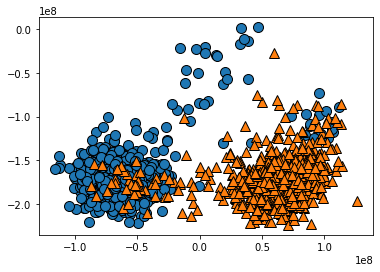

In [68]:
index = 2
train_index, test_index = index_splits_1_2_1_both_r[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

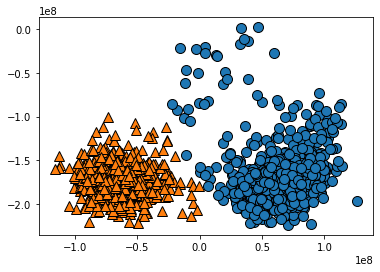

In [69]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_r[index][:])

In [70]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_2_1_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.8989110243490062, 0.9009238888027281, 0.9009077260416758, 0.8999339587399509, 0.9029070554429257, 0.898910149773727, 0.9059319262677238, 0.8999910476816633, 0.8989110243490062, 0.8979196600034302]
Folkes test array: [0.9226196473551638, 0.9043225114110948, 0.9131862038815763, 0.9320595403935706, 0.8772780954928204, 0.9136941531649934, 0.8608676980156321, 0.9160864345019554, 0.9230906265725068, 0.9413318695791907]
Assignment fidelity train array: [0.9733333333333334, 0.9738888888888889, 0.9738888888888889, 0.9736111111111111, 0.9744444444444444, 0.9733333333333334, 0.9752777777777778, 0.9736111111111111, 0.9733333333333334, 0.9730555555555556]
Assignment fidelity test array: [0.98, 0.975, 0.9775, 0.9825, 0.9675, 0.9775, 0.9625, 0.9775, 0.98, 0.985]


In [71]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.901 (±0.0022) with 10 splits
Train score 0.910 (±0.0232) with 10 splits


In [72]:
report_cv_score(assignment_train, assignment_test)

Test score 0.974 (±0.0006) with 10 splits
Train score 0.976 (±0.0064) with 10 splits


In [74]:
qkmeans_1_2_1_both_r_2 = qkmeans_1_both_r
y_pred_1_2_1_both_train_r_2 = y_pred_1_both_train_r
y_pred_1_2_1_both_test_r_2 = y_pred_1_both_test_r
index_splits_1_2_1_both_r_2 = index_splits_1_2_1_both_r
%store index_splits_1_2_1_both_r_2
%store qkmeans_1_2_1_both_r_2
%store y_pred_1_2_1_both_train_r_2
%store y_pred_1_2_1_both_test_r_2

Stored 'index_splits_1_2_1_both_r_2' (list)
Stored 'qkmeans_1_2_1_both_r_2' (list)
Stored 'y_pred_1_2_1_both_train_r_2' (list)
Stored 'y_pred_1_2_1_both_test_r_2' (list)


## Quantum cross validation correlation analysis

Here we sort assignment fidelities from all four trained QML models to observe the differences between scores obtained from qubits trained with single schedules (|00> and |01> with the 0 qubit as the least significant bit) and both schedules (|00>, |01>, |10> and |11>)

### Folkes Mallows train scores

|        | Q1            | Q2            |
|--------|---------------|---------------|
| Single | 0.771 ±0.0360 | 0.901 ±0.0426 |
| Both   | 0.781 ±0.0203 | 0.910 ±0.0232 |

### Folkes Mallows test scores

|        | Q1            | Q2            |
|--------|---------------|---------------|
| Single | 0.757 ±0.0106 | 0.907 ±0.0047 |
| Both   | 0.774 ±0.0050 | 0.901 ±0.0022 |

### Assignment fidelity train scores

|        | Q1            | Q2            |
|--------|---------------|---------------|
| Single | 0.935 ±0.0120 | 0.973 ±0.0116 |
| Both   | 0.938 ±0.0067 | 0.976 ±0.0064 |

### Assignment fidelity test scores

|        | Q1            | Q2            |
|--------|---------------|---------------|
| Single | 0.929 ±0.0037 | 0.976 ±0.0012 |
| Both   | 0.935 ±0.0017 | 0.974 ±0.0006 |

In [75]:
import pickle

data = {}
data['index_splits_1_2_0_single_p_2'] = index_splits_1_2_0_single_p_2
data['qkmeans_1_2_0_single_p_2'] = qkmeans_1_2_0_single_p_2
data['y_pred_1_2_0_single_train_p_2'] = y_pred_1_2_0_single_train_p_2
data['y_pred_1_2_0_single_test_p_2'] = y_pred_1_2_0_single_test_p_2

with open('data_1_2_0_single_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [76]:
data = {}
data['index_splits_1_2_1_single_p_2'] = index_splits_1_2_1_single_p_2
data['qkmeans_1_2_1_single_p_2'] = qkmeans_1_2_1_single_p_2
data['y_pred_1_2_1_single_train_p_2'] = y_pred_1_2_1_single_train_p_2
data['y_pred_1_2_1_single_test_p_2'] = y_pred_1_2_1_single_test_p_2

with open('data_1_2_1_single_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [77]:
data = {}
data['index_splits_1_2_0_both_p_2'] = index_splits_1_2_0_both_p_2
data['qkmeans_1_2_0_both_p_2'] = qkmeans_1_2_0_both_p_2
data['y_pred_1_2_0_both_train_p_2'] = y_pred_1_2_0_both_train_p_2
data['y_pred_1_2_0_both_test_p_2'] = y_pred_1_2_0_both_test_p_2

with open('data_1_2_0_both_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [78]:
data = {}
data['index_splits_1_2_1_both_p_2'] = index_splits_1_2_1_both_p_2
data['qkmeans_1_2_1_both_p_2'] = qkmeans_1_2_1_both_p_2
data['y_pred_1_2_1_both_train_p_2'] = y_pred_1_2_1_both_train_p_2
data['y_pred_1_2_1_both_test_p_2'] = y_pred_1_2_1_both_test_p_2

with open('data_1_2_1_both_p_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [79]:
data = {}
data['index_splits_1_2_0_single_r_2'] = index_splits_1_2_0_single_r_2
data['qkmeans_1_2_0_single_r_2'] = qkmeans_1_2_0_single_r_2
data['y_pred_1_2_0_single_train_r_2'] = y_pred_1_2_0_single_train_r_2
data['y_pred_1_2_0_single_test_r_2'] = y_pred_1_2_0_single_test_r_2

with open('data_1_2_0_single_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [80]:
data = {}
data['index_splits_1_2_1_single_r_2'] = index_splits_1_2_1_single_r_2
data['qkmeans_1_2_1_single_r_2'] = qkmeans_1_2_1_single_r_2
data['y_pred_1_2_1_single_train_r_2'] = y_pred_1_2_1_single_train_r_2
data['y_pred_1_2_1_single_test_r_2'] = y_pred_1_2_1_single_test_r_2

with open('data_1_2_1_single_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [81]:
data = {}
data['index_splits_1_2_0_both_r_2'] = index_splits_1_2_0_both_r_2
data['qkmeans_1_2_0_both_r_2'] = qkmeans_1_2_0_both_r_2
data['y_pred_1_2_0_both_train_r_2'] = y_pred_1_2_0_both_train_r_2
data['y_pred_1_2_0_both_test_r_2'] = y_pred_1_2_0_both_test_r_2

with open('data_1_2_0_both_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [82]:
data = {}
data['index_splits_1_2_1_both_r_2'] = index_splits_1_2_1_both_r_2
data['qkmeans_1_2_1_both_r_2'] = qkmeans_1_2_1_both_r_2
data['y_pred_1_2_1_both_train_r_2'] = y_pred_1_2_1_both_train_r_2
data['y_pred_1_2_1_both_test_r_2'] = y_pred_1_2_1_both_test_r_2

with open('data_1_2_1_both_r_2.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# Qubits 2 and 3

In [6]:
data_00_0 = pd.read_csv('data/dataset_bogota_2_3_00_0.csv')
data_00_1 = pd.read_csv('data/dataset_bogota_2_3_00_1.csv')
data_01_0 = pd.read_csv('data/dataset_bogota_2_3_01_0.csv')
data_01_1 = pd.read_csv('data/dataset_bogota_2_3_01_1.csv')
data_10_0 = pd.read_csv('data/dataset_bogota_2_3_10_0.csv')
data_10_1 = pd.read_csv('data/dataset_bogota_2_3_10_1.csv')
data_11_0 = pd.read_csv('data/dataset_bogota_2_3_11_0.csv')
data_11_1 = pd.read_csv('data/dataset_bogota_2_3_11_1.csv')

In [84]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_p = []
y_pred_0_single_train_p = []
y_pred_0_single_test_p = []

index_splits_0_single_p = []
for train_index, test_index in split_0_single:
    index_splits_0_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-22 14:24:34,700: Credentials are already in use. The existing account in the session will be replaced.


In [85]:
for i in range(len(index_splits_0_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_p[i]
    qkmeans_0_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_p[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0   -1.044189  0.473174
1   -0.853886  0.640778
2    1.205898 -0.946496
3    1.592764  0.187626
4   -0.774830 -0.697237
..        ...       ...
895  0.984714  0.645050
896  0.730241 -1.389738
897 -1.186311 -0.074541
898  1.320342  0.511000
899 -1.029778  0.246878

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[9.17641572e-001 4.37452555e-001]
 [4.59481051e-322 2.47032823e-323]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.91764157  0.43745255]
 [-1.34415963  0.08896454]]
Iteration 0
Old centroids are [[ 0.91764157  0.43745255]
 [-1.34415963  0.08896454]]
New centroids are           0         1
0  0.969071  0.224885
1 -0.947772 -0.219942
Centers are [1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:             0         1
0    0.672635 -1.255534
1    1.128115  0.621107
2   -0.791902 -0.085253
3    1.179953 -0.169107
4   -0.973354 -0.171852
..        ...       ...
895 -1.128995  0.968807
896  1.182660  1.159945
897  1.034340 -0.091106
898 -0.910682  0.327717
899 -1.002689 -0.474532

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.11312753  0.03472153]
 [-0.94761069 -0.22077682]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.11312753  0.03472153]
 [ 1.38882978  0.2034947 ]]
Iteration 0
Old centroids are [[-1.11312753  0.03472153]
 [ 1.38882978  0.2034947 ]]
New centroids are           0         1
0 -0.943220 -0.214691
1  0.977363  0.222463
Centers are [1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:             0         1
0    1.275241  0.040345
1   -0.846482  0.898602
2    0.961863 -1.037496
3   -0.923912  0.134197
4    1.122934  1.137557
..        ...       ...
895  1.286989  0.214727
896 -0.839726 -0.416583
897  0.830989 -1.345531
898  0.938965 -0.433858
899  0.898417 -0.018116

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.78625548 -1.54251731]
 [ 0.97450818  0.24392928]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.78625548 -1.54251731]
 [ 1.25844687  0.44026679]]
Iteration 0
Old centroids are [[-0.78625548 -1.54251731]
 [ 1.25844687  0.44026679]]
New centroids are           0         1
0 -0.765361 -0.388097
1  0.914700  0.463824
Centers are [1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 

Old centroids are           0         1
0 -0.957941 -0.217516
1  0.957941  0.217516
New centroids are          0         1
0 -0.95883 -0.213677
1  0.95883  0.213677
Centers are [1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0   -0.357415  0.381999
1    1.048264  0.306597
2    1.056051  0.107675
3   -1.039188 -1.146908
4   -1.012700 -0.496229
..        ...       ...
895  0.634996 -0.624419
896 -1.316586  0.078363
897 -1.117458 -0.729148
898  0.475442  0.380377
899 -0.213411 -0.469156

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.76973733  0.05765468]
 [ 0.9588304   0.21367734]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.76973733  0.05765468]
 [ 1.01604181 -0.8401809 ]]
Iteration 0
Old centroids are [[-0.76973733  0.05765468]
 [ 1.01604181 -0.8401809 ]]
New centroids are           0         1
0 -0.915129 -0.083593
1  0.978241  0.089358
Centers are [0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0   -0.729868 -0.456148
1   -1.100104 -1.457571
2   -0.871366 -0.555036
3    0.617741 -0.152065
4   -1.192773  1.054043
..        ...       ...
895  1.173143  0.790560
896 -1.318897 -0.445383
897 -1.320912  0.878305
898 -0.905821  0.175197
899 -0.838261 -1.662930

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.88604424  0.23192836]
 [ 0.96597907  0.24324521]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.88604424  0.23192836]
 [ 0.48545476 -0.82123299]]
Iteration 0
Old centroids are [[-0.88604424  0.23192836]
 [ 0.48545476 -0.82123299]]
New centroids are           0         1
0 -0.757940  0.198835
1  0.806615 -0.211605
Centers are [0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -1.322615 -0.718029
1    0.708817  1.369332
2    1.082230  0.109258
3    0.864455  0.255838
4   -1.035364  0.375053
..        ...       ...
895 -1.172537 -0.393248
896 -0.886332 -0.227835
897 -0.693453 -0.660550
898 -0.941086  0.538288
899  1.217384  0.553419

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.30856691  0.19702195]
 [ 0.96920583  0.24013488]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.30856691  0.19702195]
 [ 1.4596143   0.22135137]]
Iteration 0
Old centroids are [[-1.30856691  0.19702195]
 [ 1.4596143   0.22135137]]
New centroids are           0         1
0 -0.947371 -0.178482
1  0.972976  0.183306
Centers are [0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 

Old centroids are           0         1
0 -0.944076 -0.236343
1  0.969591  0.242731
New centroids are           0         1
0 -0.944076 -0.236343
1  0.969591  0.242731
Centers are [0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0    1.203200  0.964835
1    1.052406  3.840330
2    0.695628 -0.129539
3    1.009800  0.228032
4   -1.017979  0.209201
..        ...       ...
895  0.973761 -0.063151
896 -0.966593  0.468312
897 -1.234839 -0.458672
898 -0.894468 -0.174741
899 -1.035420 -1.089965

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.95840776 0.55704893]
 [0.96959136 0.24273105]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.95840776  0.55704893]
 [-1.01226093 -0.82048312]]
Iteration 0
Old centroids are [[ 0.95840776  0.55704893]
 [-1.01226093 -0.82048312]]
New centroids are           0         1
0  0.960194  0.388622
1 -0.832699 -0.337021
Centers are [0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0    0.724500 -0.839123
1    1.253411  0.083658
2    0.866126 -0.337940
3    0.940343 -0.098395
4    0.735204 -0.190590
..        ...       ...
895 -0.643892 -1.020968
896 -0.847253  0.994493
897  1.259123 -0.962050
898  0.857020  0.078564
899 -1.116490 -0.492327

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.10916233  0.45846928]
 [-0.95561561 -0.23756451]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.10916233  0.45846928]
 [ 0.3696174   0.78722105]]
Iteration 0
Old centroids are [[-1.10916233  0.45846928]
 [ 0.3696174   0.78722105]]
New centroids are           0         1
0 -0.932752 -0.238775
1  0.966517  0.247419
Centers are [1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 

Old centroids are           0         1
0 -0.953102 -0.216855
1  0.961611  0.218791
New centroids are           0         1
0 -0.952925 -0.217177
1  0.961434  0.219116
Centers are [1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0   -1.026425  0.883939
1   -0.892932 -1.228524
2   -0.836583 -0.779466
3   -0.837427  0.705790
4    0.663726 -0.431535
..        ...       ...
895  1.168803  0.092326
896 -0.706950 -0.556524
897  0.782317 -0.757748
898 -0.924195  0.121746
899 -0.873789  0.581312

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.95149884 -0.3325407 ]
 [ 0.96143357  0.21911576]]
Cluster center 1
Centers are: [[-0.95149884 -0.3325407 ]
 [ 0.84423473 -0.07231691]]
Iteration 0
Old centroids are [[-0.95149884 -0.3325407 ]
 [ 0.84423473 -0.07231691]]
New centroids are           0         1
0 -0.940546 -0.218158
1  0.978936  0.227063
Centers are [0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 1 0 0 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:             0         1
0   -0.915597 -1.251695
1   -1.080735 -0.947790
2   -0.790845 -0.186833
3    0.528768 -1.295874
4   -0.195983  0.764888
..        ...       ...
895  0.566389  0.593570
896 -1.070789 -0.057695
897  0.795256  0.895482
898  1.536599  2.195434
899 -1.068889 -0.884661

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.71895956 -1.39342879]
 [ 0.97671356  0.24220963]]
Cluster center 1
Centers are: [[ 0.71895956 -1.39342879]
 [-0.72199219 -0.37782223]]
Iteration 0
Old centroids are [[ 0.71895956 -1.39342879]
 [-0.72199219 -0.37782223]]
New centroids are           0         1
0  0.966791  0.111542
1 -0.945542 -0.109090
Centers are [1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 0 0 

Old centroids are           0         1
0  0.957082  0.234591
1 -0.957082 -0.234591
New centroids are           0         1
0  0.955853  0.239551
1 -0.955853 -0.239551
Centers are [1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


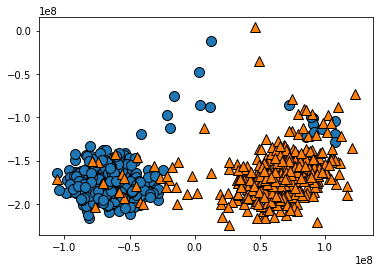

In [86]:
index = 6
train_index, test_index = index_splits_0_single_p[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

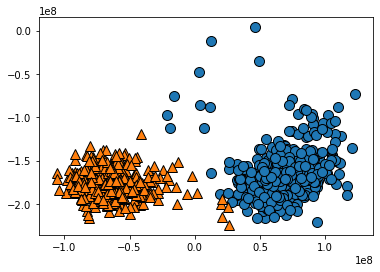

In [87]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_p[index][:])

In [88]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9047943088273503, 0.9027984722834616, 0.9148868888049879, 0.9047980781229129, 0.8988173649409248, 0.9027984722834616, 0.8948655340621037, 0.9148809847059224, 0.9048075177798851, 0.902801844238286]
Folkes test array: [0.9216968808287254, 0.9224630969982165, 0.8853192354615698, 0.8672784496775489, 0.9600827407663025, 0.8852772681865104, 0.9801437541224691, 0.8498572011423908, 0.8856957797264322, 0.92217752809045]
Assignment fidelity train array: [0.975, 0.9744444444444444, 0.9777777777777777, 0.975, 0.9733333333333334, 0.9744444444444444, 0.9722222222222222, 0.9777777777777777, 0.975, 0.9744444444444444]
Assignment fidelity test array: [0.98, 0.98, 0.97, 0.965, 0.99, 0.97, 0.995, 0.96, 0.97, 0.98]


In [89]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.905 (±0.0059) with 10 splits
Train score 0.908 (±0.0388) with 10 splits


In [90]:
report_cv_score(assignment_train, assignment_test)

Test score 0.975 (±0.0016) with 10 splits
Train score 0.976 (±0.0104) with 10 splits


In [91]:
index_splits_2_3_0_single_p_2 = index_splits_0_single_p
qkmeans_2_3_0_single_p_2 = qkmeans_0_single_p
y_pred_2_3_0_single_train_p_2 = y_pred_0_single_train_p
y_pred_2_3_0_single_test_p_2 = y_pred_0_single_test_p
%store index_splits_2_3_0_single_p_2
%store qkmeans_2_3_0_single_p_2
%store y_pred_2_3_0_single_train_p_2
%store y_pred_2_3_0_single_test_p_2

Stored 'index_splits_2_3_0_single_p_2' (list)
Stored 'qkmeans_2_3_0_single_p_2' (list)
Stored 'y_pred_2_3_0_single_train_p_2' (list)
Stored 'y_pred_2_3_0_single_test_p_2' (list)


In [92]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_r = []
y_pred_0_single_train_r = []
y_pred_0_single_test_r = []

index_splits_0_single_r = []
for train_index, test_index in split_0_single:
    index_splits_0_single_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-23 00:19:23,978: Credentials are already in use. The existing account in the session will be replaced.


In [93]:
for i in range(len(index_splits_0_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_r[i]
    qkmeans_0_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_r[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0    1.557069  1.748929
1   -1.007212 -0.565636
2   -1.039359  0.472803
3    1.288426 -0.029807
4   -0.602354 -0.991042
..        ...       ...
895 -1.020900  0.261500
896 -0.987401  0.260984
897  0.920477  0.033674
898 -0.923256 -0.084624
899  1.299913  0.842149

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.250196 -0.759990
1 -1.136132 -0.483998
New centroids are           0         1
0  0.983660  0.143054
1 -0.936717 -0.136227
Centers are [0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:             0         1
0    0.914217  0.505430
1   -0.885643 -0.826404
2    0.816107 -0.082855
3   -1.047936 -0.315200
4    1.251195  0.477540
..        ...       ...
895  0.753021 -0.978099
896  1.208476  0.947609
897  0.823867 -1.171882
898 -1.130169  0.285256
899 -1.220098 -1.395688

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.933369 -0.582931
1  0.816107 -0.082855
New centroids are           0         1
0 -0.960795 -0.237868
1  0.956534  0.236813
Centers are [1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1

Old centroids are           0         1
0 -0.953662 -0.238901
1  0.962177  0.241034
New centroids are           0         1
0 -0.956362 -0.237594
1  0.960622  0.238653
Centers are [1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1

Old centroids are           0         1
0 -0.956362 -0.237594
1  0.960622  0.238653
New centroids are          0        1
0 -0.95804 -0.23974
1  0.95804  0.23974
Centers are [1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:             0         1
0   -1.015693 -0.508948
1   -0.841855  0.976324
2   -1.199496 -0.446322
3   -0.967783 -0.433127
4    0.475004  0.384659
..        ...       ...
895 -1.099191 -0.032263
896  1.291151  1.348462
897 -1.111000 -0.480967
898 -0.844490 -1.344786
899  0.504247 -0.400233

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.730681 -0.812586
1 -1.237899 -0.218446
New centroids are           0         1
0  0.977634  0.087606
1 -0.914561 -0.081954
Centers are [1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0   -0.672091 -0.689869
1    0.801237 -1.554014
2   -0.722453 -0.791229
3    1.024847  0.561982
4   -0.742369 -0.545909
..        ...       ...
895  0.925993  0.438816
896  1.218878  0.181196
897 -0.866386  0.166927
898 -0.630224 -0.378579
899 -0.821060 -0.305568

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.026736 -1.123347
1 -0.825828 -0.205445
New centroids are           0         1
0  0.412747 -0.479763
1 -0.443180  0.515138
Centers are [0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1

Old centroids are           0         1
0  0.977567  0.228367
1 -0.939231 -0.219411
New centroids are           0         1
0  0.976726  0.246200
1 -0.934260 -0.235496
Centers are [1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1

Old centroids are           0         1
0  0.979004  0.246539
1 -0.932284 -0.234774
New centroids are           0         1
0  0.975013  0.243807
1 -0.936777 -0.234246
Centers are [1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1

Old centroids are           0         1
0  0.975424  0.250851
1 -0.933014 -0.239944
New centroids are           0         1
0  0.973160  0.250503
1 -0.934997 -0.240679
Centers are [1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0    0.930217  0.034853
1    0.913181  0.108450
2   -0.913200 -0.568136
3    1.142285  0.627646
4    0.787589 -1.966272
..        ...       ...
895  0.992118  1.095242
896 -1.068388  0.731655
897  0.742391 -1.370574
898 -1.262228 -1.004762
899 -1.068245 -0.930129

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -0.980810 -0.888802
1 -0.750989  0.636407
New centroids are           0         1
0 -0.139059 -0.610272
1  0.175396  0.769741
Centers are [0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 

Old centroids are           0         1
0 -0.801284 -0.353118
1  0.944856  0.416388
New centroids are           0         1
0 -0.920539 -0.251103
1  0.975308  0.266042
Centers are [1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1

Old centroids are           0         1
0 -0.941941 -0.221735
1  0.976039  0.229761
New centroids are           0         1
0 -0.946362 -0.220163
1  0.971939  0.226113
Centers are [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1

Old centroids are           0         1
0 -0.941941 -0.221735
1  0.976039  0.229761
New centroids are           0         1
0 -0.942695 -0.226836
1  0.972487  0.234004
Centers are [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -1.328572 -0.528663
1    1.068414  0.457485
2   -0.852784  1.029934
3   -0.726077 -0.436800
4    1.389931 -0.172982
..        ...       ...
895  0.974257  0.201267
896  0.690572 -0.838106
897  1.033673  0.179853
898  1.425600  0.360025
899 -0.866326 -0.563755

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.809305  4.016325
1 -1.339581 -0.284907
New centroids are           0         1
0  0.948977  0.436961
1 -0.779929 -0.359122
Centers are [1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1

Old centroids are           0         1
0  0.988643  0.237966
1 -0.924860 -0.222613
New centroids are           0         1
0  0.991109  0.237127
1 -0.923050 -0.220843
Centers are [1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0   -0.946674 -1.225128
1   -0.852162 -0.122731
2   -1.066142  1.324169
3    1.185431  0.899782
4   -0.676235 -0.380254
..        ...       ...
895  1.095133 -0.427955
896 -0.676559 -0.982642
897 -0.838120  0.389645
898  1.030469 -0.628150
899 -1.054448 -0.391759

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.296601 -0.996844
1  1.028308 -1.577009
New centroids are           0         1
0 -0.964971 -0.111287
1  0.939577  0.108358
Centers are [0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0   -0.194095  0.727899
1    0.786775 -0.314505
2   -0.860476  0.625899
3   -0.918726  0.113908
4    0.958905  0.783250
..        ...       ...
895 -1.298048 -0.313385
896 -0.697501 -0.720708
897  1.283987  0.019043
898 -0.796876 -0.016249
899 -0.719132  0.615412

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.050062 -1.162505
1 -0.908526 -1.297064
New centroids are           0         1
0 -0.569825  0.172672
1  0.741793 -0.224783
Centers are [0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1
 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0   -1.121682  0.306950
1   -0.809434 -0.995868
2    0.371073  0.404770
3    1.412765  1.291445
4   -1.068880 -0.063950
..        ...       ...
895 -1.090999 -0.457816
896  0.919351  0.039956
897  0.736885  1.432597
898 -1.079736  0.268543
899  0.988354  0.451450

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are          0         1
0 -0.68119  0.458816
1  0.69672  0.322304
New centroids are           0         1
0 -0.949246 -0.153243
1  0.970577  0.156687
Centers are [0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1
 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:             0         1
0    0.893152  0.266961
1    0.182211  6.715595
2   -1.113595  0.474265
3   -0.841480 -1.335410
4    0.948992 -1.086965
..        ...       ...
895  0.902501  0.120751
896 -1.167255  0.466239
897  1.025946 -0.561674
898 -0.880172  1.191637
899 -0.978421 -0.129870

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.285487 -0.154288
1  1.379914  0.472339
New centroids are           0         1
0 -0.951701 -0.221316
1  0.964475  0.224287
Centers are [1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


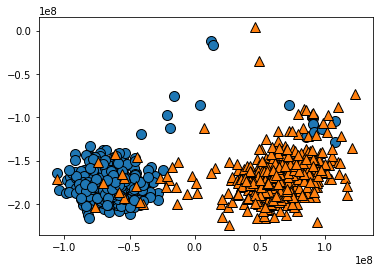

In [94]:
index = 9
train_index, test_index = index_splits_0_single_r[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

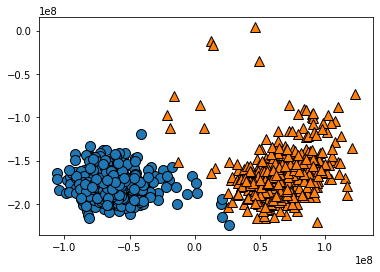

In [95]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_r[index][:])

In [96]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9088155783246233, 0.9028061792650837, 0.9027912505217404, 0.908821903090143, 0.9108297923150254, 0.9048499730857945, 0.8949582292094073, 0.900801443714511, 0.9128572651617728, 0.9048037341654314]
Folkes test array: [0.9039568517485352, 0.9221411192214112, 0.9217934842401961, 0.9038671136921633, 0.885368487120178, 0.9253208868144691, 0.9633644859813083, 0.9409701957230581, 0.8500407497962511, 0.9031602097018196]
Assignment fidelity train array: [0.9761111111111112, 0.9744444444444444, 0.9744444444444444, 0.9761111111111112, 0.9766666666666667, 0.975, 0.9722222222222222, 0.9738888888888889, 0.9772222222222222, 0.975]
Assignment fidelity test array: [0.975, 0.98, 0.98, 0.975, 0.97, 0.98, 0.99, 0.985, 0.96, 0.975]


In [97]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.905 (±0.0050) with 10 splits
Train score 0.912 (±0.0293) with 10 splits


In [98]:
report_cv_score(assignment_train, assignment_test)

Test score 0.975 (±0.0014) with 10 splits
Train score 0.977 (±0.0078) with 10 splits


In [99]:
index_splits_2_3_0_single_r_2 = index_splits_0_single_r
qkmeans_2_3_0_single_r_2 = qkmeans_0_single_r
y_pred_2_3_0_single_train_r_2 = y_pred_0_single_train_r
y_pred_2_3_0_single_test_r_2 = y_pred_0_single_test_r
%store index_splits_2_3_0_single_r_2
%store qkmeans_2_3_0_single_r_2
%store y_pred_2_3_0_single_train_r_2
%store y_pred_2_3_0_single_test_r_2

Stored 'index_splits_2_3_0_single_r_2' (list)
Stored 'qkmeans_2_3_0_single_r_2' (list)
Stored 'y_pred_2_3_0_single_train_r_2' (list)
Stored 'y_pred_2_3_0_single_test_r_2' (list)


In [7]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_p = []
y_pred_1_single_train_p = []
y_pred_1_single_test_p = []

index_splits_1_single_p = []
for train_index, test_index in split_1_single:
    index_splits_1_single_p.append((train_index,test_index))

ibmqfactory.load_account:WARNING:2021-09-14 02:54:43,485: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
for i in range(len(index_splits_1_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_single_p[i]
    qkmeans_1_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_p[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_p.append(qkmeans_1_single_p[-1].labels_)
    y_pred_1_single_test_p.append(qkmeans_1_single_p[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0   -1.323033 -0.664664
1   -0.509568 -0.563402
2    1.693831  0.231330
3   -0.976881 -1.086704
4   -0.912347 -1.044569
..        ...       ...
895 -1.160035 -1.399437
896  0.611166 -0.219527
897 -0.664220  0.163033
898 -0.681436 -0.894486
899  1.098066  2.224881

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.48702228 1.24185489]
 [0.1254902  1.        ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.48702228  1.24185489]
 [-1.32394369  0.07573963]]
Iteration 0
Old centroids are [[ 1.48702228  1.24185489]
 [-1.32394369  0.07573963]]
New centroids are           0         1
0  0.964678  0.336534
1 -0.926848 -0.323336
Centers are [1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 

Old centroids are           0         1
0  0.956638  0.358548
1 -0.919123 -0.344487
New centroids are           0         1
0  0.970618  0.360583
1 -0.907998 -0.337320
Centers are [1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0

Old centroids are           0         1
0  0.965679  0.354511
1 -0.915514 -0.336095
New centroids are           0         1
0  0.965662  0.341413
1 -0.923677 -0.326569
Centers are [1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:             0         1
0    1.052181  0.751036
1    1.179405 -0.832858
2    1.040630 -0.939598
3    0.954875  0.864305
4    0.493903 -0.755949
..        ...       ...
895 -0.358721 -1.829758
896 -0.714852 -2.363806
897  0.816195  1.221653
898 -0.721150 -0.861676
899 -0.512396 -0.887083

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.60509996  0.4156687 ]
 [-0.92195516 -0.32505705]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.60509996  0.4156687 ]
 [ 0.99482278  0.44502955]]
Iteration 0
Old centroids are [[-0.60509996  0.4156687 ]
 [ 0.99482278  0.44502955]]
New centroids are           0         1
0 -0.948557 -0.300397
1  0.957026  0.303080
Centers are [1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 

Old centroids are           0         1
0 -0.924046 -0.333227
1  0.961762  0.346828
New centroids are           0         1
0 -0.927748 -0.322939
1  0.965615  0.336120
Centers are [1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.8806946  -1.0684931 ]
 [ 1.18135732  0.62816461]]
Iteration 0
Old centroids are [[-0.8806946  -1.0684931 ]
 [ 1.18135732  0.62816461]]
New centroids are           0         1
0 -0.831275 -0.499478
1  0.838697  0.503937
Centers are [0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0   -1.064837 -1.146390
1   -1.084143 -0.072183
2   -1.103930 -1.189956
3   -1.018719 -1.761297
4   -0.915696 -0.525500
..        ...       ...
895  0.878542  0.612698
896  0.397698  0.123864
897  1.387123  0.694854
898  0.866370  0.025954
899  0.623578  0.306969

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.94849707 2.4990635 ]
 [0.94162454 0.36764058]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.94849707  2.4990635 ]
 [-0.65232228  0.50293629]]
Iteration 0
Old centroids are [[ 0.94849707  2.4990635 ]
 [-0.65232228  0.50293629]]
New centroids are           0         1
0  0.956378  0.306349
1 -0.943711 -0.302292
Centers are [1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 

Old centroids are           0         1
0  0.958807  0.322203
1 -0.933576 -0.313724
New centroids are           0         1
0  0.955084  0.325133
1 -0.934093 -0.317987
Centers are [1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1

Split 4
Data is:             0         1
0   -0.683679 -0.935130
1    0.401811  0.353818
2    0.960093 -0.927129
3   -0.936060 -1.049983
4    0.905864  1.351481
..        ...       ...
895 -0.773800  1.359694
896 -1.022854  0.316282
897  1.354639 -0.363500
898 -0.698713 -0.577808
899  1.014573  1.007705

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.00430644 -0.01915923]
 [-0.93208953 -0.31816181]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.00430644 -0.01915923]
 [-1.48973247 -1.12868923]]
Iteration 0
Old centroids are [[ 1.00430644 -0.01915923]
 [-1.48973247 -1.12868923]]
New centroids are           0         1
0  0.963481  0.326112
1 -0.929823 -0.314719
Centers are [1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 

Old centroids are           0         1
0  0.958907  0.339923
1 -0.925408 -0.328048
New centroids are           0         1
0  0.962217  0.344297
1 -0.920381 -0.329328
Centers are [1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -0.471466 -0.981630
1    0.875462 -1.743841
2    0.589127  0.598056
3   -1.219792  0.909883
4   -0.760825  1.369563
..        ...       ...
895 -0.252369 -0.063410
896  1.182947 -0.460793
897  0.767964  0.794407
898  1.156968 -0.797777
899 -1.084372  0.234158

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.76082525  1.36956281]
 [-0.92072243 -0.32824475]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.76082525  1.36956281]
 [ 1.19695019 -0.09408547]]
Iteration 0
Old centroids are [[-0.76082525  1.36956281]
 [ 1.19695019 -0.09408547]]
New centroids are           0         1
0 -0.729499  0.174094
1  0.766057 -0.182819
Centers are [1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 

Split 6
Data is:             0         1
0    1.233220  0.139102
1   -0.825840  1.148936
2    0.997878  1.039336
3   -0.992463  1.343686
4    1.017690 -0.643250
..        ...       ...
895 -0.983581  0.703670
896 -0.557113  0.362213
897 -1.262202 -0.474068
898  1.557389 -0.841922
899 -0.550370  0.105183

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.37652542 -0.41488506]
 [ 0.96027122  0.31514437]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.37652542 -0.41488506]
 [ 1.28552156  0.65074501]]
Iteration 0
Old centroids are [[-0.37652542 -0.41488506]
 [ 1.28552156  0.65074501]]
New centroids are           0         1
0 -0.845155 -0.482418
1  0.860314  0.491071
Centers are [1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 

Old centroids are           0         1
0 -0.923624 -0.328706
1  0.961323  0.342122
New centroids are           0         1
0 -0.927058 -0.319497
1  0.964898  0.332538
Centers are [1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.07360681  0.16425866]
 [-0.60700698 -0.14548956]]
Iteration 0
Old centroids are [[ 1.07360681  0.16425866]
 [-0.60700698 -0.14548956]]
New centroids are           0         1
0  0.955368  0.301320
1 -0.946914 -0.298653
Centers are [1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 

Old centroids are           0         1
0  0.952754  0.324671
1 -0.935966 -0.318950
New centroids are           0         1
0  0.956935  0.326894
1 -0.931753 -0.318292
Centers are [1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0

Old centroids are           0        1
0  0.951948  0.32086
1 -0.939339 -0.31661
New centroids are           0         1
0  0.952984  0.324676
1 -0.936191 -0.318955
Centers are [1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 

Old centroids are           0         1
0  0.955157  0.317530
1 -0.938326 -0.311935
New centroids are           0         1
0  0.956972  0.327087
1 -0.931788 -0.318479
Centers are [1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0   -1.187767  0.766801
1   -1.238464  1.322543
2   -0.874112 -0.923629
3    0.891188  1.151974
4   -0.840195  1.408767
..        ...       ...
895 -0.887592 -1.248368
896  1.358166  0.879813
897 -0.742010 -0.858771
898 -0.867023 -1.493906
899  0.771309  0.640511

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.45900374 -0.28486962]
 [-0.92980835 -0.32339758]]
Cluster center 1
Centers are: [[ 0.45900374 -0.28486962]
 [-0.93401079 -0.05501088]]
Iteration 0
Old centroids are [[ 0.45900374 -0.28486962]
 [-0.93401079 -0.05501088]]
New centroids are           0         1
0  0.948762  0.254072
1 -0.944555 -0.252945
Centers are [1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 

Old centroids are           0         1
0  0.961393  0.308902
1 -0.936093 -0.300773
New centroids are           0         1
0  0.959242  0.315395
1 -0.933998 -0.307095
Centers are [1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1

Old centroids are           0        1
0  0.966355  0.35188
1 -0.912089 -0.33212
New centroids are           0         1
0  0.962129  0.336410
1 -0.924399 -0.323218
Centers are [1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 

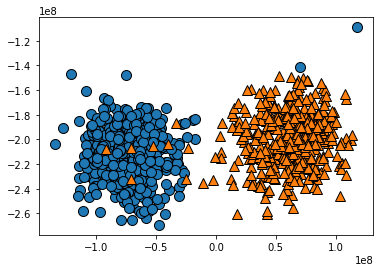

In [9]:
index = 0
train_index, test_index = index_splits_1_single_p[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

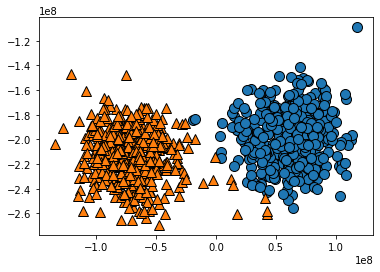

In [10]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_p[index][:])

In [11]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9543348782464758, 0.9564578549311514, 0.9292320430271761, 0.9500946353739731, 0.9479882247957719, 0.956454400039427, 0.9543303363547584, 0.9458830340368868, 0.9564507378921059, 0.9500961287827315]
Folkes test array: [0.9798498866280508, 0.9406243819552125, 0.9606062767330186, 0.9409701957230581, 0.9798000612036726, 0.9798000612036726, 0.9600827407663025, 0.9602595296025953, 0.9217934842401961, 0.9798166970263985]
Assignment fidelity train array: [0.9883333333333333, 0.9888888888888889, 0.9816666666666667, 0.9872222222222222, 0.9866666666666667, 0.9888888888888889, 0.9883333333333333, 0.9861111111111112, 0.9888888888888889, 0.9872222222222222]
Assignment fidelity test array: [0.995, 0.985, 0.99, 0.985, 0.995, 0.995, 0.99, 0.99, 0.98, 0.995]


In [12]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.950 (±0.0078) with 10 splits
Train score 0.960 (±0.0194) with 10 splits


In [13]:
report_cv_score(assignment_train, assignment_test)

Test score 0.987 (±0.0021) with 10 splits
Train score 0.990 (±0.0050) with 10 splits


In [14]:
index_splits_2_3_1_single_p_2 = index_splits_1_single_p
qkmeans_2_3_1_single_p_2 = qkmeans_1_single_p
y_pred_2_3_1_single_train_p_2 = y_pred_1_single_train_p
y_pred_2_3_1_single_test_p_2 = y_pred_1_single_test_p
%store index_splits_2_3_1_single_p_2
%store qkmeans_2_3_1_single_p_2
%store y_pred_2_3_1_single_train_p_2
%store y_pred_2_3_1_single_test_p_2

Stored 'index_splits_2_3_1_single_p_2' (list)
Stored 'qkmeans_2_3_1_single_p_2' (list)
Stored 'y_pred_2_3_1_single_train_p_2' (list)
Stored 'y_pred_2_3_1_single_test_p_2' (list)


In [16]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_r = []
y_pred_1_single_train_r = []
y_pred_1_single_test_r = []

index_splits_2_3_1_single_r = []
for train_index, test_index in split_1_single:
    index_splits_2_3_1_single_r.append((train_index,test_index))

ibmqfactory.load_account:WARNING:2021-09-14 16:02:35,136: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
for i in range(len(index_splits_2_3_1_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_2_3_1_single_r[i]
    qkmeans_1_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_r[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_r.append(qkmeans_1_single_r[-1].labels_)
    y_pred_1_single_test_r.append(qkmeans_1_single_r[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0   -0.929443  0.471778
1    1.070615  0.696566
2   -1.027509  0.328403
3   -0.994568  2.592423
4   -1.083965 -1.277077
..        ...       ...
895  0.591784 -0.246588
896  0.405202  1.393458
897 -0.806871 -0.974429
898 -0.964098  0.179766
899  1.069846 -0.516521

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.741715 -1.057754
1  1.220350  0.132350
New centroids are           0         1
0 -0.887626 -0.394027
1  0.927973  0.411937
Centers are [0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0
 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1

Old centroids are           0         1
0 -0.929808 -0.332017
1  0.950703  0.339478
New centroids are           0         1
0 -0.938672 -0.327507
1  0.947053  0.330431
Centers are [0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0
 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1

Old centroids are           0         1
0 -0.833094  0.035960
1  0.818414 -0.035326
New centroids are           0         1
0 -0.967013 -0.297910
1  0.937388  0.288783
Centers are [1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0

Old centroids are           0         1
0 -0.941880 -0.340844
1  0.937703  0.339333
New centroids are           0         1
0 -0.937251 -0.335618
1  0.945619  0.338614
Centers are [1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0

Old centroids are           0         1
0 -0.935774 -0.332471
1  0.948335  0.336934
New centroids are           0         1
0 -0.938498 -0.332204
1  0.946877  0.335170
Centers are [1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0

Old centroids are           0         1
0 -0.942958 -0.332327
1  0.942958  0.332327
New centroids are           0         1
0 -0.941856 -0.329600
1  0.946052  0.331068
Centers are [1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:             0         1
0    0.715413 -0.367161
1    0.457023  0.481578
2    0.757162  0.637783
3    0.733856  0.904039
4    0.594230  1.196631
..        ...       ...
895 -0.911309 -0.213192
896  1.266417  0.258613
897 -0.960593 -0.874174
898 -1.255701 -0.131042
899 -1.086032 -0.048343

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  1.189657  0.625511
1 -0.619258 -0.870815
New centroids are           0         1
0  0.830004  0.524283
1 -0.808162 -0.510486
Centers are [0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 0 1 1 1 0 0 0 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0   -0.463604 -1.607521
1    1.163780  0.647326
2    1.649991  0.029893
3   -0.966672  0.653721
4    1.001917 -0.282988
..        ...       ...
895  0.303772 -0.729486
896 -0.760469 -1.045853
897  1.020122  1.306521
898  1.034297  1.648451
899  0.917098  0.127577

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.549783 -0.317173
1  1.165194  2.405664
New centroids are           0         1
0  0.038175 -0.766651
1 -0.037670  0.756497
Centers are [0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1

Old centroids are           0         1
0 -0.664861 -0.639102
1  0.676787  0.650566
New centroids are           0         1
0 -0.780183 -0.538324
1  0.797715  0.550421
Centers are [0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0    0.697370 -0.245698
1   -0.952663 -0.885048
2   -1.427458  0.048351
3    1.164002 -0.225573
4   -0.588664  0.786772
..        ...       ...
895  1.115082  0.659630
896  0.991278  0.659442
897 -0.995879 -0.656311
898  0.739317  1.036741
899 -0.794481 -1.477049

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.164676 -0.140367
1 -1.316658 -1.716837
New centroids are           0         1
0  0.978236  0.372236
1 -0.894982 -0.340556
Centers are [0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0

Old centroids are           0         1
0  0.978755  0.346828
1 -0.911544 -0.323012
New centroids are           0         1
0  0.982157  0.350800
1 -0.906607 -0.323816
Centers are [0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -1.456195 -0.798969
1   -0.741014 -0.359044
2    1.038738  0.429883
3   -1.276642  0.001531
4   -1.001546 -1.797558
..        ...       ...
895  0.706090  0.451526
896 -1.023377  0.320134
897 -1.147561 -0.576457
898  0.692303 -2.461756
899 -1.263987 -0.190512

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.899216  1.160281
1  1.242167  1.070164
New centroids are           0         1
0 -0.520986  0.364006
1  0.535066 -0.373845
Centers are [1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 

Old centroids are           0         1
0 -0.935410 -0.290308
1  0.964971  0.299482
New centroids are           0         1
0 -0.923937 -0.299324
1  0.970239  0.314325
Centers are [0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0

Old centroids are           0         1
0 -0.925745 -0.301566
1  0.967825  0.315273
New centroids are           0         1
0 -0.926997 -0.310398
1  0.960553  0.321635
Centers are [0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0   -0.748275  1.076452
1   -1.004154  1.335744
2   -1.244108  0.039395
3    1.087880 -0.636173
4    1.340768 -0.359870
..        ...       ...
895  0.918870  1.422120
896  1.197737 -0.439948
897  1.090939  1.244416
898 -1.001812  0.808133
899 -0.910575 -1.819629

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.975976 -1.668295
1 -1.413732 -1.130487
New centroids are           0         1
0  0.604949 -0.320534
1 -0.615800  0.326284
Centers are [1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0    0.789419  0.427608
1    0.994694 -0.275355
2    0.686029 -2.398535
3    0.300866 -0.731184
4    0.659340  0.000620
..        ...       ...
895  1.193007  1.672481
896  1.058236 -0.314269
897  0.420871  0.154063
898 -0.689572  0.333015
899  0.509126 -1.416552

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.912975 -1.219336
1  1.257690  0.809265
New centroids are           0         1
0 -0.782421 -0.521003
1  0.825293  0.549551
Centers are [1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0

Old centroids are           0         1
0 -0.917923 -0.303504
1  0.976872  0.322995
New centroids are           0         1
0 -0.917991 -0.309580
1  0.972608  0.327999
Centers are [1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1

Old centroids are           0         1
0 -0.916174 -0.308517
1  0.975011  0.328330
New centroids are           0         1
0 -0.921997 -0.304716
1  0.972517  0.321413
Centers are [1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0    0.761487 -0.778801
1    0.650198  1.108055
2    1.080307  1.140986
3   -0.961146  0.029626
4   -1.087633  0.454949
..        ...       ...
895  0.703900 -1.620304
896  1.029230 -0.645916
897 -1.014607  0.373227
898  0.282749 -0.737935
899  0.880004  1.164513

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.306632 -0.073784
1  1.150814  0.193582
New centroids are           0         1
0 -0.953629 -0.290508
1  0.949400  0.289220
Centers are [1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:             0         1
0   -0.581018 -0.002710
1   -1.071375 -0.051689
2   -0.635119 -0.466823
3   -0.887031 -0.037969
4   -0.155507  0.265524
..        ...       ...
895 -0.958214 -0.016286
896 -0.919407 -0.285705
897 -0.620091 -0.593117
898  0.914888  1.132463
899 -1.119178 -0.078501

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.140567 -1.516814
1 -1.386357  0.527907
New centroids are           0         1
0  0.667515 -0.276617
1 -0.647066  0.268143
Centers are [1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0

Old centroids are           0         1
0  0.971943  0.358387
1 -0.921453 -0.339770
New centroids are           0         1
0  0.965274  0.362583
1 -0.923306 -0.346819
Centers are [1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


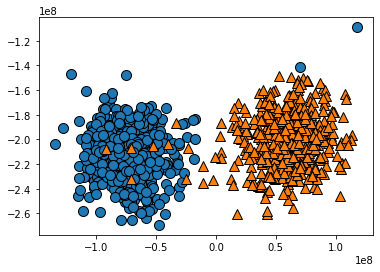

In [18]:
index = 2
train_index, test_index = index_splits_2_3_1_single_r[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

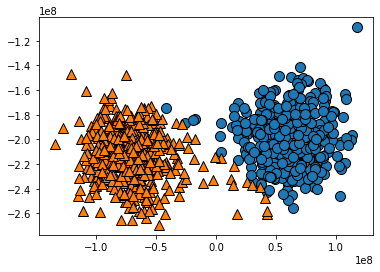

In [19]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_r[index][:])

In [20]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_2_3_1_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9437775315205333, 0.9458938465575433, 0.9375174910460282, 0.9586019023025979, 0.9543781407205868, 0.9522153595094298, 0.95220941836311, 0.9585920029821152, 0.9479907895458363, 0.9500966388477377]
Folkes test array: [0.9411667087332625, 0.9805225020067668, 1.0, 0.9050195350208889, 0.9255720266386869, 1.0, 0.9602806874928685, 0.9219539617945657, 0.979965195812238, 0.8681603621840672]
Assignment fidelity train array: [0.9855555555555555, 0.9861111111111112, 0.9838888888888889, 0.9894444444444445, 0.9883333333333333, 0.9877777777777778, 0.9877777777777778, 0.9894444444444445, 0.9866666666666667, 0.9872222222222222]
Assignment fidelity test array: [0.985, 0.995, 1.0, 0.975, 0.98, 1.0, 0.99, 0.98, 0.995, 0.965]


In [21]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.950 (±0.0063) with 10 splits
Train score 0.948 (±0.0413) with 10 splits


In [22]:
report_cv_score(assignment_train, assignment_test)

Test score 0.987 (±0.0016) with 10 splits
Train score 0.987 (±0.0110) with 10 splits


In [23]:
index_splits_2_3_1_single_r_2 = index_splits_2_3_1_single_r
qkmeans_2_3_1_single_r_2 = qkmeans_1_single_r
y_pred_2_3_1_single_train_r_2 = y_pred_1_single_train_r
y_pred_2_3_1_single_test_r_2 = y_pred_1_single_test_r
%store index_splits_2_3_1_single_r_2
%store qkmeans_2_3_1_single_r_2
%store y_pred_2_3_1_single_train_r_2
%store y_pred_2_3_1_single_test_r_2

Stored 'index_splits_2_3_1_single_r_2' (list)
Stored 'qkmeans_2_3_1_single_r_2' (list)
Stored 'y_pred_2_3_1_single_train_r_2' (list)
Stored 'y_pred_2_3_1_single_test_r_2' (list)


In [9]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_p = []
y_pred_0_both_train_p = []
y_pred_0_both_test_p = []

index_splits_2_3_0_both_p = []
for train_index, test_index in split_0_both:
    index_splits_2_3_0_both_p.append((train_index,test_index))

ibmqfactory.load_account:WARNING:2021-08-26 05:21:43,873: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
for i in range(len(index_splits_2_3_0_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_2_3_0_both_p[i]
    qkmeans_0_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_p[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_p.append(qkmeans_0_both_p[-1].labels_)
    y_pred_0_both_test_p.append(qkmeans_0_both_p[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0     1.036279  0.086374
1     0.769213 -0.784522
2    -0.809190  0.422569
3     1.250854  1.578807
4     0.819544 -0.119070
...        ...       ...
1795 -1.539574  0.281099
1796  0.572327  0.437623
1797  1.015812 -0.880066
1798 -0.944533 -1.050837
1799 -0.702204 -0.612661

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.84388292  0.40041892]
 [-0.016522    0.01648532]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.84388292  0.40041892]
 [-1.12626336 -0.69204351]]
Iteration 0
Old centroids are [[ 0.84388292  0.40041892]
 [-1.12626336 -0.69204351]]
New centroids are           0         1
0  0.952353  0.294909
1 -0.892895 -0.276497
Centers are [0 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.952353  0.294909
1 -0.892895 -0.276497
New centroids are           0         1
0  0.947212  0.207440
1 -0.966348 -0.211631
Centers are [0 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.947212  0.207440
1 -0.966348 -0.211631
New centroids are           0         1
0  0.949355  0.194058
1 -0.970689 -0.198419
Centers are [0 0 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.949355  0.194058
1 -0.970689 -0.198419
New centroids are           0         1
0  0.948517  0.192745
1 -0.971989 -0.197515
Centers are [0 0 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.948517  0.192745
1 -0.971989 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.08767409  0.15995478]
 [-1.2860714  -0.64415425]]
Iteration 0
Old centroids are [[ 0.08767409  0.15995478]
 [-1.2860714  -0.64415425]]
New centroids are           0         1
0  0.901464  0.500397
1 -0.717933 -0.398520
Centers are [1 0 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.901464  0.500397
1 -0.717933 -0.398520
New centroids are           0         1
0  0.953600  0.302861
1 -0.880246 -0.279564
Centers are [1 0 0 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.953600  0.302861
1 -0.880246 -0.279564
New centroids are           0         1
0  0.949526  0.206491
1 -0.960135 -0.208798
Centers are [1 0 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.949526  0.206491
1 -0.960135 -0.208798
New centroids are           0         1
0  0.951326  0.195224
1 -0.964095 -0.197844
Centers are [1 0 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.951326  0.195224
1 -0.964095 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.3889848   0.38381234]
 [-1.07358184 -0.24280373]]
Iteration 0
Old centroids are [[ 1.3889848   0.38381234]
 [-1.07358184 -0.24280373]]
New centroids are           0         1
0  0.939692  0.200521
1 -0.973708 -0.207780
Centers are [0 1 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.939692  0.200521
1 -0.973708 -0.207780
New centroids are           0         1
0  0.940202  0.198241
1 -0.974237 -0.205417
Centers are [0 1 0 ... 1 0 0]
Split 4
Data is:              0         1
0    -1.008647  0.318618
1     1.022613  1.122425
2     0.477941  0.248782
3     0.906387  0.089644
4     1.026359 -0.898021
...        ...       ...
1795  1.116205  1.137213
1796  1.076903 -0.681941
1797 -0.648779 -0.268393
1798 -0.319691  3.095801
1799  0.688990 -0.314186

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.7702325  -0.85635283]
 [-0.97423696 -0.20541674]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.7702325  -0.85635283]
 [-1.05727132 -0.15617371]]
Iteration 0
Old centroids are [[ 0.7702325  -0.85635283]
 [-1.05727132 -0.15617371]]
New centroids are           0         1
0  0.949920  0.067353
1 -0.943609 -0.066905
Centers are [1 0 0 ... 1 1 0]
Iteration 1
Old centroids are           0         1
0  0.949920  0.067353
1 -0.943609 -0.066905
New centroids are           0         1
0  0.948824  0.180372
1 -0.974468 -0.185247
Centers are [1 0 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0  0.948824  0.180372
1 -0.974468 -0.185247
New centroids are           0         1
0  0.951454  0.203557
1 -0.966370 -0.206748
Centers are [1 0 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0  0.951454  0.203557
1 -0.966370 -0.206748
New centroids are           0         1
0  0.951969  0.205566
1 -0.964747 -0.208326
Centers are [1 0 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0  0.951969  0.205566
1 -0.964747 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.03559059 -0.45354145]
 [ 0.82755046 -0.24154707]]
Iteration 0
Old centroids are [[-1.03559059 -0.45354145]
 [ 0.82755046 -0.24154707]]
New centroids are           0         1
0 -0.972223 -0.171151
1  0.952971  0.167762
Centers are [0 1 0 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.972223 -0.171151
1  0.952971  0.167762
New centroids are           0         1
0 -0.966235 -0.196493
1  0.953437  0.193891
Centers are [0 1 0 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.966235 -0.196493
1  0.953437  0.193891
New centroids are           0         1
0 -0.964484 -0.206641
1  0.951709  0.203904
Centers are [0 1 0 ... 0 1 0]
Split 6
Data is:              0         1
0     0.856821 -1.769590
1    -0.800698  1.178932
2    -0.972013 -0.499707
3     1.079520 -0.431128
4     0.685793  1.055996
...        ...       ...
1795  1.153436  0.889941
1796 -0.913955 -0.639457
1797  1.318791  0.816378
1798  1.073452 -0.229520
1799

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.3600335   1.55753076]
 [-1.27654966 -0.29570245]]
Iteration 0
Old centroids are [[ 1.3600335   1.55753076]
 [-1.27654966 -0.29570245]]
New centroids are           0         1
0  0.950806  0.331686
1 -0.864094 -0.301437
Centers are [1 1 1 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.950806  0.331686
1 -0.864094 -0.301437
New centroids are           0         1
0  0.950961  0.220568
1 -0.955197 -0.221550
Centers are [0 1 1 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.950961  0.220568
1 -0.955197 -0.221550
New centroids are           0         1
0  0.952606  0.205208
1 -0.963250 -0.207501
Centers are [0 1 1 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.952606  0.205208
1 -0.963250 -0.207501
New centroids are           0         1
0  0.955056  0.198550
1 -0.963584 -0.200323
Centers are [0 1 1 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.955056  0.198550
1 -0.963584 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.97476369 -1.36991347]
 [ 1.49641832  2.74862071]]
Iteration 0
Old centroids are [[-0.97476369 -1.36991347]
 [ 1.49641832  2.74862071]]
New centroids are           0         1
0 -0.565535 -0.513829
1  0.729584  0.662878
Centers are [1 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0 -0.565535 -0.513829
1  0.729584  0.662878
New centroids are           0         1
0 -0.743555 -0.388712
1  0.908790  0.475092
Centers are [1 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.743555 -0.388712
1  0.908790  0.475092
New centroids are           0         1
0 -0.896043 -0.270288
1  0.953587  0.287646
Centers are [1 0 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.896043 -0.270288
1  0.953587  0.287646
New centroids are           0         1
0 -0.960935 -0.209748
1  0.950317  0.207431
Centers are [1 0 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.960935 -0.209748
1  0.950317 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.97082798  0.30551547]
 [ 0.98396259  0.23024281]]
Iteration 0
Old centroids are [[-0.97082798  0.30551547]
 [ 0.98396259  0.23024281]]
New centroids are           0         1
0 -0.959192 -0.137977
1  0.963464  0.138592
Centers are [1 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.959192 -0.137977
1  0.963464  0.138592
New centroids are           0         1
0 -0.964240 -0.188619
1  0.957834  0.187366
Centers are [1 0 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.964240 -0.188619
1  0.957834  0.187366
New centroids are           0         1
0 -0.955051 -0.205594
1  0.961440  0.206969
Centers are [1 0 1 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.955051 -0.205594
1  0.961440  0.206969
New centroids are           0         1
0 -0.954820 -0.211814
1  0.959073  0.212758
Centers are [1 0 1 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0 -0.954820 -0.211814
1  0.959073 

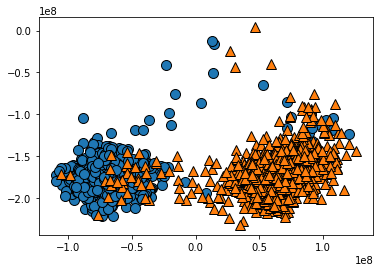

In [18]:
index = 1
train_index, test_index = index_splits_2_3_0_both_p[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

Text(0.5, 1.0, '|0> and |1> state clustering')

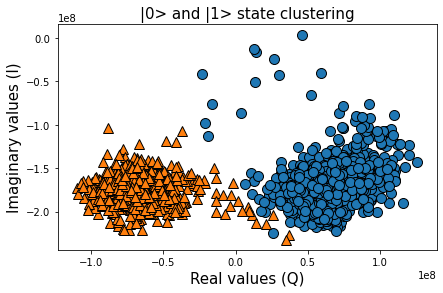

In [19]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_p[index][:])
plt.tight_layout()
plt.xlabel("Real values (Q)", fontsize=15)
plt.ylabel("Imaginary values (I)", fontsize=15)
plt.title("|0> and |1> state clustering", fontsize=15)
#plt.savefig('clustering_0_qubit_both.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.svg', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.png',dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [20]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_2_3_0_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9130010701777211, 0.9109613998694956, 0.91094319307515, 0.5006150382756608, 0.49975916687493954, 0.49999727052817566, 0.500601513258945, 0.4996129605699812, 0.5004707793990819, 0.49958855508422184]
Folkes test array: [0.9319232611219843, 0.9507700184816734, 0.5074871885339395, 0.49908527709912665, 0.4961648771165316, 0.49825218726562603, 0.4991668827780045, 0.4990712236094357, 0.4970576217389114, 0.4978630624871211]
Assignment fidelity train array: [0.9772222222222222, 0.9766666666666667, 0.9766666666666667, 0.741111111111111, 0.7527777777777778, 0.7436111111111111, 0.76, 0.7519444444444444, 0.7605555555555555, 0.7488888888888889]
Assignment fidelity test array: [0.9825, 0.9875, 0.785, 0.7575000000000001, 0.76, 0.755, 0.7725, 0.7675, 0.7575000000000001, 0.7625]


In [21]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.624 (±0.1886) with 10 splits
Train score 0.588 (±0.1769) with 10 splits


In [22]:
report_cv_score(assignment_train, assignment_test)

Test score 0.819 (±0.1035) with 10 splits
Train score 0.809 (±0.0885) with 10 splits


In [24]:
qkmeans_2_3_0_both_p_2 = qkmeans_0_both_p
y_pred_2_3_0_both_train_p_2 = y_pred_0_both_train_p
y_pred_2_3_0_both_test_p_2 = y_pred_0_both_test_p
index_splits_2_3_0_both_p_2 = index_splits_2_3_0_both_p
%store index_splits_2_3_0_both_p_2
%store qkmeans_2_3_0_both_p_2
%store y_pred_2_3_0_both_train_p_2
%store y_pred_2_3_0_both_test_p_2

Stored 'index_splits_2_3_0_both_p_2' (list)
Stored 'qkmeans_2_3_0_both_p_2' (list)
Stored 'y_pred_2_3_0_both_train_p_2' (list)
Stored 'y_pred_2_3_0_both_test_p_2' (list)


In [25]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_r = []
y_pred_0_both_train_r = []
y_pred_0_both_test_r = []

index_splits_2_3_0_both_r = []
for train_index, test_index in split_0_both:
    index_splits_2_3_0_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-26 18:17:00,389: Credentials are already in use. The existing account in the session will be replaced.


In [26]:
for i in range(len(index_splits_2_3_0_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_2_3_0_both_r[i]
    qkmeans_0_both_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_r[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_r.append(qkmeans_0_both_r[-1].labels_)
    y_pred_0_both_test_r.append(qkmeans_0_both_r[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0     0.923599 -0.454792
1     1.042999 -0.564609
2     1.060422 -1.023642
3    -1.005072 -0.267898
4     0.150510 -1.404953
...        ...       ...
1795 -1.005732  0.918523
1796 -0.794094  0.140999
1797 -1.004135 -0.728030
1798 -0.888204 -0.100662
1799  1.122862  0.385042

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.219196  1.159072
1 -1.054163  0.528737
New centroids are           0         1
0  0.777715  0.601451
1 -0.597420 -0.462019
Centers are [0 0 1 ... 1 1 0]
Iteration 1
Old centroids are           0         1
0  0.777715  0.601451
1 -0.597420 -0.462019
New centroids are           0         1
0  0.929929  0.408698
1 -0.804654 -0.353640
Centers are [0 0 0 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0  0.929929  0.408698
1 -0.804654 -0.353640
New centroids are           0         1
0  0.954618  0.248700
1 -0.931565 -0.242695
Centers are [0 0 0 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0  0.954618  0.248700
1 -0.931565 -0.242695
New centroids are           0         1
0  0.954181  0.206509
1 -0.960564 -0.207890
Centers are [0 0 0 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0  0.954181  0.206509
1 -0.960564 -0.207890
New centroids are           0         1
0  0.952560  0.203828
1 -0.963203 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:              0         1
0    -0.850398  0.558034
1    -1.188717  0.083119
2    -0.467119  0.577177
3    -0.905665 -0.425821
4    -0.763390 -0.510506
...        ...       ...
1795  0.888432  1.435305
1796 -0.940458  0.023592
1797  1.463521  0.542103
1798  0.957591  0.325484
1799 -1.060920  0.388505

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.549538 -0.265881
1  0.950643 -0.343476
New centroids are           0         1
0 -0.343065 -0.459380
1  0.387725  0.519181
Centers are [0 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.343065 -0.459380
1  0.387725  0.519181
New centroids are           0         1
0 -0.626656 -0.476243
1  0.817621  0.621372
Centers are [0 0 1 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0 -0.626656 -0.476243
1  0.817621  0.621372
New centroids are           0         1
0 -0.811667 -0.355542
1  0.935941  0.409979
Centers are [0 0 0 ... 1 1 0]
Iteration 3
Old centroids ar

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.934850  0.593527
1 -0.805816 -1.211094
New centroids are           0         1
0  0.894816  0.502548
1 -0.727207 -0.408415
Centers are [1 1 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.894816  0.502548
1 -0.727207 -0.408415
New centroids are           0         1
0  0.944458  0.309611
1 -0.889441 -0.291576
Centers are [1 0 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.944458  0.309611
1 -0.889441 -0.291576
New centroids are           0         1
0  0.938145  0.217697
1 -0.969947 -0.225076
Centers are [1 0 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.938145  0.217697
1 -0.969947 -0.225076
New centroids are           0         1
0  0.942051  0.204365
1 -0.973985 -0.211293
Centers are [1 0 0 ... 0 0 0]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:              0         1
0    -1.121909  0.195555
1     0.949731 -0.671537
2     0.734560  1.498469
3    -0.824834 -0.343180
4    -0.869473  0.150745
...        ...       ...
1795  1.251652  2.151411
1796  0.980469  1.676300
1797 -1.131935  0.249157
1798 -0.711143 -0.312611
1799  0.623809  1.970329

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.173273 -1.084437
1 -0.943827 -0.795565
New centroids are           0         1
0  0.225662 -0.178673
1 -0.220213  0.174359
Centers are [1 0 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.225662 -0.178673
1 -0.220213  0.174359
New centroids are           0         1
0  0.807101 -0.222209
1 -0.743360  0.204660
Centers are [1 0 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.807101 -0.222209
1 -0.743360  0.204660
New centroids are           0         1
0  0.961361  0.108033
1 -0.948628 -0.106602
Centers are [1 0 0 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0  0.961361  0.108033
1 -0.948628 -0.106602
New centroids are           0         1
0  0.961794  0.195972
1 -0.959659 -0.195537
Centers are [1 0 0 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0  0.961794  0.195972
1 -0.959659 -0.195537
New centroids are           0         1
0  0.961514  0.206534
1 -0.957250 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:              0         1
0     0.960383 -0.435838
1     0.893532 -1.190303
2    -1.148076  1.823864
3    -1.002299  0.183460
4     1.033831  0.722788
...        ...       ...
1795  0.994885  0.909626
1796  0.880547 -0.618439
1797 -1.243531 -0.731018
1798 -1.042407  0.324287
1799 -1.122750 -0.914009

[1800 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.392055 -0.550300
1 -1.000465  0.567674
New centroids are           0         1
0  0.756299 -0.276791
1 -0.715418  0.261829
Centers are [0 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.756299 -0.276791
1 -0.715418  0.261829
New centroids are           0         1
0  0.948190  0.045135
1 -0.933554 -0.044438
Centers are [0 0 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.948190  0.045135
1 -0.933554 -0.044438
New centroids are           0         1
0  0.947206  0.172594
1 -0.977141 -0.178049
Centers are [0 0 1 ... 1 1 1]
Iteration 3
Old centroids ar

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.737866 -0.803481
1  0.855718 -0.198428
New centroids are           0         1
0 -0.543715 -0.526992
1  0.703020  0.681398
Centers are [0 1 0 ... 1 0 1]
Iteration 1
Old centroids are           0         1
0 -0.543715 -0.526992
1  0.703020  0.681398
New centroids are           0         1
0 -0.728075 -0.403177
1  0.899919  0.498336
Centers are [0 1 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.728075 -0.403177
1  0.899919  0.498336
New centroids are           0         1
0 -0.885921 -0.278772
1  0.959748  0.302004
Centers are [0 1 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.885921 -0.278772
1  0.959748  0.302004
New centroids are           0         1
0 -0.956344 -0.219496
1  0.952103  0.218523
Centers are [0 1 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.956344 -0.219496
1  0.952103  0.218523
New centroids are           0         1
0 -0.960137 -0.209206
1  0.953757  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.570185  0.572950
1  0.829583 -1.049227
New centroids are           0         1
0  0.484103  0.770507
1 -0.376100 -0.598607
Centers are [1 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.484103  0.770507
1 -0.376100 -0.598607
New centroids are           0         1
0  0.727976  0.656520
1 -0.574566 -0.518168
Centers are [1 1 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.727976  0.656520
1 -0.574566 -0.518168
New centroids are           0         1
0  0.915859  0.466379
1 -0.756094 -0.385023
Centers are [1 1 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.915859  0.466379
1 -0.756094 -0.385023
New centroids are           0         1
0  0.951812  0.280794
1 -0.910429 -0.268586
Centers are [1 1 1 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0  0.951812  0.280794
1 -0.910429 -0.268586
New centroids are           0         1
0  0.947316  0.218781
1 -0.962168 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.215043  0.578085
1 -0.891067 -0.489121
New centroids are           0         1
0  0.948313  0.288931
1 -0.903058 -0.275142
Centers are [1 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.948313  0.288931
1 -0.903058 -0.275142
New centroids are           0         1
0  0.944747  0.211247
1 -0.968126 -0.216475
Centers are [1 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.944747  0.211247
1 -0.968126 -0.216475
New centroids are           0         1
0  0.947287  0.201807
1 -0.970730 -0.206802
Centers are [1 0 1 ... 0 1 1]
Split 9
Data is:              0         1
0    -1.095074 -0.610999
1    -0.997578 -0.092781
2    -1.250318 -0.336886
3    -1.012387  1.321684
4    -0.212669 -1.257059
...        ...       ...
1795 -1.194593 -1.922964
1796  1.069525 -0.651497
1797  0.908951 -0.889708
1798 -0.657232 -0.459610
1799 -0.916714 -0.826244

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.944755 -1.008776
1 -0.854869 -0.387179
New centroids are           0         1
0  0.487241 -0.452678
1 -0.507128  0.471155
Centers are [1 1 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.487241 -0.452678
1 -0.507128  0.471155
New centroids are           0         1
0  0.721086 -0.296026
1 -0.705238  0.289520
Centers are [1 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.721086 -0.296026
1 -0.705238  0.289520
New centroids are           0         1
0  0.944543  0.036017
1 -0.925839 -0.035304
Centers are [1 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.944543  0.036017
1 -0.925839 -0.035304
New centroids are           0         1
0  0.951621  0.164743
1 -0.973006 -0.168445
Centers are [1 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.951621  0.164743
1 -0.973006 -0.168445
New centroids are          0         1
0  0.95232  0.190229
1 -0.96725 -0.19

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


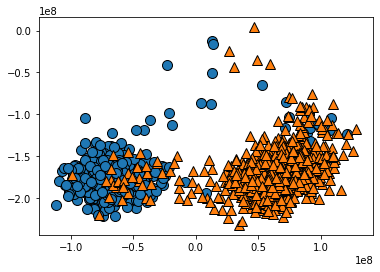

In [27]:
index = 1
train_index, test_index = index_splits_2_3_0_both_r[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

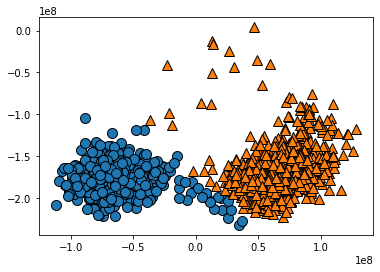

In [28]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_r[index][:])

In [29]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_2_3_0_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9079456946055394, 0.9109455086777182, 0.9130066288726564, 0.9180266593981213, 0.916002594362925, 0.9180591281117819, 0.9190688189280661, 0.9099657957039387, 0.9129945898895508, 0.914004952233985]
Folkes test array: [0.9507700184816734, 0.9135720716218371, 0.9136666842841178, 0.896387331987207, 0.9044291956567168, 0.8773777467866656, 0.8950265187257644, 0.9507700184816734, 0.9133451732145137, 0.9224555735056542]
Assignment fidelity train array: [0.9758333333333333, 0.9766666666666667, 0.9772222222222222, 0.9786111111111111, 0.9780555555555556, 0.9786111111111111, 0.9788888888888889, 0.9763888888888889, 0.9772222222222222, 0.9775]
Assignment fidelity test array: [0.9875, 0.9775, 0.9775, 0.9725, 0.975, 0.9675, 0.9725, 0.9875, 0.9775, 0.98]


In [30]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.914 (±0.0036) with 10 splits
Train score 0.914 (±0.0221) with 10 splits


In [31]:
report_cv_score(assignment_train, assignment_test)

Test score 0.977 (±0.0010) with 10 splits
Train score 0.978 (±0.0060) with 10 splits


In [33]:
qkmeans_2_3_0_both_r_2 = qkmeans_0_both_r
y_pred_2_3_0_both_train_r_2 = y_pred_0_both_train_r
y_pred_2_3_0_both_test_r_2 = y_pred_0_both_test_r
index_splits_2_3_0_both_r_2 = index_splits_2_3_0_both_r
%store index_splits_2_3_0_both_r_2
%store qkmeans_2_3_0_both_r_2
%store y_pred_2_3_0_both_train_r_2
%store y_pred_2_3_0_both_test_r_2

Stored 'index_splits_2_3_0_both_r_2' (list)
Stored 'qkmeans_2_3_0_both_r_2' (list)
Stored 'y_pred_2_3_0_both_train_r_2' (list)
Stored 'y_pred_2_3_0_both_test_r_2' (list)


In [34]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_p = []
y_pred_1_both_train_p = []
y_pred_1_both_test_p = []

index_splits_2_3_1_both_p = []
for train_index, test_index in split_1_both:
    index_splits_2_3_1_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-27 00:01:49,974: Credentials are already in use. The existing account in the session will be replaced.


In [35]:
for i in range(len(index_splits_2_3_1_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_2_3_1_both_p[i]
    qkmeans_1_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_p[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_p.append(qkmeans_1_both_p[-1].labels_)
    y_pred_1_both_test_p.append(qkmeans_1_both_p[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0     0.528197  0.042341
1     0.656990 -1.725514
2    -1.299455 -0.814410
3     0.383299  2.682185
4    -0.760469 -1.299282
...        ...       ...
1795  1.645229  1.658374
1796 -0.998817 -1.245658
1797  1.162079 -0.291761
1798  1.258449  1.028896
1799  1.391077 -0.328534

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.25719792e+000 7.88081068e-001]
 [4.64421707e-322 1.97626258e-323]]
Cluster center 1
Centers are: [[ 1.25719792  0.78808107]
 [-0.81945022 -0.42809165]]
Iteration 0
Old centroids are [[ 1.25719792  0.78808107]
 [-0.81945022 -0.42809165]]
New centroids are           0         1
0  0.917019  0.412704
1 -0.871317 -0.392135
Centers are [0 1 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.917019  0.412704
1 -0.871317 -0.392135
New centroids are           0         1
0  0.948939  0.357044
1 -0.895651 -0.336994
Centers are [0 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.94893

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:              0         1
0     1.067684  2.931254
1     0.976081 -0.843388
2    -0.694593 -0.941461
3    -0.089558  0.107945
4    -1.134073 -1.483473
...        ...       ...
1795  1.153037  2.198314
1796 -0.453496 -0.090534
1797  1.284722  0.187846
1798  1.186293 -0.268465
1799  0.815227  1.076508

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.02912587  0.26676735]
 [-0.91385259 -0.28442312]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.02912587  0.26676735]
 [-0.75749523 -1.06426242]]
Iteration 0
Old centroids are [[ 1.02912587  0.26676735]
 [-0.75749523 -1.06426242]]
New centroids are           0         1
0  0.881543  0.471334
1 -0.850747 -0.454868
Centers are [0 0 1 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.881543  0.471334
1 -0.850747 -0.454868
New centroids are           0         1
0  0.940714  0.408408
1 -0.878067 -0.381210
Centers are [0 0 1 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.940714  0.408408
1 -0.878067 -0.381210
New centroids are           0         1
0  0.965570  0.358435
1 -0.899265 -0.333821
Centers are [0 0 1 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0  0.965570  0.358435
1 -0.899265 -0.333821
New centroids are           0         1
0  0.973769  0.339153
1 -0.906901 -0.315863
Centers are [0 0 1 ... 0 0 0]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:              0         1
0     1.124663  0.993067
1    -0.602375  0.177101
2     1.111764  1.699852
3     1.041849 -1.280425
4    -0.867116 -1.999763
...        ...       ...
1795 -0.699843 -0.809769
1796  0.486143 -0.753031
1797 -1.283172 -2.309346
1798  1.496394  1.113592
1799  1.263887  1.537236

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.44443089  0.20684395]
 [-0.90690078 -0.31586343]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.44443089  0.20684395]
 [-0.59209213 -0.34898653]]
Iteration 0
Old centroids are [[ 1.44443089  0.20684395]
 [-0.59209213 -0.34898653]]
New centroids are           0         1
0  0.978152  0.319184
1 -0.910983 -0.297266
Centers are [0 1 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.978152  0.319184
1 -0.910983 -0.297266
New centroids are           0         1
0  0.981083  0.310241
1 -0.913712 -0.288937
Centers are [0 1 0 ... 1 0 0]
Split 3
Data is:              0         1
0    -0.516682 -0.447121
1     0.878986 -0.118023
2     0.921328  2.241993
3    -0.986091 -0.904431
4    -0.759583 -0.541188
...        ...       ...
1795 -1.064385 -0.436811
1796  0.790560 -0.915256
1797  0.873792  0.238182
1798 -0.888144 -0.154852
1799  0.839816 -0.107863

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.10947179 -0.51577308]
 [-0.91371211 -0.2889368 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.10947179 -0.51577308]
 [ 0.54441223  0.06021002]]
Iteration 0
Old centroids are [[-1.10947179 -0.51577308]
 [ 0.54441223  0.06021002]]
New centroids are           0         1
0 -0.911163 -0.271282
1  0.989293  0.294543
Centers are [0 1 1 ... 1 0 1]
Iteration 1
Old centroids are           0         1
0 -0.911163 -0.271282
1  0.989293  0.294543
New centroids are           0         1
0 -0.911693 -0.272967
1  0.987668  0.295715
Centers are [0 1 1 ... 1 0 1]
Iteration 2
Old centroids are           0         1
0 -0.911693 -0.272967
1  0.987668  0.295715
New centroids are           0         1
0 -0.909698 -0.276049
1  0.987702  0.299719
Centers are [0 1 1 ... 1 0 1]
Iteration 3
Old centroids are           0         1
0 -0.909698 -0.276049
1  0.987702  0.299719
New centroids are           0         1
0 -0.910039 -0.271539
1  0.990275  0.295479
Centers are [0 1 1 ... 1 0 1]
Iteration 4
Old centroids are           0         1
0 -0.910039 -0.271539
1  0.990275 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.0477931  -0.45562206]
 [ 1.37455121  0.26271918]]
Iteration 0
Old centroids are [[-1.0477931  -0.45562206]
 [ 1.37455121  0.26271918]]
New centroids are           0         1
0 -0.920495 -0.298937
1  0.973094  0.316019
Centers are [1 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.920495 -0.298937
1  0.973094  0.316019
New centroids are           0         1
0 -0.918524 -0.300703
1  0.973173  0.318594
Centers are [1 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.918524 -0.300703
1  0.973173  0.318594
New centroids are           0         1
0 -0.924634 -0.302499
1  0.966663  0.316249
Centers are [1 0 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0 -0.924634 -0.302499
1  0.966663  0.316249
New centroids are           0         1
0 -0.915959 -0.305125
1  0.972616  0.323998
Centers are [1 0 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0 -0.915959 -0.305125
1  0.972616 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:              0         1
0    -0.972763 -0.805827
1    -1.001492 -1.820687
2    -1.366686 -0.862873
3     1.045205  1.296979
4    -0.679397  0.011483
...        ...       ...
1795  0.449566  1.162956
1796 -1.001441 -0.907888
1797  0.673976 -0.277018
1798 -0.821658 -2.420581
1799 -0.928153 -0.558378

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.02914698 -0.0564401 ]
 [ 0.97441072  0.31860571]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.02914698 -0.0564401 ]
 [ 1.07536822  1.16913736]]
Iteration 0
Old centroids are [[-0.02914698 -0.0564401 ]
 [ 1.07536822  1.16913736]]
New centroids are           0         1
0 -0.665161 -0.642910
1  0.686182  0.663228
Centers are [0 0 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.665161 -0.642910
1  0.686182  0.663228
New centroids are           0         1
0 -0.777657 -0.556378
1  0.789848  0.565100
Centers are [0 0 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.777657 -0.556378
1  0.789848  0.565100
New centroids are           0         1
0 -0.848438 -0.462337
1  0.871369  0.474832
Centers are [0 0 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.848438 -0.462337
1  0.871369  0.474832
New centroids are           0         1
0 -0.890397 -0.394991
1  0.916496  0.406570
Centers are [0 0 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.890397 -0.394991
1  0.916496 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:              0         1
0    -0.706954  0.170269
1     0.766725  1.215596
2     0.883686  0.168961
3    -0.992250 -0.742605
4    -1.259993 -0.130032
...        ...       ...
1795 -0.846086  1.181959
1796 -1.332865  0.535770
1797 -1.298572  0.243494
1798  1.363890  0.401030
1799  0.664953 -1.145104

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.61131905 0.28794924]
 [0.97064083 0.31943071]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.61131905  0.28794924]
 [-0.88700266 -0.4592627 ]]
Iteration 0
Old centroids are [[ 0.61131905  0.28794924]
 [-0.88700266 -0.4592627 ]]
New centroids are           0         1
0  0.948243  0.389217
1 -0.879206 -0.360880
Centers are [1 0 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.948243  0.389217
1 -0.879206 -0.360880
New centroids are           0         1
0  0.966628  0.354961
1 -0.892272 -0.327656
Centers are [1 0 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0  0.966628  0.354961
1 -0.892272 -0.327656
New centroids are           0         1
0  0.979793  0.326661
1 -0.902413 -0.300863
Centers are [1 0 0 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0  0.979793  0.326661
1 -0.902413 -0.300863
New centroids are           0         1
0  0.977801  0.317604
1 -0.908632 -0.295137
Centers are [1 0 0 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0  0.977801  0.317604
1 -0.908632 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.70302647  1.58351119]
 [-0.55603318  0.06401504]]
Iteration 0
Old centroids are [[ 0.70302647  1.58351119]
 [-0.55603318  0.06401504]]
New centroids are           0         1
0  0.926926  0.422556
1 -0.861356 -0.392665
Centers are [0 1 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.926926  0.422556
1 -0.861356 -0.392665
New centroids are           0         1
0  0.961022  0.363682
1 -0.887097 -0.335706
Centers are [0 1 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.961022  0.363682
1 -0.887097 -0.335706
New centroids are           0         1
0  0.977148  0.325765
1 -0.901983 -0.300706
Centers are [0 1 1 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0  0.977148  0.325765
1 -0.901983 -0.300706
New centroids are           0         1
0  0.987580  0.315322
1 -0.901521 -0.287844
Centers are [0 1 1 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0  0.987580  0.315322
1 -0.901521 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:              0         1
0    -1.428615 -0.139425
1    -1.150471 -0.243170
2     0.375490 -1.342917
3     0.646086 -0.522110
4    -0.716260 -0.365705
...        ...       ...
1795  1.051992 -0.390338
1796  1.476035  1.196086
1797  1.021253  1.600560
1798  0.910816 -0.546049
1799  0.555092  0.438548

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.8598446  -0.14278859]
 [-0.89167472 -0.32091559]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.8598446  -0.14278859]
 [ 1.60670014  1.82575062]]
Iteration 0
Old centroids are [[-0.8598446  -0.14278859]
 [ 1.60670014  1.82575062]]
New centroids are           0         1
0 -0.894009 -0.387399
1  0.908024  0.393472
Centers are [0 0 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0 -0.894009 -0.387399
1  0.908024  0.393472
New centroids are           0         1
0 -0.916307 -0.328987
1  0.941072  0.337878
Centers are [0 0 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.916307 -0.328987
1  0.941072  0.337878
New centroids are           0         1
0 -0.925617 -0.298322
1  0.956994  0.308435
Centers are [0 0 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.925617 -0.298322
1  0.956994  0.308435
New centroids are           0         1
0 -0.931747 -0.286877
1  0.959059  0.295286
Centers are [0 0 0 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0 -0.931747 -0.286877
1  0.959059 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


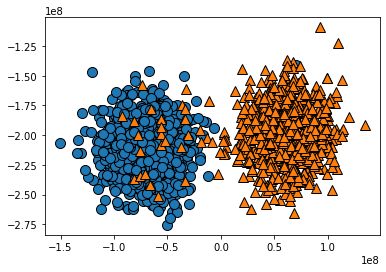

In [36]:
index = 1
train_index, test_index = index_splits_2_3_1_both_p[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

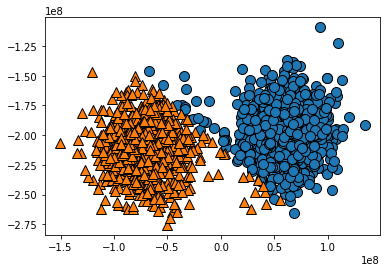

In [37]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_p[index][:])

In [38]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_2_3_1_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9522794807360541, 0.9459640713650446, 0.9565242700481144, 0.9586653378646457, 0.9533328246475732, 0.9491032436336242, 0.9491223459205408, 0.9554816196482431, 0.92933818704948, 0.9586305242918081]
Folkes test array: [0.9604566706326644, 0.9412240143514301, 0.9412240143514301, 0.9413203645373472, 0.9606583701324769, 0.9420634156217469, 0.9899520436724212, 0.9413602015113349, 0.9800040595779269, 0.9713695825849954]
Assignment fidelity train array: [0.9877777777777778, 0.9861111111111112, 0.9888888888888889, 0.9894444444444445, 0.9880555555555556, 0.9869444444444444, 0.9869444444444444, 0.9886111111111111, 0.9816666666666667, 0.9894444444444445]
Assignment fidelity test array: [0.99, 0.985, 0.985, 0.985, 0.99, 0.985, 0.9975, 0.985, 0.995, 0.9925]


In [39]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.951 (±0.0082) with 10 splits
Train score 0.957 (±0.0175) with 10 splits


In [40]:
report_cv_score(assignment_train, assignment_test)

Test score 0.987 (±0.0022) with 10 splits
Train score 0.989 (±0.0045) with 10 splits


In [41]:
qkmeans_2_3_1_both_p_2 = qkmeans_1_both_p
y_pred_2_3_1_both_train_p_2 = y_pred_1_both_train_p
y_pred_2_3_1_both_test_p_2 = y_pred_1_both_test_p
index_splits_2_3_1_both_p_2 = index_splits_2_3_1_both_p
%store index_splits_2_3_1_both_p_2
%store qkmeans_2_3_1_both_p_2
%store y_pred_2_3_1_both_train_p_2
%store y_pred_2_3_1_both_test_p_2

Stored 'index_splits_2_3_1_both_p_2' (list)
Stored 'qkmeans_2_3_1_both_p_2' (list)
Stored 'y_pred_2_3_1_both_train_p_2' (list)
Stored 'y_pred_2_3_1_both_test_p_2' (list)


In [42]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_r = []
y_pred_1_both_train_r = []
y_pred_1_both_test_r = []

index_splits_2_3_1_both_r = []
for train_index, test_index in split_1_both:
    index_splits_2_3_1_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-27 03:36:42,927: Credentials are already in use. The existing account in the session will be replaced.


In [53]:
for i in range(len(index_splits_2_3_1_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_2_3_1_both_r[i]
    qkmeans_1_both_r.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_r[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_r.append(qkmeans_1_both_r[-1].labels_)
    y_pred_1_both_test_r.append(qkmeans_1_both_r[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0    -0.667550 -0.697131
1    -0.907987 -0.433740
2     1.099529 -1.268526
3     0.956265 -0.482667
4     0.514214  1.278613
...        ...       ...
1795 -0.909583 -0.083997
1796  0.926957 -0.098616
1797  1.159133 -1.485526
1798  1.187189  0.227571
1799 -1.256178  0.082367

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-7.62071944e-001 -5.82311044e-001]
 [ 9.88131292e-324  4.74303020e-322]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.76207194 -0.58231104]
 [ 1.09211439  0.90496741]]
Iteration 0
Old centroids are [[-0.76207194 -0.58231104]
 [ 1.09211439  0.90496741]]
New centroids are           0         1
0 -0.818756 -0.493671
1  0.848395  0.511541
Centers are [0 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0 -0.818756 -0.493671
1  0.848395  0.511541
New centroids are           0         1
0 -0.870555 -0.410749
1  0.912152  0.430375
Centers are [0 0 1 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0 -0.870555 -0.410749
1  0.912152  0.430375
New centroids are           0         1
0 -0.896760 -0.350944
1  0.948003  0.370998
Centers are [0 0 1 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0 -0.896760 -0.350944
1  0.948003  0.370998
New centroids are           0         1
0 -0.917354 -0.312396
1  0.963327  0.328052
Centers are [0 0 1 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0 -0.917354 -0.312396
1  0.963327 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1


KeyboardInterrupt: 

In [ ]:
index = 2
train_index, test_index = index_splits_2_3_1_both_r[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

In [ ]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_r[index][:])

In [ ]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_2_3_1_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

In [ ]:
report_cv_score(fowlkes_train, fowlkes_test)

In [ ]:
report_cv_score(assignment_train, assignment_test)

In [ ]:
qkmeans_2_3_1_both_r_2 = qkmeans_1_both_r
y_pred_2_3_1_both_train_r_2 = y_pred_1_both_train_r
y_pred_2_3_1_both_test_r_2 = y_pred_1_both_test_r
index_splits_2_3_1_both_r_2 = index_splits_2_3_1_both_r
%store index_splits_2_3_1_both_r_2
%store qkmeans_2_3_1_both_r_2
%store y_pred_2_3_1_both_train_r_2
%store y_pred_2_3_1_both_test_r_2

## Quantum cross validation correlation analysis

Here we sort assignment fidelities from all four trained QML models to observe the differences between scores obtained from qubits trained with single schedules (|00> and |01> with the 0 qubit as the least significant bit) and both schedules (|00>, |01>, |10> and |11>)

### Folkes Mallows train scores

|        | Q2            | Q3            |
|--------|---------------|---------------|
| Single | 0.886 ±0.0332 | 0.912 ±0.0295 |
| Both   | 0.913 ±0.0451 | 0.955 ±0.0232 |

### Folkes Mallows test scores

|        | Q2            | Q3            |
|--------|---------------|---------------|
| Single | 0.907 ±0.0048 | 0.915 ±0.0036 |
| Both   | 0.900 ±0.0939 | 0.951 ±0.0093 |

### Assignment fidelity train scores

|        | Q2            | Q3            |
|--------|---------------|---------------|
| Single | 0.977 ±0.0078 | 0.990 ±0.0050 |
| Both   | 0.978 ±0.0060 | 0.989 ±0.0045 |

### Assignment fidelity test scores

|        | Q2            | Q3            |
|--------|---------------|---------------|
| Single | 0.975 ±0.0014 | 0.987 ±0.0021 |
| Both   | 0.977 ±0.0010 | 0.987 ±0.0022 |

In [ ]:
import pickle

data = {}
data['index_splits_2_3_0_single_p'] = index_splits_2_3_0_single_p
data['qkmeans_2_3_0_single_p'] = qkmeans_2_3_0_single_p
data['y_pred_2_3_0_single_train_p'] = y_pred_2_3_0_single_train_p
data['y_pred_2_3_0_single_test_p'] = y_pred_2_3_0_single_test_p

with open('data_2_3_0_single_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_1_single_p'] = index_splits_2_3_1_single_p
data['qkmeans_2_3_1_single_p'] = qkmeans_2_3_1_single_p
data['y_pred_2_3_1_single_train_p'] = y_pred_2_3_1_single_train_p
data['y_pred_2_3_1_single_test_p'] = y_pred_2_3_1_single_test_p

with open('data_2_3_1_single_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_0_both_p'] = index_splits_2_3_0_both_p
data['qkmeans_2_3_0_both_p'] = qkmeans_2_3_0_both_p
data['y_pred_2_3_0_both_train_p'] = y_pred_2_3_0_both_train_p
data['y_pred_2_3_0_both_test_p'] = y_pred_2_3_0_both_test_p

with open('data_2_3_0_both_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_1_both_p'] = index_splits_2_3_1_both_p
data['qkmeans_2_3_1_both_p'] = qkmeans_2_3_1_both_p
data['y_pred_2_3_1_both_train_p'] = y_pred_2_3_1_both_train_p
data['y_pred_2_3_1_both_test_p'] = y_pred_2_3_1_both_test_p

with open('data_2_3_1_both_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_0_single_r'] = index_splits_2_3_0_single_r
data['qkmeans_2_3_0_single_r'] = qkmeans_2_3_0_single_r
data['y_pred_2_3_0_single_train_r'] = y_pred_2_3_0_single_train_r
data['y_pred_2_3_0_single_test_r'] = y_pred_2_3_0_single_test_r

with open('data_2_3_0_single_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_1_single_r'] = index_splits_2_3_1_single_r
data['qkmeans_2_3_1_single_r'] = qkmeans_2_3_1_single_r
data['y_pred_2_3_1_single_train_r'] = y_pred_2_3_1_single_train_r
data['y_pred_2_3_1_single_test_r'] = y_pred_2_3_1_single_test_r

with open('data_2_3_1_single_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_0_both_r'] = index_splits_2_3_0_both_r
data['qkmeans_2_3_0_both_r'] = qkmeans_2_3_0_both_r
data['y_pred_2_3_0_both_train_r'] = y_pred_2_3_0_both_train_r
data['y_pred_2_3_0_both_test_r'] = y_pred_2_3_0_both_test_r

with open('data_2_3_0_both_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_2_3_1_both_r'] = index_splits_2_3_1_both_r
data['qkmeans_2_3_1_both_r'] = qkmeans_2_3_1_both_r
data['y_pred_2_3_1_both_train_r'] = y_pred_2_3_1_both_train_r
data['y_pred_2_3_1_both_test_r'] = y_pred_2_3_1_both_test_r

with open('data_2_3_1_both_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# Qubits 3 and 4

In [5]:
data_00_0 = pd.read_csv('data/dataset_bogota_3_4_00_0.csv')
data_00_1 = pd.read_csv('data/dataset_bogota_3_4_00_1.csv')
data_01_0 = pd.read_csv('data/dataset_bogota_3_4_01_0.csv')
data_01_1 = pd.read_csv('data/dataset_bogota_3_4_01_1.csv')
data_10_0 = pd.read_csv('data/dataset_bogota_3_4_10_0.csv')
data_10_1 = pd.read_csv('data/dataset_bogota_3_4_10_1.csv')
data_11_0 = pd.read_csv('data/dataset_bogota_3_4_11_0.csv')
data_11_1 = pd.read_csv('data/dataset_bogota_3_4_11_1.csv')

In [55]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_p = []
y_pred_0_single_train_p = []
y_pred_0_single_test_p = []

index_splits_0_single_p = []
for train_index, test_index in split_0_single:
    index_splits_0_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-08-27 13:31:58,255: Credentials are already in use. The existing account in the session will be replaced.


In [56]:
for i in range(len(index_splits_0_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_p[i]
    qkmeans_0_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_p[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_p.append(qkmeans_0_single_p[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

Split 0
Data is:             0         1
0    0.501973 -1.333679
1    0.689706  1.180506
2    1.228442  0.037077
3    1.029673  2.381077
4    0.909902  0.584049
..        ...       ...
895 -0.743378  0.754186
896 -1.308056 -0.660169
897  1.134465  0.439488
898  1.018258 -0.216657
899 -1.182017 -0.587062

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[0.32504261 0.29500113]
 [0.97082365 0.31036444]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.32504261  0.29500113]
 [-0.60681809 -0.37887866]]
Iteration 0
Old centroids are [[ 0.32504261  0.29500113]
 [-0.60681809 -0.37887866]]
New centroids are           0         1
0  0.916339  0.470893
1 -0.838352 -0.430817
Centers are [1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0
 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

Old centroids are           0         1
0  0.973201  0.354151
1 -0.902347 -0.328367
New centroids are           0         1
0  0.978183  0.339377
1 -0.906966 -0.314669
Centers are [0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:             0         1
0    0.791448  0.876269
1    1.079886 -0.805654
2   -0.947996 -0.547081
3    1.241826 -0.155847
4    0.616825  0.873016
..        ...       ...
895  0.638689  1.507878
896 -0.836066 -0.076015
897  1.451404 -0.946399
898 -1.129341 -0.238577
899 -0.708296 -0.301859

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.55525123 -0.78588297]
 [-0.90696619 -0.31466857]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.55525123 -0.78588297]
 [ 1.13363765  0.31549047]]
Iteration 0
Old centroids are [[-1.55525123 -0.78588297]
 [ 1.13363765  0.31549047]]
New centroids are           0         1
0 -0.908290 -0.359258
1  0.953808  0.377262
Centers are [1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 

Old centroids are           0         1
0 -0.925297 -0.351421
1  0.946091  0.359318
New centroids are           0         1
0 -0.917747 -0.353513
1  0.950969  0.366310
Centers are [1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:             0         1
0    1.069384 -0.789964
1    1.149687 -0.584480
2    0.779439  0.736441
3    0.938838  1.062243
4    1.112260 -1.186650
..        ...       ...
895 -0.832989 -0.056412
896  0.904171  0.358368
897 -0.650416  0.357358
898  0.653311 -1.511338
899  0.645188  1.266454

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.45341436  0.06264769]
 [ 0.95068715  0.36721958]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.45341436  0.06264769]
 [ 0.85797456 -0.0295178 ]]
Iteration 0
Old centroids are [[-0.45341436  0.06264769]
 [ 0.85797456 -0.0295178 ]]
New centroids are           0         1
0 -0.932966 -0.280901
1  0.966738  0.291069
Centers are [1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 

Old centroids are           0         1
0 -0.922572 -0.356534
1  0.943304  0.364546
New centroids are           0         1
0 -0.922595 -0.348363
1  0.947530  0.357778
Centers are [1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0

Old centroids are           0         1
0 -0.921812 -0.352265
1  0.946726  0.361786
New centroids are           0         1
0 -0.919402 -0.357685
1  0.944250  0.367353
Centers are [1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 3
Data is:             0         1
0   -0.898766  1.109320
1    0.749021 -0.089328
2    1.528337  1.284371
3    0.491406  1.018893
4    1.091900  1.206007
..        ...       ...
895 -0.962993  0.749382
896 -0.716891  0.789895
897  0.642772  0.692332
898  1.154533 -0.553035
899  0.833986 -0.623304

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.70640152 -0.19622006]
 [ 0.94425047  0.3673526 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.70640152 -0.19622006]
 [-0.46000272  0.17191334]]
Iteration 0
Old centroids are [[ 0.70640152 -0.19622006]
 [-0.46000272  0.17191334]]
New centroids are           0         1
0  0.953383  0.202705
1 -0.899845 -0.191322
Centers are [1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:             0         1
0    0.921847  0.346360
1   -1.080771  0.314243
2   -0.882246  0.933938
3   -0.773671 -0.257597
4    1.130260 -1.200872
..        ...       ...
895  0.675327  0.403148
896  1.329219 -0.351365
897 -0.552589 -3.384379
898  0.668223  0.971342
899 -1.062412 -0.070296

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.04959245 -1.39509707]
 [-0.91579006 -0.33532458]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.04959245 -1.39509707]
 [-0.40773367  0.59263777]]
Iteration 0
Old centroids are [[-1.04959245 -1.39509707]
 [-0.40773367  0.59263777]]
New centroids are           0         1
0 -0.251020 -0.800537
1  0.252138  0.804103
Centers are [1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 5
Data is:             0         1
0   -0.825785 -0.433524
1    0.799492  0.021478
2    1.138909  0.317213
3    0.603264  0.532301
4   -1.039951 -0.256244
..        ...       ...
895 -0.894853  1.061349
896 -1.011532 -0.042173
897  0.484562 -1.355964
898  0.674293  0.060178
899 -0.912154  2.243493

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.82123402  0.49208067]
 [ 0.44347437  0.77213903]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.82123402  0.49208067]
 [ 1.03757952  0.26244003]]
Iteration 0
Old centroids are [[-0.82123402  0.49208067]
 [ 1.03757952  0.26244003]]
New centroids are           0         1
0 -0.921796 -0.265217
1  0.976640  0.280997
Centers are [0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 

Old centroids are           0         1
0 -0.918437 -0.346656
1  0.951684  0.359204
New centroids are           0         1
0 -0.911847 -0.351841
1  0.953295  0.367834
Centers are [0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0

Old centroids are           0         1
0 -0.912896 -0.343870
1  0.958645  0.361102
New centroids are           0         1
0 -0.922583 -0.340827
1  0.951739  0.351598
Centers are [0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 6
Data is:             0         1
0    0.658807  0.373672
1    0.891757 -0.772325
2    0.949134 -0.319560
3    0.964060  0.696052
4   -0.648327  0.732161
..        ...       ...
895  1.064151  1.400281
896  1.126878 -0.536558
897  0.969991 -1.424754
898 -0.820414 -0.536138
899 -0.851584 -1.236189

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.67327974  0.14484773]
 [ 0.95752851  0.36379396]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.67327974  0.14484773]
 [ 1.30274475  1.85155886]]
Iteration 0
Old centroids are [[-0.67327974  0.14484773]
 [ 1.30274475  1.85155886]]
New centroids are           0         1
0 -0.910047 -0.354303
1  0.955654  0.372058
Centers are [1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:             0         1
0   -1.104540  0.897187
1    0.686026  1.709687
2    0.303960  0.281170
3    0.683984 -1.859308
4    1.652520 -0.988252
..        ...       ...
895 -0.920926 -0.915624
896  1.077256  1.035657
897  0.795537  0.908583
898  0.849757 -1.634336
899  1.169350  1.929769

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 0.83256449 -2.04145211]
 [ 0.95763861  0.3675334 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.83256449 -2.04145211]
 [ 1.16023635  0.78931928]]
Iteration 0
Old centroids are [[ 0.83256449 -2.04145211]
 [ 1.16023635  0.78931928]]
New centroids are           0         1
0 -0.425515 -0.769251
1  0.425515  0.769251
Centers are [1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 

Old centroids are           0         1
0 -0.880306 -0.385228
1  0.945214  0.413632
New centroids are           0         1
0 -0.914470 -0.354943
1  0.947573  0.367792
Centers are [0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:             0         1
0    0.885000  0.564168
1    0.694899  0.317528
2   -1.269154  0.429072
3   -1.017808 -0.571868
4    0.599531 -0.641510
..        ...       ...
895  1.492197  0.784100
896 -1.309712  1.849692
897 -0.635783 -0.386847
898 -0.740746 -2.028281
899  0.812273  0.269208

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.16334585 1.90754797]
 [0.95913401 0.35192374]]
Cluster center 1
Centers are: [[ 1.16334585  1.90754797]
 [-0.77144476 -1.02652589]]
Iteration 0
Old centroids are [[ 1.16334585  1.90754797]
 [-0.77144476 -1.02652589]]
New centroids are           0         1
0  0.674601  0.668755
1 -0.651034 -0.645393
Centers are [0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 0 0 1 1 0 1 1 0 

Old centroids are           0         1
0  0.931677  0.400718
1 -0.895141 -0.385004
New centroids are           0         1
0  0.939995  0.356255
1 -0.923431 -0.349977
Centers are [0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1

Split 9
Data is:             0         1
0   -0.856453  0.357100
1   -0.829189 -0.537255
2   -0.790727 -0.545200
3    0.651515  0.720432
4   -0.819984  1.519190
..        ...       ...
895 -0.897840 -1.339146
896  1.164055  1.959144
897 -0.827056  0.530376
898  1.084968  1.205061
899 -1.470388  1.014209

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.35753931 -0.09526997]
 [-0.9269534  -0.33487208]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.35753931 -0.09526997]
 [ 0.76142948  0.70561636]]
Iteration 0
Old centroids are [[-0.35753931 -0.09526997]
 [ 0.76142948  0.70561636]]
New centroids are           0         1
0 -0.896478 -0.370477
1  0.945601  0.390777
Centers are [0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


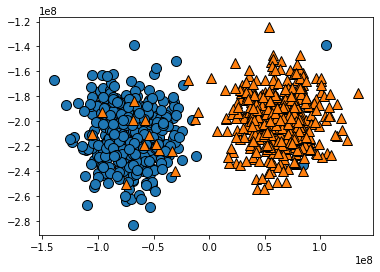

In [57]:
index = 3
train_index, test_index = index_splits_0_single_p[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

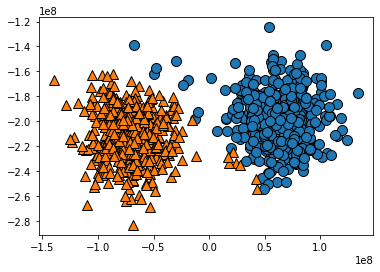

In [58]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_p[index][:])

In [59]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_single_train[train_index][:],y_0_single_train[train_index][:],y_pred_0_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_single_train[test_index][:],y_0_single_train[test_index][:],y_pred_0_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9501258192820525, 0.9354328340650137, 0.9333498279132789, 0.9417000549698626, 0.6819824016272843, 0.9416797709444504, 0.9396008947535845, 0.9458744642985255, 0.9458733891377774, 0.9437775315205333]
Folkes test array: [0.9262551013292335, 0.9217603911980441, 0.9798166970263985, 0.9045395369416043, 0.6767676767676767, 0.9408219495368315, 0.9411066006870935, 0.9407227054619202, 0.940672958818103, 0.9030810226754383]
Assignment fidelity train array: [0.9872222222222222, 0.9833333333333333, 0.9827777777777778, 0.985, 0.9011111111111111, 0.985, 0.9844444444444445, 0.9861111111111112, 0.9861111111111112, 0.9855555555555555]
Assignment fidelity test array: [0.98, 0.98, 0.995, 0.975, 0.9, 0.985, 0.985, 0.985, 0.985, 0.975]


In [60]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.916 (±0.0781) with 10 splits
Train score 0.908 (±0.0797) with 10 splits


In [61]:
report_cv_score(assignment_train, assignment_test)

Test score 0.977 (±0.0252) with 10 splits
Train score 0.974 (±0.0254) with 10 splits


In [62]:
index_splits_3_4_0_single_p_2 = index_splits_0_single_p
qkmeans_3_4_0_single_p_2 = qkmeans_0_single_p
y_pred_3_4_0_single_train_p_2 = y_pred_0_single_train_p
y_pred_3_4_0_single_test_p_2 = y_pred_0_single_test_p
%store index_splits_3_4_0_single_p_2
%store qkmeans_3_4_0_single_p_2
%store y_pred_3_4_0_single_train_p_2
%store y_pred_3_4_0_single_test_p_2

Stored 'index_splits_3_4_0_single_p_2' (list)
Stored 'qkmeans_3_4_0_single_p_2' (list)
Stored 'y_pred_3_4_0_single_train_p_2' (list)
Stored 'y_pred_3_4_0_single_test_p_2' (list)


In [ ]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_single = np.concatenate((data_00_0.values[:,:2],data_10_0.values[:,:2]))
y_0_single = np.concatenate((data_00_0.values[:,2],data_10_0.values[:,2]))

X_0_single_train, X_0_single_test, y_0_single_train, y_0_single_test = train_test_split(X_0_single, y_0_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_0_single = cv.split(X_0_single_train)
qkmeans_0_single_r = []
y_pred_0_single_train_r = []
y_pred_0_single_test_r = []

index_splits_0_single_r = []
for train_index, test_index in split_0_single:
    index_splits_0_single_r.append((train_index,test_index))

In [ ]:
for i in range(len(index_splits_0_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_0_single_r[i]
    qkmeans_0_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_single_r[-1].fit(X_0_single_train[train_index])
    y_pred_0_single_train_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[train_index])))
    y_pred_0_single_test_r.append(qkmeans_0_single_r[-1].predict(pd.DataFrame(X_0_single_train[test_index])))

In [ ]:
index = 9
train_index, test_index = index_splits_0_single_r[index]
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_0_single_train[train_index][:])

In [ ]:
mglearn.discrete_scatter(X_0_single_train[train_index][:,0],X_0_single_train[train_index][:,1],y_pred_0_single_train_r[index][:])

In [ ]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_0_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(y_0_single_train[train_index][:],y_pred_0_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(y_0_single_train[test_index][:],y_pred_0_single_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

In [ ]:
report_cv_score(fowlkes_train, fowlkes_test)

In [ ]:
report_cv_score(assignment_train, assignment_test)

In [ ]:
index_splits_3_4_0_single_r = index_splits_0_single_r
qkmeans_3_4_0_single_r = qkmeans_0_single_r
y_pred_3_4_0_single_train_r = y_pred_0_single_train_r
y_pred_3_4_0_single_test_r = y_pred_0_single_test_r
# index_splits_3_4_0_single_r
# qkmeans_3_4_0_single_r
# y_pred_3_4_0_single_train_r
# y_pred_3_4_0_single_test_r

In [9]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_p = []
y_pred_1_single_train_p = []
y_pred_1_single_test_p = []

index_splits_1_single_p = []
for train_index, test_index in split_1_single:
    index_splits_1_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-16 10:09:42,513: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
for i in range(len(index_splits_1_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_single_p[i]
    qkmeans_1_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_p[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_p.append(qkmeans_1_single_p[-1].labels_)
    y_pred_1_single_test_p.append(qkmeans_1_single_p[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0    1.344046  1.092572
1   -1.509575 -2.105613
2   -1.340804 -0.223740
3   -0.958038 -0.572778
4    0.843996  0.136526
..        ...       ...
895  1.231336  0.744017
896 -1.179756  1.274126
897 -0.226574  0.171634
898 -0.652156 -1.363319
899 -1.336328 -0.640743

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.13998764  0.93415009]
 [ 0.77567519 -0.75191271]]
Cluster center 1
Centers are: [[ 1.13998764  0.93415009]
 [-1.3408043  -0.22374032]]
Iteration 0
Old centroids are [[ 1.13998764  0.93415009]
 [-1.3408043  -0.22374032]]
New centroids are           0         1
0  0.891258  0.214953
1 -0.844959 -0.203786
Centers are [0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 0 0 1 1 0 0 

Old centroids are           0         1
0  0.946183  0.018490
1 -0.909078 -0.017765
New centroids are           0         1
0  0.946064  0.018948
1 -0.908964 -0.018205
Centers are [0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.96732594  0.33874641]
 [ 0.76006015  0.00950754]]
Iteration 0
Old centroids are [[-0.96732594  0.33874641]
 [ 0.76006015  0.00950754]]
New centroids are           0         1
0 -0.914638 -0.020126
1  0.935192  0.020578
Centers are [0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:             0         1
0   -0.947363 -0.347525
1    1.066895  1.763941
2   -1.331007  0.658332
3    0.931365  1.590717
4   -0.672154 -0.169202
..        ...       ...
895  0.296039  0.548386
896  1.079891  0.345429
897  0.777099  0.187933
898 -1.362143  0.129784
899 -0.425101  0.232382

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.56717466 0.22914565]
 [0.93811341 0.05300858]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.56717466  0.22914565]
 [-0.36134958 -0.20815546]]
Iteration 0
Old centroids are [[ 1.56717466  0.22914565]
 [-0.36134958 -0.20815546]]
New centroids are           0         1
0  0.929406  0.146361
1 -0.869444 -0.136918
Centers are [1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 

Cluster center 1
Centers are: [[ 1.10618753 -0.59226901]
 [-0.81633544 -0.04065711]]
Iteration 0
Old centroids are [[ 1.10618753 -0.59226901]
 [-0.81633544 -0.04065711]]
New centroids are           0         1
0  0.939681  0.012875
1 -0.914953 -0.012536
Centers are [1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 

Old centroids are           0         1
0  0.932645  0.046724
1 -0.924392 -0.046311
New centroids are           0         1
0  0.930133  0.051628
1 -0.926008 -0.051399
Centers are [1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0

Split 5
Data is:             0         1
0   -0.887989  0.323051
1   -0.566754 -1.554544
2   -0.707334 -0.381772
3    0.569263  1.287721
4    0.666781  1.184987
..        ...       ...
895  0.795331  1.172362
896  0.573645  0.567616
897 -0.384496 -1.065601
898 -1.284785 -1.801962
899 -1.316168 -0.073396

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.05400016  0.46223861]
 [-0.92614479 -0.04923626]]
Cluster center 1
Centers are: [[ 1.05400016  0.46223861]
 [-1.35918271 -0.67682624]]
Iteration 0
Old centroids are [[ 1.05400016  0.46223861]
 [-1.35918271 -0.67682624]]
New centroids are           0         1
0  0.894133  0.201145
1 -0.866741 -0.194983
Centers are [1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 1 0 

Old centroids are           0         1
0  0.935457  0.041993
1 -0.918973 -0.041253
New centroids are           0         1
0  0.939715  0.037976
1 -0.914985 -0.036977
Centers are [1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1

Old centroids are           0         1
0 -0.778714  0.307198
1  0.785667 -0.309941
New centroids are           0         1
0 -0.890281  0.098809
1  0.898230 -0.099691
Centers are [0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0

Old centroids are           0         1
0 -0.919925 -0.019526
1  0.932273  0.019789
New centroids are           0         1
0 -0.921844 -0.021935
1  0.930075  0.022131
Centers are [0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0

Split 7
Data is:             0         1
0   -1.366343 -0.500514
1   -0.862997 -1.989468
2    0.825805  0.453783
3   -1.498007 -0.046206
4    0.755898  0.874747
..        ...       ...
895  1.052310 -0.302566
896  0.984381  0.770320
897  0.721710 -0.535410
898  1.472234  1.238206
899 -0.661847 -0.739116

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-0.35863519  0.58865669]
 [ 0.93007518  0.02213095]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.35863519  0.58865669]
 [ 1.04705288  0.52863102]]
Iteration 0
Old centroids are [[-0.35863519  0.58865669]
 [ 1.04705288  0.52863102]]
New centroids are           0         1
0 -0.907616  0.023646
1  0.919799 -0.023963
Centers are [0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 

Old centroids are           0         1
0 -0.922720 -0.041525
1  0.930959  0.041896
New centroids are           0         1
0 -0.918698 -0.039135
1  0.935177  0.039837
Centers are [0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1

Old centroids are           0         1
0 -0.922720 -0.041525
1  0.930959  0.041896
New centroids are           0         1
0 -0.920817 -0.039140
1  0.933177  0.039666
Centers are [0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1

Old centroids are           0         1
0 -0.926661 -0.048278
1  0.926661  0.048278
New centroids are           0         1
0 -0.926661 -0.048278
1  0.926661  0.048278
Centers are [0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.49182767 -0.2152906 ]
 [ 0.98914581 -1.30053758]]
Iteration 0
Old centroids are [[-0.49182767 -0.2152906 ]
 [ 0.98914581 -1.30053758]]
New centroids are           0         1
0 -0.899206 -0.004642
1  0.940079  0.004854
Centers are [1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.21756752 -0.71316437]
 [-0.41626231  1.19284268]]
Iteration 0
Old centroids are [[ 0.21756752 -0.71316437]
 [-0.41626231  1.19284268]]
New centroids are           0         1
0  0.236970 -0.736402
1 -0.233831  0.726648
Centers are [0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 

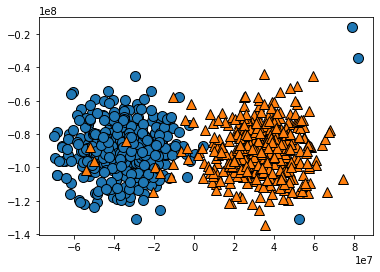

In [11]:
index = 0
train_index, test_index = index_splits_1_single_p[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

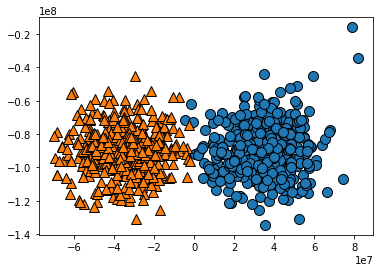

In [12]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_p[index][:])

In [13]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9585858135031232, 0.9564500890866227, 0.9543362260606885, 0.9564507378921059, 0.9564518191916268, 0.9479797105035259, 0.9564507378921059, 0.9522075316581229, 0.9564552789893467, 0.5261798179519238]
Folkes test array: [0.9414105223448617, 0.9798166970263985, 0.9420351045523602, 0.9217934842401961, 0.9407698745315437, 1.0, 0.9217934842401961, 0.9601464009760063, 0.9604278654385985, 0.530136356598562]
Assignment fidelity train array: [0.9894444444444445, 0.9888888888888889, 0.9883333333333333, 0.9888888888888889, 0.9888888888888889, 0.9866666666666667, 0.9888888888888889, 0.9877777777777778, 0.9888888888888889, 0.8083333333333333]
Assignment fidelity test array: [0.985, 0.995, 0.985, 0.98, 0.985, 1.0, 0.98, 0.99, 0.99, 0.815]


In [14]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.912 (±0.1287) with 10 splits
Train score 0.910 (±0.1287) with 10 splits


In [15]:
report_cv_score(assignment_train, assignment_test)

Test score 0.971 (±0.0541) with 10 splits
Train score 0.971 (±0.0522) with 10 splits


# Try 2
(Due to errors)

In [13]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_p = []
y_pred_1_single_train_p = []
y_pred_1_single_test_p = []

index_splits_1_single_p = []
for train_index, test_index in split_1_single:
    index_splits_1_single_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-22 13:35:00,971: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
for i in range(len(index_splits_1_single_p)):
    print('Split',i)
    train_index, test_index = index_splits_1_single_p[i]
    qkmeans_1_single_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_p[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_p.append(qkmeans_1_single_p[-1].labels_)
    y_pred_1_single_test_p.append(qkmeans_1_single_p[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0   -0.764875  0.339856
1    0.833988 -0.577882
2   -1.073575  0.421478
3   -0.688518  0.941901
4    0.071082 -0.233621
..        ...       ...
895 -1.450883 -0.107891
896 -0.970843  0.009550
897  1.186911 -0.408040
898  1.473748  1.263941
899 -0.094338 -0.176409

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.47374819e+000 1.26394116e+000]
 [2.56914136e-322 9.88131292e-324]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.47374819  1.26394116]
 [-0.28426755 -1.1497629 ]]
Iteration 0
Old centroids are [[ 1.47374819  1.26394116]
 [-0.28426755 -1.1497629 ]]
New centroids are           0         1
0  0.507543  0.677401
1 -0.464348 -0.619750
Centers are [1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 

Old centroids are           0         1
0  0.831443  0.335558
1 -0.777801 -0.313909
New centroids are           0         1
0  0.915808  0.160112
1 -0.875991 -0.153150
Centers are [1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0

Old centroids are           0         1
0  0.946352  0.027546
1 -0.913291 -0.026583
New centroids are           0         1
0  0.946399  0.029586
1 -0.913337 -0.028553
Centers are [1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0
 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0

Old centroids are           0         1
0 -0.862398  0.161080
1  0.873974 -0.163242
New centroids are           0         1
0 -0.914600  0.006498
1  0.935153 -0.006644
Centers are [0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.98201741  0.98714575]
 [ 1.33066411  0.32919896]]
Iteration 0
Old centroids are [[-0.98201741  0.98714575]
 [ 1.33066411  0.32919896]]
New centroids are           0         1
0 -0.896726  0.026725
1  0.937486 -0.027939
Centers are [1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 

Old centroids are           0         1
0 -0.907703 -0.024619
1  0.948963  0.025738
New centroids are           0         1
0 -0.909653 -0.026923
1  0.946782  0.028022
Centers are [1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0

Split 3
Data is:             0         1
0   -0.923437 -0.183948
1   -1.092350  0.412457
2   -0.901297  0.299859
3   -1.211034 -0.313530
4    0.557124 -0.425807
..        ...       ...
895  0.780205  1.049851
896  0.887415  2.070082
897  1.069793  2.011373
898 -1.205896  1.266123
899  0.401430  0.027767

[900 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.03439197  0.96203476]
 [ 0.94461122  0.03061909]]
Cluster center 1
Centers are: [[-1.03439197  0.96203476]
 [ 0.69341697 -0.40255476]]
Iteration 0
Old centroids are [[-1.03439197  0.96203476]
 [ 0.69341697 -0.40255476]]
New centroids are           0         1
0 -0.734460  0.363831
1  0.747634 -0.370357
Centers are [0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 1 0 0 1 

Old centroids are           0        1
0 -0.920844 -0.02452
1  0.937362  0.02496
New centroids are           0        1
0 -0.920844 -0.02452
1  0.937362  0.02496
Centers are [0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1
 

Old centroids are           0         1
0 -0.843653  0.193957
1  0.847411 -0.194821
New centroids are           0         1
0 -0.921036  0.008178
1  0.921036 -0.008178
Centers are [1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0

Old centroids are           0         1
0 -0.916936 -0.028565
1  0.937541  0.029207
New centroids are           0         1
0 -0.918849 -0.030959
1  0.935331  0.031514
Centers are [1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0
 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.94374574  0.6102156 ]
 [-0.67770632 -0.39424076]]
Iteration 0
Old centroids are [[ 0.94374574  0.6102156 ]
 [-0.67770632 -0.39424076]]
New centroids are           0         1
0  0.842163  0.299287
1 -0.812742 -0.288831
Centers are [1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.11427246  0.84859614]
 [-1.49961114 -1.19270094]]
Iteration 0
Old centroids are [[ 1.11427246  0.84859614]
 [-1.49961114 -1.19270094]]
New centroids are           0         1
0  0.787778  0.399585
1 -0.743540 -0.377146
Centers are [1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 

Old centroids are           0         1
0  0.942956  0.039805
1 -0.914069 -0.038586
New centroids are           0         1
0  0.941128  0.036938
1 -0.916362 -0.035966
Centers are [1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0

Old centroids are           0         1
0 -0.899882 -0.043167
1  0.957673  0.045939
New centroids are           0         1
0 -0.900045 -0.053041
1  0.957846  0.056447
Centers are [0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1

Old centroids are           0         1
0 -0.580330 -0.534585
1  0.631496  0.581718
New centroids are           0         1
0 -0.678234 -0.444081
1  0.728242  0.476825
Centers are [1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1

Old centroids are           0         1
0 -0.921231 -0.042067
1  0.933596  0.042632
New centroids are           0         1
0 -0.921408 -0.041595
1  0.933775  0.042153
Centers are [0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1
 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.16573276 -0.58523092]
 [ 0.69943349  0.59420082]]
Iteration 0
Old centroids are [[ 0.16573276 -0.58523092]
 [ 0.69943349  0.59420082]]
New centroids are           0         1
0 -0.277408 -0.733488
1  0.286175  0.756669
Centers are [0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 

Old centroids are           0         1
0 -0.472699 -0.606449
1  0.535426  0.686926
New centroids are           0         1
0 -0.538111 -0.570346
1  0.593431  0.628980
Centers are [0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0

Old centroids are           0         1
0 -0.849233 -0.195395
1  0.911850  0.209802
New centroids are           0         1
0 -0.894273 -0.085602
1  0.943274  0.090293
Centers are [0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0

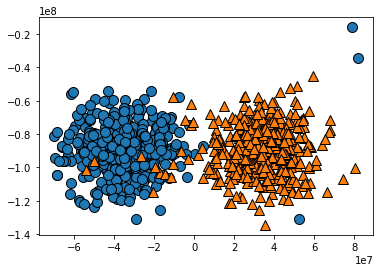

In [15]:
index = 0
train_index, test_index = index_splits_1_single_p[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

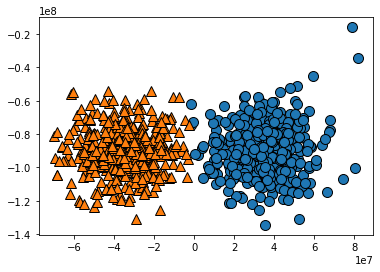

In [16]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_p[index][:])

In [17]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_1_single_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[test_index][:],y_1_single_train[test_index][:],y_pred_1_single_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9585837583827508, 0.9500961287827315, 0.947982037721756, 0.9543253470834073, 0.956454400039427, 0.9543239918954002, 0.9522087038713772, 0.9543439761353114, 0.958581699302351, 0.954332155462865]
Folkes test array: [0.9411667087332625, 0.9798994669297973, 1.0, 0.9600329457835484, 0.940672958818103, 0.9798000612036726, 0.9406243819552125, 0.9419551444397748, 0.9216646266829865, 0.9413447852909826]
Assignment fidelity train array: [0.9894444444444445, 0.9872222222222222, 0.9866666666666667, 0.9883333333333333, 0.9888888888888889, 0.9883333333333333, 0.9877777777777778, 0.9883333333333333, 0.9894444444444445, 0.9883333333333333]
Assignment fidelity test array: [0.985, 0.995, 1.0, 0.99, 0.985, 0.995, 0.985, 0.985, 0.98, 0.985]


In [11]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.865 (±0.1797) with 10 splits
Train score 0.873 (±0.1809) with 10 splits


In [12]:
report_cv_score(assignment_train, assignment_test)

Test score 0.946 (±0.0841) with 10 splits
Train score 0.951 (±0.0803) with 10 splits


In [16]:
index_splits_3_4_1_single_p_2 = index_splits_1_single_p
qkmeans_3_4_1_single_p_2 = qkmeans_1_single_p
y_pred_3_4_1_single_train_p_2 = y_pred_1_single_train_p
y_pred_3_4_1_single_test_p_2 = y_pred_1_single_test_p
%store index_splits_3_4_1_single_p_2
%store qkmeans_3_4_1_single_p_2
%store y_pred_3_4_1_single_train_p_2
%store y_pred_3_4_1_single_test_p_2

Stored 'index_splits_3_4_1_single_p_2' (list)
Stored 'qkmeans_3_4_1_single_p_2' (list)
Stored 'y_pred_3_4_1_single_train_p_2' (list)
Stored 'y_pred_3_4_1_single_test_p_2' (list)


In [22]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_single = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2]))
y_1_single = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2]))

X_1_single_train, X_1_single_test, y_1_single_train, y_1_single_test = train_test_split(X_1_single, y_1_single, train_size=0.48828125, random_state=0)

cv = ShuffleSplit(n_splits=10, train_size=0.9)
split_1_single = cv.split(X_1_single_train)
qkmeans_1_single_r = []
y_pred_1_single_train_r = []
y_pred_1_single_test_r = []

index_splits_3_4_1_single_r = []
for train_index, test_index in split_1_single:
    index_splits_3_4_1_single_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-16 14:43:31,338: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
for i in range(len(index_splits_3_4_1_single_r)):
    print('Split',i)
    train_index, test_index = index_splits_3_4_1_single_r[i]
    qkmeans_1_single_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=5, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_single_r[-1].fit(X_1_single_train[train_index])
    y_pred_1_single_train_r.append(qkmeans_1_single_r[-1].labels_)
    y_pred_1_single_test_r.append(qkmeans_1_single_r[-1].predict(pd.DataFrame(X_1_single_train[test_index])))

Split 0
Data is:             0         1
0   -0.997753 -0.245409
1    0.925915  1.293931
2    1.422057  0.545109
3    1.559694  1.652001
4   -0.677549 -1.600742
..        ...       ...
895 -0.743445 -0.260587
896 -0.444205  0.324728
897  1.373345  1.517663
898 -0.377988 -0.621827
899  1.265601  0.051082

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.670167 -0.748603
1 -1.126687 -0.320443
New centroids are           0         1
0  0.470529 -0.646705
1 -0.438218  0.602296
Centers are [1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0

Split 1
Data is:             0         1
0    1.014615  1.438370
1   -0.536363 -0.608170
2   -0.600760  0.324326
3    0.961125 -0.680784
4    1.389177 -1.345976
..        ...       ...
895 -0.970634 -0.676719
896 -0.667992  2.149592
897  1.164079  1.336165
898 -1.245701 -1.356826
899  0.902405  0.060068

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.061602  0.561400
1 -0.708010 -0.349433
New centroids are           0         1
0  0.062860  0.777595
1 -0.061479 -0.760505
Centers are [0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1

Split 2
Data is:             0         1
0   -0.662824 -1.916336
1    0.541504 -0.477158
2   -1.055816  1.168968
3   -0.461955  0.338463
4   -0.654498 -1.722596
..        ...       ...
895  0.711808  0.709217
896  0.308146 -1.464414
897 -0.874969  0.714897
898  0.396451  0.030135
899  1.309278 -0.735938

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.662824 -1.916336
1  0.221178  1.518169
New centroids are           0         1
0 -0.250192 -0.726448
1  0.265077  0.769669
Centers are [0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1

Split 3
Data is:             0         1
0   -0.671513 -1.368626
1    0.557041 -0.428662
2    0.075901 -0.087288
3    0.827726  1.484201
4   -0.887208  0.974434
..        ...       ...
895  1.020924 -2.155265
896 -1.166278 -0.856874
897 -0.349469  1.300788
898 -0.915403 -1.829606
899 -0.969401 -0.780061

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -1.034092 -1.262782
1 -0.084380 -1.146852
New centroids are           0         1
0 -0.870085  0.095022
1  0.897582 -0.098025
Centers are [0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 

Old centroids are           0         1
0 -0.917699 -0.036678
1  0.934160  0.037336
New centroids are           0         1
0 -0.915749 -0.032328
1  0.936327  0.033055
Centers are [0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.685499 -0.811769
1 -1.615055  0.841811
New centroids are           0         1
0  0.731071 -0.392722
1 -0.715003  0.384091
Centers are [1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1

Split 5
Data is:             0         1
0   -1.133769 -0.093211
1    0.945040 -0.435240
2    0.486053  0.563873
3   -0.368815  0.842206
4    0.751707  0.031527
..        ...       ...
895 -1.205988  2.068811
896 -1.348076 -0.478130
897  0.941387  0.989564
898  1.040759  0.486483
899  0.785455 -0.260654

[900 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.427513 -0.062933
1  1.232667 -0.191614
New centroids are           0         1
0  0.137812  0.613782
1 -0.140909 -0.627575
Centers are [0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1

Split 6
Data is:             0         1
0   -0.404900  1.416980
1   -0.767254  3.104245
2    1.253697  0.612317
3    1.006921  0.346711
4   -1.111845  0.451828
..        ...       ...
895  1.132555  0.466304
896 -0.772789  0.496703
897 -0.634916 -1.681603
898 -0.667864  0.716565
899 -1.232003  0.060539

[900 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0 -1.623167 -0.449699
1 -0.881965  0.771081
New centroids are           0         1
0 -0.239079 -0.738276
1  0.245540  0.758230
Centers are [1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 

Old centroids are           0         1
0 -0.400876 -0.649862
1  0.446045  0.723086
New centroids are           0         1
0 -0.468211 -0.607422
1  0.527982  0.684965
Centers are [1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0

Old centroids are           0         1
0 -0.112499 -0.763433
1  0.113000  0.766834
New centroids are           0         1
0 -0.145474 -0.747567
1  0.150740  0.774628
Centers are [1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0

Old centroids are           0         1
0  0.259471 -0.723963
1 -0.257175  0.717556
New centroids are           0         1
0  0.265082 -0.719663
1 -0.263906  0.716472
Centers are [0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1

Old centroids are           0         1
0  0.881341 -0.126337
1 -0.889210  0.127465
New centroids are           0         1
0  0.936003 -0.001032
1 -0.915432  0.001010
Centers are [0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1
 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0

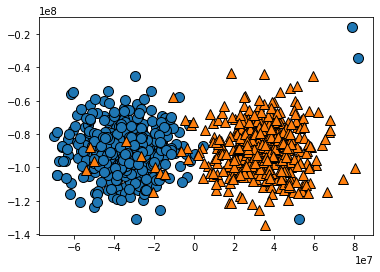

In [24]:
index = 0
train_index, test_index = index_splits_3_4_1_single_r[index]
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_1_single_train[train_index][:])

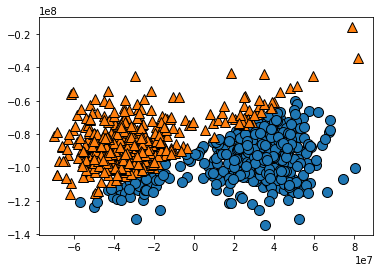

In [25]:
mglearn.discrete_scatter(X_1_single_train[train_index][:,0],X_1_single_train[train_index][:,1],y_pred_1_single_train_r[index][:])

In [28]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_3_4_1_single_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_single_train[test_index][:],y_pred_1_single_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_single_train[train_index][:],y_1_single_train[train_index][:],y_pred_1_single_train_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.7968612740115969, 0.5167517315332776, 0.6383506081072455, 0.9564500890866227, 0.9585845753853528, 0.5661703224964324, 0.5976113180101326, 0.5081736481268673, 0.5388739765342939, 0.954325801038514]
Folkes test array: [0.8850855745721272, 0.5305623471882641, 0.6316691259655037, 0.940672958818103, 0.9601654575655926, 0.5914096762566886, 0.5819364315001709, 0.5223033252230332, 0.579881668875643, 0.940672958818103]
Assignment fidelity train array: [0.9427777777777778, 0.7966666666666666, 0.8816666666666667, 0.9888888888888889, 0.9894444444444445, 0.8411111111111111, 0.8605555555555555, 0.7838888888888889, 0.8205555555555556, 0.9883333333333333]
Assignment fidelity test array: [0.9427777777777778, 0.7966666666666666, 0.8816666666666667, 0.9888888888888889, 0.9894444444444445, 0.8411111111111111, 0.8605555555555555, 0.7838888888888889, 0.8205555555555556, 0.9883333333333333]


In [29]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.703 (±0.1831) with 10 splits
Train score 0.716 (±0.1789) with 10 splits


In [30]:
report_cv_score(assignment_train, assignment_test)

Test score 0.889 (±0.0776) with 10 splits
Train score 0.889 (±0.0776) with 10 splits


In [ ]:
index_splits_3_4_1_single_r = index_splits_3_4_1_single_r
qkmeans_3_4_1_single_r = qkmeans_1_single_r
y_pred_3_4_1_single_train_r = y_pred_1_single_train_r
y_pred_3_4_1_single_test_r = y_pred_1_single_test_r
# index_splits_3_4_1_single_r
# qkmeans_3_4_1_single_r
# y_pred_3_4_1_single_train_r
# y_pred_3_4_1_single_test_r

In [31]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_p = []
y_pred_0_both_train_p = []
y_pred_0_both_test_p = []

index_splits_3_4_0_both_p = []
for train_index, test_index in split_0_both:
    index_splits_3_4_0_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-16 15:50:18,413: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
for i in range(len(index_splits_3_4_0_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_3_4_0_both_p[i]
    qkmeans_0_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_p[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_p.append(qkmeans_0_both_p[-1].labels_)
    y_pred_0_both_test_p.append(qkmeans_0_both_p[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0     1.358532  0.506713
1    -0.463971 -0.285188
2    -0.908391  0.624190
3    -1.076478 -0.209210
4     0.828597 -0.601701
...        ...       ...
1795 -1.453225 -0.211197
1796 -0.270618 -1.186622
1797 -0.823965 -1.192042
1798 -1.025375 -1.725340
1799  1.034026 -0.723294

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[1.12466507e+000 1.51828549e+000]
 [2.16400753e-321 7.41098469e-323]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.12466507  1.51828549]
 [-0.69578307 -0.2979245 ]]
Iteration 0
Old centroids are [[ 1.12466507  1.51828549]
 [-0.69578307 -0.2979245 ]]
New centroids are           0         1
0  0.836280  0.476432
1 -0.851281 -0.484978
Centers are [0 1 1 ... 1 1 0]
Iteration 1
Old centroids are           0         1
0  0.836280  0.476432
1 -0.851281 -0.484978
New centroids are           0         1
0  0.899347  0.388444
1 -0.909396 -0.392784
Centers are [0 1 1 ... 1 1 0]
Iteration 2
Old centroids are           0         1
0  0.899347  0.388444
1 -0.909396 -0.392784
New centroids are           0         1
0  0.927700  0.341783
1 -0.929764 -0.342543
Centers are [0 1 1 ... 1 1 0]
Iteration 3
Old centroids are           0         1
0  0.927700  0.341783
1 -0.929764 -0.342543
New centroids are           0         1
0  0.934949  0.316966
1 -0.941203 -0.319086
Centers are [0 1 1 ... 1 1 0]
Iteration 4
Old centroids are           0         1
0  0.934949  0.316966
1 -0.941203 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.16766268 -0.28384744]
 [ 1.30718029  0.28452822]]
Iteration 0
Old centroids are [[-1.16766268 -0.28384744]
 [ 1.30718029  0.28452822]]
New centroids are           0         1
0 -0.949748 -0.269100
1  0.945537  0.267907
Centers are [1 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0 -0.949748 -0.269100
1  0.945537  0.267907
New centroids are           0         1
0 -0.950987 -0.283786
1  0.936309  0.279406
Centers are [1 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0 -0.950987 -0.283786
1  0.936309  0.279406
New centroids are           0         1
0 -0.946486 -0.283127
1  0.940197  0.281245
Centers are [1 1 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.946486 -0.283127
1  0.940197  0.281245
New centroids are           0         1
0 -0.942738 -0.283801
1  0.942738  0.283801
Centers are [1 1 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.942738 -0.283801
1  0.942738 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.19605572  0.16656764]
 [-1.21283408 -0.25746187]]
Iteration 0
Old centroids are [[ 1.19605572  0.16656764]
 [-1.21283408 -0.25746187]]
New centroids are           0         1
0  0.957018  0.281336
1 -0.940154 -0.276379
Centers are [1 1 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.957018  0.281336
1 -0.940154 -0.276379
New centroids are           0         1
0  0.951347  0.298167
1 -0.936662 -0.293565
Centers are [1 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.951347  0.298167
1 -0.936662 -0.293565
New centroids are           0         1
0  0.951441  0.308411
1 -0.930531 -0.301633
Centers are [1 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.951441  0.308411
1 -0.930531 -0.301633
New centroids are           0         1
0  0.948318  0.315098
1 -0.929539 -0.308858
Centers are [1 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.948318  0.315098
1 -0.929539 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:              0         1
0     1.169590 -0.614960
1     1.354340 -0.101077
2     1.321509  0.288232
3    -0.922095  0.112156
4     0.591744  0.265920
...        ...       ...
1795  0.507044  0.028911
1796  1.185338  2.984965
1797  0.619193  0.887282
1798  1.005862 -1.422468
1799  1.313555  0.323203

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[-1.05162649 -0.94117276]
 [ 0.94155447  0.30302347]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.05162649 -0.94117276]
 [ 0.77586705  0.94921513]]
Iteration 0
Old centroids are [[-1.05162649 -0.94117276]
 [ 0.77586705  0.94921513]]
New centroids are           0         1
0 -0.754120 -0.553395
1  0.774502  0.568351
Centers are [1 1 1 ... 1 0 1]
Iteration 1
Old centroids are           0         1
0 -0.754120 -0.553395
1  0.774502  0.568351
New centroids are           0         1
0 -0.850489 -0.462837
1  0.850489  0.462837
Centers are [1 1 1 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0 -0.850489 -0.462837
1  0.850489  0.462837
New centroids are           0         1
0 -0.899263 -0.381236
1  0.903268  0.382934
Centers are [1 1 1 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0 -0.899263 -0.381236
1  0.903268  0.382934
New centroids are           0         1
0 -0.917705 -0.327258
1  0.936244  0.333870
Centers are [1 1 1 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0 -0.917705 -0.327258
1  0.936244 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-1.40104999  1.19891818]
 [ 1.37513878  0.09770841]]
Iteration 0
Old centroids are [[-1.40104999  1.19891818]
 [ 1.37513878  0.09770841]]
New centroids are           0         1
0 -0.916176 -0.154486
1  0.926412  0.156212
Centers are [0 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.916176 -0.154486
1  0.926412  0.156212
New centroids are           0         1
0 -0.945220 -0.265774
1  0.951543  0.267551
Centers are [0 1 1 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.945220 -0.265774
1  0.951543  0.267551
New centroids are           0         1
0 -0.943299 -0.282871
1  0.945398  0.283500
Centers are [0 1 1 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.943299 -0.282871
1  0.945398  0.283500
New centroids are           0         1
0 -0.940826 -0.287717
1  0.945016  0.288999
Centers are [0 1 1 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.940826 -0.287717
1  0.945016 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.90797771  0.23529632]
 [-1.12852477  0.95410313]]
Iteration 0
Old centroids are [[ 0.90797771  0.23529632]
 [-1.12852477  0.95410313]]
New centroids are           0         1
0  0.936924  0.239430
1 -0.953730 -0.243725
Centers are [0 0 0 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0  0.936924  0.239430
1 -0.953730 -0.243725
New centroids are           0         1
0  0.941113  0.284293
1 -0.953745 -0.288109
Centers are [0 0 0 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0  0.941113  0.284293
1 -0.953745 -0.288109
New centroids are           0         1
0  0.938150  0.293887
1 -0.950743 -0.297831
Centers are [0 0 0 ... 1 0 0]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 7
Data is:              0         1
0     1.229352  0.627737
1     1.025498  0.265884
2    -1.554767 -0.057745
3    -0.971453 -0.947660
4    -1.149284  0.375043
...        ...       ...
1795  1.101655  1.232434
1796 -0.480998 -0.716655
1797 -0.897225 -1.537760
1798 -0.730628 -1.192444
1799 -1.475124 -1.290040

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.59434011  0.43009   ]
 [-0.95074267 -0.29783138]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.59434011  0.43009   ]
 [-0.96052692 -0.09835552]]
Iteration 0
Old centroids are [[ 1.59434011  0.43009   ]
 [-0.96052692 -0.09835552]]
New centroids are           0         1
0  0.936251  0.260723
1 -0.961555 -0.267770
Centers are [0 0 1 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.936251  0.260723
1 -0.961555 -0.267770
New centroids are          0         1
0  0.92689  0.282603
1 -0.95831 -0.292183
Centers are [0 0 1 ... 1 1 1]
Iteration 2
Old centroids are          0         1
0  0.92689  0.282603
1 -0.95831 -0.292183
New centroids are           0         1
0  0.935838  0.279611
1 -0.952624 -0.284626
Centers are [0 0 1 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0  0.935838  0.279611
1 -0.952624 -0.284626
New centroids are           0         1
0  0.935803  0.275857
1 -0.954708 -0.281430
Centers are [0 0 1 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0  0.935803  0.275857
1 -0.954708 -0.281

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 0.39032237  1.41624891]
 [-1.21610568 -0.79063464]]
Iteration 0
Old centroids are [[ 0.39032237  1.41624891]
 [-1.21610568 -0.79063464]]
New centroids are           0         1
0  0.683944  0.641009
1 -0.665945 -0.624140
Centers are [0 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.683944  0.641009
1 -0.665945 -0.624140
New centroids are           0         1
0  0.794000  0.530920
1 -0.790479 -0.528565
Centers are [0 0 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.794000  0.530920
1 -0.790479 -0.528565
New centroids are           0         1
0  0.867994  0.426082
1 -0.877692 -0.430843
Centers are [0 1 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.867994  0.426082
1 -0.877692 -0.430843
New centroids are           0         1
0  0.910600  0.349875
1 -0.922823 -0.354572
Centers are [0 1 0 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.910600  0.349875
1 -0.922823 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 9
Data is:              0         1
0     0.973841 -0.732739
1    -0.891965 -0.884553
2     0.685313 -0.126848
3    -1.390968 -0.364948
4     0.838740 -0.766280
...        ...       ...
1795 -0.515268  0.623881
1796 -0.840053 -0.682483
1797  0.664671 -0.587609
1798  1.247464 -0.782638
1799 -0.777985 -2.302807

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.29107413  1.06550764]
 [-0.94819299 -0.28692711]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.29107413  1.06550764]
 [-0.72069122  0.17591971]]
Iteration 0
Old centroids are [[ 1.29107413  1.06550764]
 [-0.72069122  0.17591971]]
New centroids are           0         1
0  0.943318  0.272301
1 -0.953858 -0.275343
Centers are [0 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.943318  0.272301
1 -0.953858 -0.275343
New centroids are           0         1
0  0.941067  0.284933
1 -0.949469 -0.287477
Centers are [0 1 0 ... 0 0 1]
Iteration 2
Old centroids are           0         1
0  0.941067  0.284933
1 -0.949469 -0.287477
New centroids are           0         1
0  0.935925  0.290226
1 -0.950598 -0.294776
Centers are [0 1 0 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0  0.935925  0.290226
1 -0.950598 -0.294776
New centroids are           0         1
0  0.936078  0.295915
1 -0.946537 -0.299222
Centers are [0 1 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.936078  0.295915
1 -0.946537 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


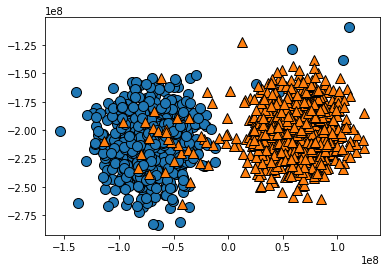

In [33]:
index = 6
train_index, test_index = index_splits_3_4_0_both_p[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

Text(0.5, 1.0, '|0> and |1> state clustering')

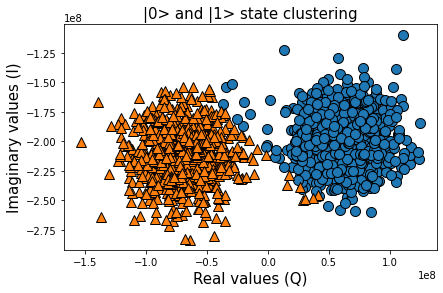

In [34]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_p[index][:])
plt.tight_layout()
plt.xlabel("Real values (Q)", fontsize=15)
plt.ylabel("Imaginary values (I)", fontsize=15)
plt.title("|0> and |1> state clustering", fontsize=15)
#plt.savefig('clustering_0_qubit_both.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.svg', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('clustering_0_qubit_both.png',dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [35]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_3_4_0_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9334675977739518, 0.9375999849509554, 0.9282612368392922, 0.933437849313556, 0.9386145146547233, 0.9407098515248058, 0.9417735779716088, 0.9386636377272124, 0.9386323484560389, 0.9386386155079789]
Folkes test array: [0.951049271856869, 0.960424106583397, 0.9608058408373771, 0.9225026917845878, 0.9235774172433183, 0.9604722294277793, 0.9227391081828037, 0.9325213660789725, 0.9318264767587182, 0.9604851202988358]
Assignment fidelity train array: [0.9827777777777778, 0.9838888888888889, 0.9813888888888889, 0.9827777777777778, 0.9841666666666666, 0.9847222222222223, 0.985, 0.9841666666666666, 0.9841666666666666, 0.9841666666666666]
Assignment fidelity test array: [0.9875, 0.99, 0.99, 0.98, 0.98, 0.99, 0.98, 0.9825, 0.9825, 0.99]


In [36]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.937 (±0.0039) with 10 splits
Train score 0.943 (±0.0165) with 10 splits


In [37]:
report_cv_score(assignment_train, assignment_test)

Test score 0.984 (±0.0010) with 10 splits
Train score 0.985 (±0.0044) with 10 splits


In [ ]:
qkmeans_3_4_0_both_p = qkmeans_0_both_p
y_pred_3_4_0_both_train_p = y_pred_0_both_train_p
y_pred_3_4_0_both_test_p = y_pred_0_both_test_p
# index_splits_3_4_0_both_p
# qkmeans_3_4_0_both_p
# y_pred_3_4_0_both_train_p
# y_pred_3_4_0_both_test_p

In [38]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_0_both = np.concatenate((data_00_0.values[:,:2],data_01_0.values[:,:2],data_10_0.values[:,:2],data_11_0.values[:,:2]))
y_0_both = np.concatenate((data_00_0.values[:,2],data_01_0.values[:,2],data_10_0.values[:,2],data_11_0.values[:,2]))

X_0_both_train, X_0_both_test, y_0_both_train, y_0_both_test = train_test_split(X_0_both, y_0_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_0_both = cv.split(X_0_both_train)
qkmeans_0_both_r = []
y_pred_0_both_train_r = []
y_pred_0_both_test_r = []

index_splits_3_4_0_both_r = []
for train_index, test_index in split_0_both:
    index_splits_3_4_0_both_r.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-17 01:10:30,185: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
for i in range(len(index_splits_3_4_0_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_3_4_0_both_r[i]
    qkmeans_0_both_r.append(QuantumKMeans(backend=backend, init='random', n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_0_both_r[-1].fit(X_0_both_train[train_index])
    y_pred_0_both_train_r.append(qkmeans_0_both_r[-1].labels_)
    y_pred_0_both_test_r.append(qkmeans_0_both_r[-1].predict(pd.DataFrame(X_0_both_train[test_index])))

Split 0
Data is:              0         1
0    -0.367421 -0.632414
1     1.536503 -0.017985
2    -1.320940 -1.260457
3    -1.396561  0.768808
4    -1.102141  0.910034
...        ...       ...
1795  0.610226 -1.349859
1796 -0.468058 -0.138942
1797  0.986225 -1.881979
1798 -0.688774 -0.490383
1799 -0.788772 -0.721226

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -0.889708 -0.785754
1 -0.766938  0.063134
New centroids are           0         1
0  0.066438 -0.727437
1 -0.069612  0.762196
Centers are [0 0 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.066438 -0.727437
1 -0.069612  0.762196
New centroids are           0         1
0 -0.130005 -0.769598
1  0.136520  0.808166
Centers are [0 0 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0 -0.130005 -0.769598
1  0.136520  0.808166
New centroids are           0         1
0 -0.315841 -0.775834
1  0.320793  0.787997
Centers are [0 1 0 ... 0 0 0]
Iteration 3
Old centroids are           0         1
0 -0.315841 -0.775834
1  0.320793  0.787997
New centroids are           0         1
0 -0.494558 -0.722998
1  0.505671  0.739245
Centers are [0 1 0 ... 0 0 0]
Iteration 4
Old centroids are           0         1
0 -0.494558 -0.722998
1  0.505671  0.739245
New centroids are           0         1
0 -0.643279 -0.633874
1  0.671025  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 1
Data is:              0         1
0     1.332302  0.779591
1     0.714138  0.781188
2     1.093864  0.543546
3    -0.975478  1.526364
4     1.367743 -0.261800
...        ...       ...
1795  1.170753  0.244149
1796  0.742278 -0.514224
1797  1.106617  2.004079
1798 -0.916678 -0.227048
1799 -0.589717 -3.316110

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0 -1.265421  0.950412
1  0.877483  0.509581
New centroids are           0         1
0 -0.956458 -0.256207
1  0.943789  0.252814
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.956458 -0.256207
1  0.943789  0.252814
New centroids are           0         1
0 -0.954205 -0.276497
1  0.941567  0.272835
Centers are [1 1 1 ... 1 0 0]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 2
Data is:              0         1
0    -0.971250 -0.959452
1    -0.804153 -0.451054
2    -0.859655  0.530849
3     0.944342 -0.628933
4    -1.279478  1.023079
...        ...       ...
1795 -0.797275  0.206044
1796 -0.975030  0.238869
1797 -1.042337 -0.007327
1798 -1.479492  0.764667
1799  1.245846  0.280528

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.831349 -0.601357
1  1.009483  0.357344
New centroids are           0         1
0 -0.294712 -0.774528
1  0.304702  0.800783
Centers are [0 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0 -0.294712 -0.774528
1  0.304702  0.800783
New centroids are           0         1
0 -0.487430 -0.743294
1  0.484191  0.738355
Centers are [0 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0 -0.487430 -0.743294
1  0.484191  0.738355
New centroids are           0         1
0 -0.629388 -0.647525
1  0.655078  0.673955
Centers are [0 0 1 ... 0 0 1]
Iteration 3
Old centroids are           0         1
0 -0.629388 -0.647525
1  0.655078  0.673955
New centroids are           0         1
0 -0.762423 -0.543155
1  0.788268  0.561567
Centers are [0 0 0 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0 -0.762423 -0.543155
1  0.788268  0.561567
New centroids are           0         1
0 -0.860386 -0.463003
1  0.848990  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 4
Data is:              0         1
0     0.791414  0.176821
1     0.869258  0.266045
2    -0.788770  0.206333
3     0.903091  0.422510
4    -0.445564 -1.024650
...        ...       ...
1795  1.162935 -0.085597
1796  1.034069  1.019186
1797  0.850449 -0.930564
1798 -0.676395  1.061482
1799  1.169843 -1.291137

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.361405  0.245356
1 -1.116939 -0.100668
New centroids are           0         1
0  0.940952  0.311036
1 -0.934700 -0.308969
Centers are [0 0 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.940952  0.311036
1 -0.934700 -0.308969
New centroids are           0         1
0  0.943898  0.298958
1 -0.939712 -0.297632
Centers are [0 0 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.943898  0.298958
1 -0.939712 -0.297632
New centroids are           0         1
0  0.941673  0.301404
1 -0.939583 -0.300735
Centers are [0 0 1 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.941673  0.301404
1 -0.939583 -0.300735
New centroids are           0         1
0  0.939594  0.290843
1 -0.947983 -0.293439
Centers are [0 0 1 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.939594  0.290843
1 -0.947983 -0.293439
New centroids are           0         1
0  0.941440  0.292749
1 -0.945633 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.438447  0.584045
1  0.526822  0.703396
New centroids are           0         1
0  0.383441 -0.553441
1 -0.386006  0.557143
Centers are [0 1 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.383441 -0.553441
1 -0.386006  0.557143
New centroids are           0         1
0  0.327682 -0.604376
1 -0.330607  0.609772
Centers are [0 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.327682 -0.604376
1 -0.330607  0.609772
New centroids are           0         1
0  0.209029 -0.674867
1 -0.212306  0.685447
Centers are [0 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.209029 -0.674867
1 -0.212306  0.685447
New centroids are           0         1
0  0.039352 -0.739751
1 -0.040868  0.768235
Centers are [0 1 1 ... 0 0 1]
Iteration 4
Old centroids are           0         1
0  0.039352 -0.739751
1 -0.040868  0.768235
New centroids are           0         1
0 -0.164574 -0.778316
1  0.169775  0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.609641 -0.252676
1 -1.036673 -0.316393
New centroids are           0         1
0  0.955640  0.250415
1 -0.945081 -0.247648
Centers are [1 1 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.955640  0.250415
1 -0.945081 -0.247648
New centroids are           0         1
0  0.953265  0.272591
1 -0.938551 -0.268383
Centers are [1 1 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.953265  0.272591
1 -0.938551 -0.268383
New centroids are           0         1
0  0.950691  0.277706
1 -0.938099 -0.274028
Centers are [1 1 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.950691  0.277706
1 -0.938099 -0.274028
New centroids are           0         1
0  0.948519  0.277159
1 -0.940125 -0.274706
Centers are [1 1 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.948519  0.277159
1 -0.940125 -0.274706
New centroids are           0         1
0  0.948435  0.276925
1 -0.940042 -0

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.860450 -0.932787
1 -0.723087  1.450729
New centroids are           0         1
0  0.329687 -0.614181
1 -0.326769  0.608745
Centers are [0 1 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.329687 -0.614181
1 -0.326769  0.608745
New centroids are           0         1
0  0.200567 -0.682492
1 -0.204165  0.694734
Centers are [0 1 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.200567 -0.682492
1 -0.204165  0.694734
New centroids are           0         1
0  0.038887 -0.742047
1 -0.040474  0.772335
Centers are [0 1 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0  0.038887 -0.742047
1 -0.040474  0.772335
New centroids are           0         1
0 -0.154459 -0.780687
1  0.159340  0.805359
Centers are [0 1 0 ... 1 1 1]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Split 8
Data is:              0         1
0     1.148889 -0.284866
1    -1.007344 -2.581205
2     0.988238  0.568628
3    -0.947161 -0.106243
4    -1.076366 -0.298433
...        ...       ...
1795 -1.552723 -0.870851
1796 -0.576217 -0.968291
1797  0.700833  0.737441
1798  1.074273  1.562217
1799 -0.862177  0.190907

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  1.329021 -0.295856
1 -1.167707 -0.656187
New centroids are           0         1
0  0.951461  0.273287
1 -0.949349 -0.272680
Centers are [0 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.951461  0.273287
1 -0.949349 -0.272680
New centroids are           0         1
0  0.947141  0.290963
1 -0.945038 -0.290317
Centers are [0 1 0 ... 0 0 1]
Split 9
Data is:              0         1
0    -0.629140 -1.900107
1    -0.773828 -0.375742
2    -0.854113  0.426717
3    -1.171060  1.090725
4    -0.920655 -0.871063
...        ...       ...
1795  0.932541  0.159253
1796  1.078373 -0.045944
1797  1.233647 -0.130287
1798 -1.235207  1.203647
1799  1.545350 -0.439715

[1800 rows x 2 columns]
Iteration 0


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Old centroids are           0         1
0  0.883515  0.504231
1 -1.016988 -0.722438
New centroids are           0         1
0  0.880988  0.416119
1 -0.886881 -0.418902
Centers are [1 1 1 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.880988  0.416119
1 -0.886881 -0.418902
New centroids are           0         1
0  0.923278  0.359982
1 -0.911049 -0.355214
Centers are [1 1 1 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.923278  0.359982
1 -0.911049 -0.355214
New centroids are           0         1
0  0.944378  0.323880
1 -0.923623 -0.316762
Centers are [1 1 1 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.944378  0.323880
1 -0.923623 -0.316762
New centroids are           0         1
0  0.953224  0.312934
1 -0.924023 -0.303347
Centers are [1 1 1 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.953224  0.312934
1 -0.924023 -0.303347
New centroids are           0         1
0  0.953028  0.300013
1 -0.932082 -0

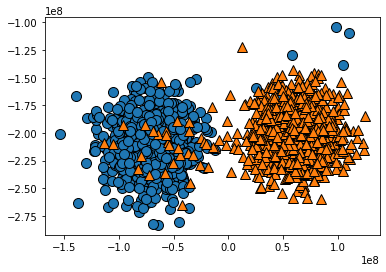

In [40]:
index = 1
train_index, test_index = index_splits_3_4_0_both_r[index]
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_0_both_train[train_index][:])

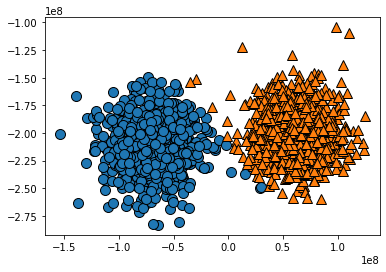

In [41]:
mglearn.discrete_scatter(X_0_both_train[train_index][:,0],X_0_both_train[train_index][:,1],y_pred_0_both_train_r[index][:])

In [43]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_3_4_0_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(X_0_both_train[train_index][:],y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(X_0_both_train[test_index][:],y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9365669773827194, 0.9459631468257803, 0.9355442771112881, 0.9554476323734766, 0.9344829218382971, 0.9282772572176918, 0.9417475178854461, 0.511234923267792, 0.9427986717238207, 0.9375776342424265]
Folkes test array: [0.9414317018501378, 0.9226279112968433, 0.9512040735089259, 0.9042051948849236, 0.9800080775444265, 0.9604120575624573, 0.922884288217808, 0.530844706281077, 0.9042160485401596, 0.970329333117192]
Assignment fidelity train array: [0.9836111111111111, 0.9861111111111112, 0.9833333333333333, 0.9886111111111111, 0.9830555555555556, 0.9813888888888889, 0.985, 0.7880555555555555, 0.9852777777777778, 0.9838888888888889]
Assignment fidelity test array: [0.985, 0.98, 0.9875, 0.975, 0.995, 0.99, 0.98, 0.815, 0.975, 0.9925]


In [44]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.897 (±0.1288) with 10 splits
Train score 0.899 (±0.1252) with 10 splits


In [45]:
report_cv_score(assignment_train, assignment_test)

Test score 0.965 (±0.0590) with 10 splits
Train score 0.967 (±0.0513) with 10 splits


In [ ]:
qkmeans_3_4_0_both_r = qkmeans_0_both_r
y_pred_3_4_0_both_train_r = y_pred_0_both_train_r
y_pred_3_4_0_both_test_r = y_pred_0_both_test_r
# index_splits_3_4_0_both_r
# qkmeans_3_4_0_both_r
# y_pred_3_4_0_both_train_r
# y_pred_3_4_0_both_test_r

In [50]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_p = []
y_pred_1_both_train_p = []
y_pred_1_both_test_p = []

index_splits_3_4_1_both_p = []
for train_index, test_index in split_1_both:
    index_splits_3_4_1_both_p.append((train_index,test_index))

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-09-17 18:28:11,478: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
for i in range(len(index_splits_3_4_1_both_p)):
    print('Split',i)
    train_index, test_index = index_splits_3_4_1_both_p[i]
    qkmeans_1_both_p.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_p[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_p.append(qkmeans_1_both_p[-1].labels_)
    y_pred_1_both_test_p.append(qkmeans_1_both_p[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

Split 0
Data is:              0         1
0    -0.526048  1.239727
1    -0.561989 -0.834733
2     1.066538  0.414441
3    -0.877186  1.383965
4     0.678033  0.531338
...        ...       ...
1795  0.804660  0.277496
1796  0.967433 -0.188952
1797  0.558854 -2.175859
1798 -0.904630 -1.528542
1799  0.437071  0.168794

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.03990426  0.10440912]
 [ 0.02402311 -0.0222741 ]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.03990426  0.10440912]
 [-0.62167676 -0.11307501]]
Iteration 0
Old centroids are [[ 1.03990426  0.10440912]
 [-0.62167676 -0.11307501]]
New centroids are           0         1
0  0.962473  0.038376
1 -0.890416 -0.035503
Centers are [1 1 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.962473  0.038376
1 -0.890416 -0.035503
New centroids are           0         1
0  0.967717  0.021251
1 -0.889309 -0.019529
Centers are [1 1 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.967717  0.021251
1 -0.889309 -0.019529
New centroids are           0         1
0  0.971171  0.018587
1 -0.886542 -0.016967
Centers are [1 1 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.971171  0.018587
1 -0.886542 -0.016967
New centroids are           0         1
0  0.968859  0.020023
1 -0.888379 -0.018360
Centers are [1 1 0 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.968859  0.020023
1 -0.888379 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.0834302   0.08964887]
 [-1.01840881 -0.65881263]]
Iteration 0
Old centroids are [[ 1.0834302   0.08964887]
 [-1.01840881 -0.65881263]]
New centroids are           0        1
0  0.935080  0.13076
1 -0.868933 -0.12151
Centers are [1 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0        1
0  0.935080  0.13076
1 -0.868933 -0.12151
New centroids are           0         1
0  0.963953  0.038976
1 -0.887824 -0.035898
Centers are [1 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.963953  0.038976
1 -0.887824 -0.035898
New centroids are           0         1
0  0.961661  0.028896
1 -0.891647 -0.026792
Centers are [1 0 1 ... 0 1 1]
Iteration 3
Old centroids are           0         1
0  0.961661  0.028896
1 -0.891647 -0.026792
New centroids are           0         1
0  0.966892  0.022009
1 -0.888551 -0.020226
Centers are [1 0 1 ... 0 1 1]
Iteration 4
Old centroids are           0         1
0  0.966892  0.022009
1 -0.888551 -0.020

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[-0.71678169  1.37798623]
 [ 0.67768831 -0.87029685]]
Iteration 0
Old centroids are [[-0.71678169  1.37798623]
 [ 0.67768831 -0.87029685]]
New centroids are           0         1
0 -0.456083  0.628697
1  0.467370 -0.644255
Centers are [1 1 1 ... 1 0 0]
Iteration 1
Old centroids are           0         1
0 -0.456083  0.628697
1  0.467370 -0.644255
New centroids are           0         1
0 -0.505324  0.590310
1  0.523616 -0.611678
Centers are [1 1 1 ... 1 0 0]
Iteration 2
Old centroids are           0         1
0 -0.505324  0.590310
1  0.523616 -0.611678
New centroids are           0         1
0 -0.571023  0.542815
1  0.586456 -0.557486
Centers are [1 1 1 ... 1 0 0]
Iteration 3
Old centroids are           0         1
0 -0.571023  0.542815
1  0.586456 -0.557486
New centroids are           0         1
0 -0.647510  0.477316
1  0.657661 -0.484799
Centers are [1 1 1 ... 1 0 0]
Iteration 4
Old centroids are           0         1
0 -0.647510  0.477316
1  0.657661 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.3678096  -0.06460566]
 [-1.21960068  0.35567011]]
Iteration 0
Old centroids are [[ 1.3678096  -0.06460566]
 [-1.21960068  0.35567011]]
New centroids are           0         1
0  0.961151  0.000745
1 -0.891175 -0.000690
Centers are [1 1 0 ... 1 1 1]
Iteration 1
Old centroids are           0         1
0  0.961151  0.000745
1 -0.891175 -0.000690
New centroids are           0         1
0  0.966224  0.020842
1 -0.891899 -0.019238
Centers are [1 1 0 ... 1 1 1]
Iteration 2
Old centroids are           0         1
0  0.966224  0.020842
1 -0.891899 -0.019238
New centroids are           0         1
0  0.964011  0.023969
1 -0.893826 -0.022224
Centers are [1 1 0 ... 1 1 1]
Iteration 3
Old centroids are           0         1
0  0.964011  0.023969
1 -0.893826 -0.022224
New centroids are           0         1
0  0.964964  0.027516
1 -0.892721 -0.025456
Centers are [1 1 0 ... 1 1 1]
Iteration 4
Old centroids are           0         1
0  0.964964  0.027516
1 -0.892721 

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.22457364  0.30959988]
 [-1.0178364   0.01869051]]
Iteration 0
Old centroids are [[ 1.22457364  0.30959988]
 [-1.0178364   0.01869051]]
New centroids are           0         1
0  0.951329  0.028341
1 -0.901909 -0.026869
Centers are [1 1 0 ... 0 0 1]
Iteration 1
Old centroids are           0         1
0  0.951329  0.028341
1 -0.901909 -0.026869
New centroids are           0         1
0  0.951985  0.021509
1 -0.902531 -0.020392
Centers are [1 1 0 ... 0 0 1]
Split 7
Data is:              0         1
0     1.315615 -1.025566
1     0.780455  0.919039
2    -1.565745  1.731036
3    -0.692203 -0.584092
4     0.490923 -0.175297
...        ...       ...
1795  1.150121  0.733582
1796  1.372502 -0.067920
1797  1.323048 -0.282476
1798 -1.229410  0.053787
1799 -0.276023  0.072438

[1800 rows x 2 columns]
Started Qkmeans++
Centers are: [[ 1.79231374 -0.74060948]
 [-0.90253122 -0.02039167]]


C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.79231374 -0.74060948]
 [-0.60208367  0.32259675]]
Iteration 0
Old centroids are [[ 1.79231374 -0.74060948]
 [-0.60208367  0.32259675]]
New centroids are           0         1
0  0.885749 -0.183730
1 -0.837870  0.173798
Centers are [0 0 1 ... 0 1 1]
Iteration 1
Old centroids are           0         1
0  0.885749 -0.183730
1 -0.837870  0.173798
New centroids are           0         1
0  0.959830 -0.016682
1 -0.887971  0.015433
Centers are [0 0 1 ... 0 1 1]
Iteration 2
Old centroids are           0         1
0  0.959830 -0.016682
1 -0.887971  0.015433
New centroids are           0         1
0  0.964408  0.021513
1 -0.896186 -0.019991
Centers are [0 0 1 ... 0 1 1]
Split 8
Data is:              0         1
0     0.987125  1.158887
1    -0.499168 -0.726654
2     1.565968  0.316877
3    -0.668470 -0.780205
4    -0.389646  0.337292
...        ...       ...
1795  1.415858 -1.178134
1796 -0.444467 -0.262685
1797 -0.623109  0.584541
1798 -0.062197 -0.125295
1799

C:\Users\usuario\anaconda3\envs\quantum\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Cluster center 1
Centers are: [[ 1.26236347  1.09082481]
 [-0.74999104  0.3630924 ]]
Iteration 0
Old centroids are [[ 1.26236347  1.09082481]
 [-0.74999104  0.3630924 ]]
New centroids are           0         1
0  0.968260  0.017978
1 -0.885855 -0.016448
Centers are [0 1 0 ... 0 1 0]
Iteration 1
Old centroids are           0         1
0  0.968260  0.017978
1 -0.885855 -0.016448
New centroids are           0         1
0  0.970307  0.007188
1 -0.885753 -0.006562
Centers are [0 1 0 ... 0 1 0]
Iteration 2
Old centroids are           0         1
0  0.970307  0.007188
1 -0.885753 -0.006562
New centroids are           0         1
0  0.969108  0.006133
1 -0.886630 -0.005611
Centers are [0 1 0 ... 0 1 0]
Iteration 3
Old centroids are           0         1
0  0.969108  0.006133
1 -0.886630 -0.005611
New centroids are           0         1
0  0.971452  0.006376
1 -0.884826 -0.005808
Centers are [0 1 0 ... 0 1 0]
Iteration 4
Old centroids are           0         1
0  0.971452  0.006376
1 -0.884826 

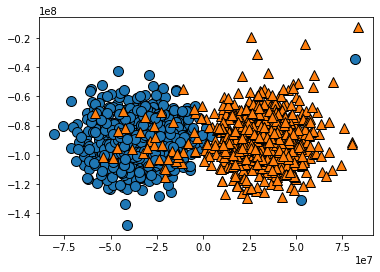

In [52]:
index = 1
train_index, test_index = index_splits_3_4_1_both_p[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

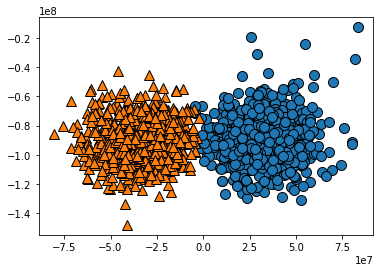

In [53]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_p[index][:])

In [55]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_3_4_1_both_p[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
    assignment_train.append(assignment_fidelity_post(X_1_both_train[train_index][:],y_1_both_train[train_index][:],y_pred_1_both_train_p[index][:]))
    assignment_test.append(assignment_fidelity_post(X_1_both_train[test_index][:],y_1_both_train[test_index][:],y_pred_1_both_test_p[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

Folkes train array: [0.9470302862969304, 0.9480810107333804, 0.9480730470963813, 0.9565434618126146, 0.9512416339507495, 0.9470194505220296, 0.9512132289621463, 0.9554654802234454, 0.9522989626763585, 0.9470480814490408]
Folkes test array: [0.9899561209590796, 0.9800080775444265, 0.9604363243777289, 0.9133451732145137, 0.9508000907119988, 0.960424106583397, 0.9323861880180622, 0.9042350471327202, 0.9507700184816734, 0.9605661802147197]
Assignment fidelity train array: [0.9863888888888889, 0.9866666666666667, 0.9866666666666667, 0.9888888888888889, 0.9875, 0.9863888888888889, 0.9875, 0.9886111111111111, 0.9877777777777778, 0.9863888888888889]
Assignment fidelity test array: [0.9975, 0.995, 0.99, 0.9775, 0.9875, 0.99, 0.9825, 0.975, 0.9875, 0.99]


In [56]:
report_cv_score(fowlkes_train, fowlkes_test)

Test score 0.950 (±0.0034) with 10 splits
Train score 0.950 (±0.0256) with 10 splits


In [57]:
report_cv_score(assignment_train, assignment_test)

Test score 0.987 (±0.0009) with 10 splits
Train score 0.987 (±0.0068) with 10 splits


In [ ]:
qkmeans_3_4_1_both_p = qkmeans_1_both_p
y_pred_3_4_1_both_train_p = y_pred_1_both_train_p
y_pred_3_4_1_both_test_p = y_pred_1_both_test_p
# index_splits_3_4_1_both_p
# qkmeans_3_4_1_both_p
# y_pred_3_4_1_both_train_p
# y_pred_3_4_1_both_test_p

In [ ]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')

X_1_both = np.concatenate((data_00_1.values[:,:2],data_01_1.values[:,:2],data_10_1.values[:,:2],data_11_1.values[:,:2]))
y_1_both = np.concatenate((data_00_1.values[:,2],data_01_1.values[:,2],data_10_1.values[:,2],data_11_1.values[:,2]))

X_1_both_train, X_1_both_test, y_1_both_train, y_1_both_test = train_test_split(X_1_both, y_1_both, train_size=0.48851979, random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.1)
split_1_both = cv.split(X_1_both_train)
qkmeans_1_both_r = []
y_pred_1_both_train_r = []
y_pred_1_both_test_r = []

index_splits_3_4_1_both_r = []
for train_index, test_index in split_1_both:
    index_splits_3_4_1_both_r.append((train_index,test_index))

In [ ]:
for i in range(len(index_splits_3_4_1_both_r)):
    print('Split',i)
    train_index, test_index = index_splits_3_4_1_both_r[i]
    qkmeans_1_both_r.append(QuantumKMeans(backend=backend, n_clusters=2, tol=0.001, max_iter=300, verbose=True, map_type='angle', norm_relevance=False))
    qkmeans_1_both_r[-1].fit(X_1_both_train[train_index])
    y_pred_1_both_train_r.append(qkmeans_1_both_r[-1].labels_)
    y_pred_1_both_test_r.append(qkmeans_1_both_r[-1].predict(pd.DataFrame(X_1_both_train[test_index])))

In [ ]:
index = 2
train_index, test_index = index_splits_3_4_1_both_r[index]
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_1_both_train[train_index][:])

In [ ]:
mglearn.discrete_scatter(X_1_both_train[train_index][:,0],X_1_both_train[train_index][:,1],y_pred_1_both_train_r[index][:])

In [ ]:
fowlkes_train = []
fowlkes_test = []
assignment_train = []
assignment_test = []
for index in range(10):
    train_index, test_index = index_splits_3_4_1_both_r[index]
    fowlkes_train.append(fowlkes_mallows_score(y_1_both_train[train_index][:],y_pred_1_both_train_r[index][:]))
    fowlkes_test.append(fowlkes_mallows_score(y_1_both_train[test_index][:],y_pred_1_both_test_r[index][:]))
    assignment_train.append(assignment_fidelity_post(y_0_both_train[train_index][:],y_pred_0_both_train_r[index][:]))
    assignment_test.append(assignment_fidelity_post(y_0_both_train[test_index][:],y_pred_0_both_test_r[index][:]))
print('Folkes train array:',fowlkes_train)
print('Folkes test array:',fowlkes_test)
print('Assignment fidelity train array:',assignment_train)
print('Assignment fidelity test array:',assignment_test)

In [ ]:
report_cv_score(fowlkes_train, fowlkes_test)

In [ ]:
report_cv_score(assignment_train, assignment_test)

In [ ]:
qkmeans_3_4_1_both_r = qkmeans_1_both_r
y_pred_3_4_1_both_train_r = y_pred_1_both_train_r
y_pred_3_4_1_both_test_r = y_pred_1_both_test_r
# index_splits_3_4_1_both_r
# qkmeans_3_4_1_both_r
# y_pred_3_4_1_both_train_r
# y_pred_3_4_1_both_test_r

## Quantum cross validation correlation analysis

Here we sort assignment fidelities from all four trained QML models to observe the differences between scores obtained from qubits trained with single schedules (|00> and |01> with the 0 qubit as the least significant bit) and both schedules (|00>, |01>, |10> and |11>)

### Folkes Mallows train scores

|        | Q3            | Q4            |
|--------|---------------|---------------|
| Single | 0.924 ±0.0295 | 0.862 ±0.1523 |
| Both   | 0.889 ±0.1237 | 0.909 ±0.1393 |

### Folkes Mallows test scores

|        | Q3            | Q4            |
|--------|---------------|---------------|
| Single | 0.937 ±0.0098 | 0.837 ±0.1470 |
| Both   | 0.896 ±0.1075 | 0.889 ±0.1348 |

### Assignment fidelity train scores

|        | Q3            | Q4            |
|--------|---------------|---------------|
| Single | 0.974 ±0.0254 | 0.971 ±0.0522 |
| Both   | 0.985 ±0.0038 | 0.754 ±0.0195 |

### Assignment fidelity test scores

|        | Q3            | Q4            |
|--------|---------------|---------------|
| Single | 0.977 ±0.0252 | 0.971 ±0.0522 |
| Both   | 0.984 ±0.0008 | 0.751 ±0.0046 |

In [ ]:
import pickle

data = {}
data['index_splits_3_4_0_single_p'] = index_splits_3_4_0_single_p
data['qkmeans_3_4_0_single_p'] = qkmeans_3_4_0_single_p
data['y_pred_3_4_0_single_train_p'] = y_pred_3_4_0_single_train_p
data['y_pred_3_4_0_single_test_p'] = y_pred_3_4_0_single_test_p

with open('data_3_4_0_single_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_1_single_p'] = index_splits_3_4_1_single_p
data['qkmeans_3_4_1_single_p'] = qkmeans_3_4_1_single_p
data['y_pred_3_4_1_single_train_p'] = y_pred_3_4_1_single_train_p
data['y_pred_3_4_1_single_test_p'] = y_pred_3_4_1_single_test_p

with open('data_3_4_1_single_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_0_both_p'] = index_splits_3_4_0_both_p
data['qkmeans_3_4_0_both_p'] = qkmeans_3_4_0_both_p
data['y_pred_3_4_0_both_train_p'] = y_pred_3_4_0_both_train_p
data['y_pred_3_4_0_both_test_p'] = y_pred_3_4_0_both_test_p

with open('data_3_4_0_both_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_1_both_p'] = index_splits_3_4_1_both_p
data['qkmeans_3_4_1_both_p'] = qkmeans_3_4_1_both_p
data['y_pred_3_4_1_both_train_p'] = y_pred_3_4_1_both_train_p
data['y_pred_3_4_1_both_test_p'] = y_pred_3_4_1_both_test_p

with open('data_3_4_1_both_p.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_0_single_r'] = index_splits_3_4_0_single_r
data['qkmeans_3_4_0_single_r'] = qkmeans_3_4_0_single_r
data['y_pred_3_4_0_single_train_r'] = y_pred_3_4_0_single_train_r
data['y_pred_3_4_0_single_test_r'] = y_pred_3_4_0_single_test_r

with open('data_3_4_0_single_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_1_single_r'] = index_splits_3_4_1_single_r
data['qkmeans_3_4_1_single_r'] = qkmeans_3_4_1_single_r
data['y_pred_3_4_1_single_train_r'] = y_pred_3_4_1_single_train_r
data['y_pred_3_4_1_single_test_r'] = y_pred_3_4_1_single_test_r

with open('data_3_4_1_single_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_0_both_r'] = index_splits_3_4_0_both_r
data['qkmeans_3_4_0_both_r'] = qkmeans_3_4_0_both_r
data['y_pred_3_4_0_both_train_r'] = y_pred_3_4_0_both_train_r
data['y_pred_3_4_0_both_test_r'] = y_pred_3_4_0_both_test_r

with open('data_3_4_0_both_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = {}
data['index_splits_3_4_1_both_r'] = index_splits_3_4_1_both_r
data['qkmeans_3_4_1_both_r'] = qkmeans_3_4_1_both_r
data['y_pred_3_4_1_both_train_r'] = y_pred_3_4_1_both_train_r
data['y_pred_3_4_1_both_test_r'] = y_pred_3_4_1_both_test_r

with open('data_3_4_1_both_r.p', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
perc_mean = np.array([0.753, 0.752, 0.666, 0.704, 0.845, 0.798, 0.701, 0.843]).mean()
print('Assignment fidelity mean for the KMeans is',perc_mean)

In [ ]:
perc_mean1 = np.array([0.790, 0.714, 0.793, 0.741, 0.765, 0.795, 0.759, 0.722]).mean()
print('Assignment fidelity mean for the QKMeans is',perc_mean1)

In [ ]:
perc_mean2 = np.array([0.881, 0.825, 0.832, 0.914, 0.926, 0.969, 0.951, 0.951]).mean()
print('Fowlkes Mallows mean score for the KMeans is',perc_mean2)

In [ ]:
perc_mean3 = np.array([0.734, 0.743, 0.756, 0.906, 0.907, 0.915, 0.937, 0.896]).mean()
print('Fowlkes Mallows mean score for the QKMeans is',perc_mean3)

In [ ]:
print(perc_mean1-perc_mean)
print(perc_mean2-perc_mean3)